To filter down to the hidden gems of London, we will remove the top 50 tourist attractions and standardise the naming conventions of the places before building a recommender system.

## Contents:
- [Remove Top 50 Tourist Attractions of London](#Remove-Top-50-Tourist-Attractions-of-London)
- [Loading of Libraries](#Loading-of-Libraries) 
- [Loading of Datasets](#Loading-of-Datasets)
  - [Overview of dataset after removal of locations](#Overview-of-dataset-after-removal-of-locations-thus-far)
- [Finding Hidden Gems of London](#Finding-Hidden-Gems-of-London)
  - [Final dataset](#Final-dataset)

## Remove Top 50 Tourist Attractions of London

For this project, we will only be looking at attractions based on the following 9 categories:
1. boat tours and water sports
1. pubs and nightlife
1. sights and landmarks
1. spas and wellness
1. fun and games
1. museums
1. classes and workshops
1. nature and parks
1. markets

- The above categories are referenced from a popular tourist website, Trip Advisor.
- Pubs and markets have been added as they are unique to London culture.
- Places such as hotels, restaurants and seasonal events will not be considered for this project.
- Places which have closed down will be removed as well as they will not be useful for a recommender purpose.

## Loading of Libraries

In [2]:
# Imports
import pandas as pd
import numpy as np
from tqdm import tqdm
tqdm.pandas()

## Loading of Datasets

In [2]:
# Load locations in London
city_london = pd.read_csv('./output/city_london.csv')
print(city_london.shape)
city_london.head()

(20347, 4)


,id,name,city,cd
0,845293065,North Wembley,"London, United Kingdom",GB
1,367398224,Heston Blumenthal at the Perfectionist's Cafe,"London, United Kingdom",GB
2,1178180,La Famiglia,"London, United Kingdom",GB
3,134002180597091,Brondesbury Medical Centre,"London, United Kingdom",GB
4,557445258066180,SingEasy West End,"London, United Kingdom",GB


In [3]:
# Change all location names to lowercase
city_london['name'] = city_london['name'].str.lower()

In [4]:
city_london.head()

,id,name,city,cd
0,845293065,north wembley,"London, United Kingdom",GB
1,367398224,heston blumenthal at the perfectionist's cafe,"London, United Kingdom",GB
2,1178180,la famiglia,"London, United Kingdom",GB
3,134002180597091,brondesbury medical centre,"London, United Kingdom",GB
4,557445258066180,singeasy west end,"London, United Kingdom",GB


In [4]:
# Load list of the top 50 tourist attractions in London
poi = pd.read_csv('./output/poi_name.csv')
print(poi.shape)
poi.head()

(50, 1)


,poi_name
0,Tower of London
1,The British Museum
2,London Eye
3,National Gallery
4,Tower Bridge


In [5]:
list(poi['poi_name'])

['Tower of London',
 'The British Museum',
 'London Eye',
 'National Gallery',
 'Tower Bridge',
 'Natural History Museum',
 'Churchill War Rooms',
 'V&A  - Victoria and Albert Museum',
 'Westminster Abbey',
 'Hyde Park',
 'Borough Market',
 'Covent Garden',
 'Sky Garden',
 'London Underground',
 'Buckingham Palace',
 'Camden Market',
 "St. James's Park",
 "St. Paul's Cathedral",
 'Houses of Parliament',
 'Big Ben',
 'Up at The O2',
 'The View from The Shard',
 'Chelsea FC Stadium Tour & Museum',
 'Wallace Collection',
 "Regent's Park",
 'Greenwich',
 'Kensington Gardens',
 'Highgate Cemetery',
 'Royal Air Force Museum London',
 'HMS Belfast',
 'Royal Opera House',
 'Westminster',
 'British Library',
 'Museum of Brands',
 'Greenwich Park',
 'Tottenham Hotspur Stadium Tour',
 'Old Royal Naval College',
 'Craven Cottage',
 'Hampstead Heath',
 'Holland Park',
 'Emirates Stadium Tour and Museum',
 'Brick Lane Music Hall',
 'Primrose Hill',
 'Museum of London Docklands',
 "Sir John Soane's M

In [7]:
# Check location names with 'Tower of London'
# Check if the string contains a substring from the list
str1 = "tower of london"
res1 = [string for string in list(city_london['name'].unique()) if str1 in string]

print(res1)

['tower of london poppy memorial', 'tower of london', 'doubletree by hilton london - tower of london', 'tower of london ice rink', 'the tower of london', 'cheval three quays at the tower of london']


- Check the type of attraction of the place of attraction, e.g. 'Tower of London', on Google Maps, Trip Advisor and its website
- Cross check each of the location names with 'Tower of London' with Google Maps
- In this instance, 'Tower of London Poppy Memorial', 'Tower of London' and 'Tower of London Ice Rink' are all part of 'Tower of London', a part of the top 50 tourist attractions. Thus, they will be dropped from the dataset.
- 'Doubletree by Hilton London - Tower of London' and 'Cheval Three Quays at the Tower of London' are accommodations, so they will be dropped as well.

In [8]:
# Remove specific locations
remove_list = ['tower of london poppy memorial', 'tower of london', 'doubletree by hilton london - tower of london', 'tower of london ice rink', 'the tower of london', 'cheval three quays at the tower of london']
city_london = city_london[~city_london['name'].isin(remove_list)]

The above codes are run through the list of top 50 tourist destinations of London, with cross checking of the locations.

In [9]:
# Check location names with 'London Eye'
# Check if the string contains a substring from the list
str2 = "london eye"
res2 = [string for string in list(city_london['name'].unique()) if str2 in string]

print(res2)

['london eye/big bang tower', 'london eye', 'the london eye', 'london eye nye fireworks 2017 - 18', 'coca-cola london eye', 'westminster bridge, london eye', 'westminster - london eye', 'london eye river cruise', 'the official london eye', 'london eye by the river', 'london eye by the river thames', 'london eye, london', 'city cruises - london eye to greenwich', 'london eye waterloo pier', 'london,london eye']


In [10]:
# Remove specific locations
remove_list = ['london eye/big bang tower', 'london eye', 'the london eye', 'london eye nye fireworks 2017 - 18', 'coca-cola london eye', 'the official london eye', 'london eye by the river', 'london eye by the river thames', 'london eye, london', 'london,london eye']
city_london = city_london[~city_london['name'].isin(remove_list)]

In [11]:
# Check changes
str2 = "london eye"
res2 = [string for string in list(city_london['name'].unique()) if str2 in string]

print(res2)

['westminster bridge, london eye', 'westminster - london eye', 'london eye river cruise', 'city cruises - london eye to greenwich', 'london eye waterloo pier']


The above four locations are not removed since they are not referring to London Eye per se.

#### Examining of the other locations (3-10)

In [12]:
# Check if the string contains a substring from the list
str3 = "british museum"
res3 = [string for string in list(city_london['name'].unique()) if str3 in string]

print(res3)

['british museum', 'british museum reading room', 'british museum tour', 'the british museum']


In [13]:
# Remove specific locations
remove_list = ['british museum', 'british museum reading room', 'british museum tour', 'the british museum']
city_london = city_london[~city_london['name'].isin(remove_list)]

In [14]:
# Check if the string contains a substring from the list
str4 = "national gallery"
res4 = [string for string in list(city_london['name'].unique()) if str4 in string]

print(res4)

['the national gallery', 'national gallery', 'the national gallery, trafalgar square', 'sainsbury wing national gallery']


In [15]:
# Remove specific locations
remove_list = ['the national gallery', 'national gallery', 'the national gallery, trafalgar square', 'sainsbury wing national gallery']
city_london = city_london[~city_london['name'].isin(remove_list)]

In [16]:
# Check if the string contains a substring from the list
str5 = "tower bridge"
res5 = [string for string in list(city_london['name'].unique()) if str5 in string]

print(res5)

['one tower bridge', 'the dixon, tower bridge, autograph collection', 'tower bridge', 'hilton london tower bridge', 'the vault, under tower bridge', 'london tower bridge', 'tower bridge - london', 'the raven tower bridge', 'grange tower bridge hotel', 'gaucho tower bridge', 'coppa tower bridge', 'tower bridge, london', 'tower bridge - thames river - london', "smith's of tower bridge", 'tower bridge park', 'tower bridge london', 'gbk @ tower bridge', 'vapiano tower bridge', 'the coal shed, one tower bridge', 'draft house tower bridge', 'simmons bars – tower bridge', 'tom simmons, tower bridge', 'no1 fitness - tower bridge se1 - personal training', 'teamsport karting (tower bridge)', 'ajala spa at grange tower bridge hotel', 'novotel london tower bridge']


In [17]:
# Remove specific locations
remove_list = ['one tower bridge', 'the dixon, tower bridge, autograph collection', 'tower bridge', 'hilton london tower bridge', 'london tower bridge', 'tower bridge - london', 'grange tower bridge hotel', 'gaucho tower bridge', 'coppa tower bridge', 'tower bridge, london', 'tower bridge - thames river - london', "smith's of tower bridge", 'tower bridge london', 'gbk @ tower bridge', 'vapiano tower bridge', 'the coal shed, one tower bridge', 'tom simmons, tower bridge', 'novotel london tower bridge']
city_london = city_london[~city_london['name'].isin(remove_list)]

In [18]:
# Check if the string contains a substring from the list
str6 = "natural history museum"
res6 = [string for string in list(city_london['name'].unique()) if str6 in string]

print(res6)

['natural history museum ice rink', 'natural history museum, london', 'natural history museum']


In [19]:
# Remove specific locations
remove_list = ['natural history museum ice rink', 'natural history museum, london', 'natural history museum']
city_london = city_london[~city_london['name'].isin(remove_list)]

In [20]:
# Check if the string contains a substring from the list
str7 = "churchill war rooms"
res7 = [string for string in list(city_london['name'].unique()) if str7 in string]

print(res7)

['churchill war rooms']


In [21]:
# Remove specific locations
remove_list = ['churchill war rooms']
city_london = city_london[~city_london['name'].isin(remove_list)]

In [22]:
# Check if the string contains a substring from the list
str8a = "v&a"
res8a = [string for string in list(city_london['name'].unique()) if str8a in string]

print(res8a)

['v&a museum of childhood', 'v&a museum', 'v&a museum london', 'v&a members room']


In [23]:
# Remove specific locations
remove_list = ['v&a museum of childhood', 'v&a museum', 'v&a museum london', 'v&a members room']
city_london = city_london[~city_london['name'].isin(remove_list)]

In [24]:
# Check if the string contains a substring from the list
str8b = "victoria and albert museum"
res8b = [string for string in list(city_london['name'].unique()) if str8b in string]

print(res8b)

['victoria and albert museum', 'victoria and albert museum cafe', 'victoria and albert museum, south kengsinton, london']


In [25]:
# Remove specific locations
remove_list = ['victoria and albert museum', 'victoria and albert museum cafe', 'victoria and albert museum, south kengsinton, london']
city_london = city_london[~city_london['name'].isin(remove_list)]

In [26]:
# Check if the string contains a substring from the list
str9 = "westminster abbey"
res9 = [string for string in list(city_london['name'].unique()) if str9 in string]

print(res9)

['westminster abbey, london', 'westminster abbey']


In [27]:
# Remove specific locations
remove_list = ['westminster abbey, london', 'westminster abbey']
city_london = city_london[~city_london['name'].isin(remove_list)]

In [28]:
# Check if the string contains a substring from the list
str10 = "hyde park"
res10 = [string for string in list(city_london['name'].unique()) if str10 in string]

print(res10)

['hyde park serpentine lake', 'british summer time, hyde park', 'hyde park corner tube station', 'hyde park, london', 'hyde park gate limited', 'mandarin bar at mandarin oriental hyde park, london', 'doubletree by hilton london - hyde park', 'winter wonderland hyde park', "hard rock cafe' hyde park.", 'hyde park', 'the westbourne hyde park', 'blakemore hyde park', 'bst hyde park', 'mandarin oriental hyde park, london', 'hyde park gardens', 'hyde park, london town', 'barclays british summer time - hyde park', 'serpentine river, hyde park', 'winter wonderland, hyde park corner, london', 'hilton hotel, hyde park, london', 'hyde park - british summertime', 'europcar london hyde park meet & greet', 'hyde park underground station', 'lancaster gate hotel hyde park', 'barry house b&b hyde park london', 'hyde park, london, uk', 'the italian fountains - hyde park', 'hyde park, round pond', 'the metropolis london hyde park', 'underground-hyde park corner', 'hyde park corner station', 'hyde park g

In [29]:
# Remove specific locations
remove_list = ['hyde park serpentine lake', 'british summer time, hyde park', 'hyde park corner tube station', 'hyde park, london', 'hyde park gate limited', 'doubletree by hilton london - hyde park', 'winter wonderland hyde park', "hard rock cafe' hyde park.", 'hyde park', 'the westbourne hyde park', 'blakemore hyde park', 'bst hyde park', 'mandarin oriental hyde park, london', 'hyde park gardens', 'hyde park, london town', 'barclays british summer time - hyde park', 'serpentine river, hyde park', 'winter wonderland, hyde park corner, london', 'hilton hotel, hyde park, london', 'hyde park - british summertime', 'europcar london hyde park meet & greet', 'hyde park underground station', 'lancaster gate hotel hyde park', 'barry house b&b hyde park london', 'hyde park, london, uk', 'the italian fountains - hyde park', 'hyde park, round pond', 'the metropolis london hyde park', 'underground-hyde park corner', 'hyde park corner station', 'hyde park gardens mews', 'one hyde park', 'park grand london hyde park', 'best western mornington hotel london hyde park', 'hyde park veterinary centre', 'gallery hyde park', 'hyde park square', 'hyde park mansions', 'thistle hyde park']
city_london = city_london[~city_london['name'].isin(remove_list)]

#### Examining of the other locations (11-20)

In [30]:
# Check if the string contains a substring from the list
str11 = "covent garden"
res11 = [string for string in list(city_london['name'].unique()) if str11 in string]

print(res11)

['nuffield health covent garden fitness & wellbeing gym', 'drury lane, covent garden', 'covent garden', 'adventure cocktail bar! covent garden', 'the big easy covent garden', 'the real greek, covent garden', 'blind spot bar st martins hotel covent gardens', 'ladurée - covent garden', 'covent garden grind', 'the vivobarefoot experience, covent garden', 'jidori covent garden', 'the punch and judy - real page covent garden', "giovanni's of covent garden", 'punjab covent garden', 'gymbox covent garden', 'new covent garden market', 'belgo covent garden', 'whittard of chelsea (covent garden marketplace)', 'vauxhall fashion scout, freemasons hall, covent garden', 'franco manca covent garden', 'bodeans bbq. covent garden', 'jubilee market, covent garden', 'the maple leaf covent garden', 'the covent garden academy of flowers', 'ritorno covent garden', 'covent garden hotel', 'aesop covent garden', 'gym box covent garden', 'monmouth coffee covent garden - london', 'white hart pub covent gardens',

In [31]:
# Remove specific locations
remove_list = ['drury lane, covent garden', 'covent garden', 'adventure cocktail bar! covent garden', 'the big easy covent garden', 'the real greek, covent garden', 'blind spot bar st martins hotel covent gardens', 'ladurée - covent garden', 'covent garden grind', 'the vivobarefoot experience, covent garden', 'jidori covent garden', 'the punch and judy - real page covent garden', "giovanni's of covent garden", 'punjab covent garden', 'belgo covent garden', 'whittard of chelsea (covent garden marketplace)', 'franco manca covent garden', 'bodeans bbq. covent garden', 'the maple leaf covent garden', 'ritorno covent garden', 'covent garden hotel', 'aesop covent garden', 'monmouth coffee covent garden - london', 'white hart pub covent gardens', 'prince of wales covent garden', 'frenchie covent garden', 'covent garden station', 'fred perry covent garden', 'browns covent garden', 'covent garden london', 'tgi fridays, covent garden', 'the nadler covent garden', "mabel's covent garden", 'tuttons covent garden', 'fumo, covent garden, london', 'roadhouse covent garden', 'melissa galleria covent garden', 'ping pong covent garden', 'pix - covent garden', 'mac pro cosmetics covent garden', 'inamo covent garden', 'temper covent garden', 'snog, covent garden', 'le restaurant de paul covent garden', 'nags head, covent garden', 'by chloe. covent garden', 'covent garden market', 'bunga bunga covent garden', 'travelodge hotel - london central covent garden', 'eat tokyo covent garden', "neal's yard, covent garden", 'rock and sole plaice fish and chips covent garden london', 'the covent garden cocktail club', 'the wine place covent garden', 'apple covent garden', 'kangnampocha covent garden', 'dirty martini covent garden', 'charlotte tilbury covent garden', 'the covent garden pub', 'be@1 covent garden', 'hawksmoor seven dials, covent garden', 'finisterre covent garden london', 'oakley covent garden', 'san carlo cicchetti covent garden']
city_london = city_london[~city_london['name'].isin(remove_list)]

In [32]:
# Check if the string contains a substring from the list
str12 = "borough market"
res12 = [string for string in list(city_london['name'].unique()) if str12 in string]

print(res12)

['borough market', 'ibis styles london southwark near borough market', 'borough market london', 'premier inn london southwark borough market', 'northfield farm at borough market', 'fish! borough market', 'brindisa shop at borough market', 'elliots, borough market']


In [33]:
# Remove specific locations
remove_list = ['borough market', 'ibis styles london southwark near borough market', 'borough market london', 'premier inn london southwark borough market', 'northfield farm at borough market', 'fish! borough market', 'brindisa shop at borough market', 'elliots, borough market']
city_london = city_london[~city_london['name'].isin(remove_list)]

In [34]:
# Check if the string contains a substring from the list
str13 = "sky garden"
res13 = [string for string in list(city_london['name'].unique()) if str13 in string]

print(res13)

['sky gardens', 'sky garden', 'sky gardens nine elms', 'sky garden, london', 'darwin brasserie at sky garden', '37 fenchurch restaurant, sky garden']


In [35]:
# Remove specific locations
remove_list = ['sky gardens', 'sky garden', 'sky gardens nine elms', 'sky garden, london', 'darwin brasserie at sky garden', '37 fenchurch restaurant, sky garden']
city_london = city_london[~city_london['name'].isin(remove_list)]

In [36]:
# Check if the string contains a substring from the list
str14a = "underground"
res14a = [string for string in list(city_london['name'].unique()) if str14a in string]

print(res14a)

['baker street london underground station', 'underground-vauxhall', 'chancery lane underground station', 'district line, hammersmith underground station', 'underground-tottenham court road', 'leicester square london underground station', 'underground-green park', 'clapham south london underground station', 'south kensington underground station', 'velvet underground tattoo', 'balham underground', 'underground-piccadilly circus', 'london underground train', 'warren street london underground station', 'central line (london underground)', 'village underground', 'london underground', 'dollis hill london underground station', 'kings cross st pancras underground station', 'embankment underground station', 'mansion house london underground station', 'old street underground station', 'marylebone underground station', 'underground cookery school', "st. paul's london underground station", 'temple london underground station', 'underground-ealing broadway', 'north acton underground station', 'high 

In [37]:
# Remove specific locations
remove_list = ['baker street london underground station', 'underground-vauxhall', 'chancery lane underground station', 'district line, hammersmith underground station', 'underground-tottenham court road', 'leicester square london underground station', 'underground-green park', 'clapham south london underground station', 'south kensington underground station', 'velvet underground tattoo', 'balham underground', 'underground-piccadilly circus', 'london underground train', 'warren street london underground station', 'central line (london underground)', 'london underground', 'dollis hill london underground station', 'kings cross st pancras underground station', 'embankment underground station', 'mansion house london underground station', 'old street underground station', 'marylebone underground station', "st. paul's london underground station", 'temple london underground station', 'underground-ealing broadway', 'north acton underground station', 'high barnet london underground', 'hampstead underground station, northern line', 'willesden green london underground station', 'bank london underground and dlr station', 'monument underground', 'kilburn london underground station', 'south kensington (london underground)', 'london bridge underground', 'gloucester road london underground station', 'circle line london underground', 'oxford circus underground station', 'in the underground', 'great portland underground station', 'tower hill underground station', 'underground-bank', 'south wimbledon underground', 'leicester square underground station west bound piccadilly line platform', 'westminster (london underground)', 'tottenham court road london underground station']
city_london = city_london[~city_london['name'].isin(remove_list)]

In [38]:
# Check if the string contains a substring from the list
str14b = "tube"
res14b = [string for string in list(city_london['name'].unique()) if str14b in string]

print(res14b)

['clapham common tube station', 'highgate tube station', 'lancaster gate tube station', 'royal oak tube station', 'tufnell park tube station', 'kilburn tube station', 'mansion house tube station', 'green park tube station', 'the tube', 'preston road tube station', 'victoria line tube', 'mornington crescent tube station', 'dagenham heathway tube station', 'westminster tube station', 'marble arch tube station', 'southwark tube station', 'down street tube station', 'pimlico tube station', "shepherd's bush market tube station", 'london tube', 'wood green tube station', 'warren street tube station', 'oxford circus tube station', 'westbourne park tube station', 'dollis hill tube station', 'shoreditch tube station', 'baker street tube station', 'bethnal green tube station', 'high street kensington tube station', 'holborn tube station', 'youtube space london', 'notting hill gate tube station', 'brixton tube station', 'latimer road tube station', 'leyton tube station', 'kilburn park tube statio

In [39]:
# Remove specific locations
remove_list = ['clapham common tube station', 'highgate tube station', 'lancaster gate tube station', 'royal oak tube station', 'tufnell park tube station', 'kilburn tube station', 'mansion house tube station', 'green park tube station', 'the tube', 'preston road tube station', 'victoria line tube', 'mornington crescent tube station', 'dagenham heathway tube station', 'westminster tube station', 'marble arch tube station', 'southwark tube station', 'down street tube station', 'pimlico tube station', "shepherd's bush market tube station", 'london tube', 'wood green tube station', 'warren street tube station', 'oxford circus tube station', 'westbourne park tube station', 'dollis hill tube station', 'shoreditch tube station', 'baker street tube station', 'bethnal green tube station', 'high street kensington tube station', 'holborn tube station', 'youtube space london', 'notting hill gate tube station', 'brixton tube station', 'latimer road tube station', 'leyton tube station', 'kilburn park tube station', 'eastcote tube station', 'hainault tube station', 'sloane square tube station', 'goodge street tube station', 'ealing common tube station', 'turnpike lane tube station', 'goldhawk road tube station', 'holloway road tube station', 'kingsbury tube station', 'golders green tube station', 'clapham north tube station', 'theydon bois tube station', 'barbican tube station', 'embankment tube station', 'piccadilly circus tube station', 'bayswater tube station', 'colliers wood tube station', 'elephant & castle tube station', 'tube', 'mile end tube station', 'loughton tube station', 'stepney green tube station', 'hampstead tube station', 'east finchley tube station', 'monument tube station', 'borough tube station', 'turnham green tube station', 'cockfosters tube station', 'rayners lane tube station', 'epping tube station', "shepherd's bush tube station", 'totteridge & whetstone tube station', 'moor park tube station', 'queensway tube station', 'parsons green tube station', 'knightsbridge tube station', 'canary wharf tube station', 'west finchley tube station', 'heathrow terminals 2 & 3 tube station', 'putney bridge tube station', 'aldwych tube station', 'tooting broadway tube station', 'south kensington tube station', 'aldgate tube station', 'york road tube station', 'swiss cottage tube station', 'edgware road tube station', 'wood lane tube station', 'snaresbrook tube station', 'ravenscourt park tube station', 'clapham south tube station', 'chalk farm tube station', 'finchley road tube station', 'neasden tube station', 'boston manor tube station', 'queensbury tube station', 'oval tube station', 'supperclub.tube', 'caledonian road tube station', 'fairlop tube station', 'brent cross tube station', 'stamford brook tube station', 'finchley central tube station', 'edgware road tube station (circle, district and hammersmith & city lines)', 'warwick avenue tube station', 'ickenham tube station', "st. john's wood tube station", 'canons park tube station', 'south ealing tube station', 'northwood tube station', 'barons court tube station', 'tower hill tube station', 'wembley park tube station', "st. james's park tube station", 'south woodford tube station', 'west hampstead tube station', 'bermondsey tube station', 'arsenal tube station', 'tooting bec tube station', 'holborn tube', 'holland park tube station']
city_london = city_london[~city_london['name'].isin(remove_list)]

In [40]:
# Check if the string contains a substring from the list
str14c = "station"
res14c = [string for string in list(city_london['name'].unique()) if str14c in string]

print(res14c)

['whitechapel station', 'bank station', 'embankment station', 'surrey quays railway station', 'lewisham fire station', 'king george v dlr station', 'bus stop traflgar square/charing cross station.', 'stockwell station', 'erith railway station', 'london bridge station', 'limehouse station', 'hornsey railway station', "king's cross station 9 3/4 plataform - london", 'northumberland park railway station', 'tottenham hale bus station', 'rotherhithe railway station', 'liverpool street station', 'stratford station', 'battersea power station', 'wimbledon station', 'hampstead heath railway station', 'crossharbour dlr station', 'elephant & castle railway station', 'kensal green station', 'east ham technical rescue station', 'mottingham railway station', 'haggerston railway station', 'hoxton station', 'station london waterloo', 'london victoria coach and train station', 'pontoon dock dlr station', 'tower gateway dlr station', 'upper holloway railway station', 'willesden junction station', 'queen

In [41]:
# Remove specific locations
remove_list = ['whitechapel station', 'bank station', 'embankment station', 'surrey quays railway station', 'lewisham fire station', 'king george v dlr station', 'bus stop traflgar square/charing cross station.', 'stockwell station', 'erith railway station', 'london bridge station', 'limehouse station', 'hornsey railway station', "king's cross station 9 3/4 plataform - london", 'northumberland park railway station', 'tottenham hale bus station', 'rotherhithe railway station', 'liverpool street station', 'stratford station', 'battersea power station', 'wimbledon station', 'hampstead heath railway station', 'crossharbour dlr station', 'elephant & castle railway station', 'kensal green station', 'east ham technical rescue station', 'mottingham railway station', 'haggerston railway station', 'hoxton station', 'station london waterloo', 'london victoria coach and train station', 'pontoon dock dlr station', 'tower gateway dlr station', 'upper holloway railway station', 'willesden junction station', 'queenstown road  railway station', 'east croydon station', 'warren street station', 'orpington railway station', 'north wembley station', 'penge east railway station', 'euston station', 'leyton midland road railway station', 'west ham station', 'shortlands railway station', 'london waterloo station', 'victoria station', 'cinnamon kitchen battersea power station', 'bond street station', 'canada water station', 'shoreditch high street railway station', 'dum dum donutterie euston station', 'gordon hill railway station', 'loughborough junction railway station', 'kentish town station', 'hackney downs railway station', 'denmark hill railway station', 'charing cross station', 'deptford railway station', 'ilford railway station', 'clapham junction railway station', 'south quay dlr station', 'new cross gate railway station', 'peckham rye railway station', 'trafalgar square station', 'stepney green station', 'west hampstead thameslink railway station', 'hoxton railway station', 'westminster undergroumd station', 'sanderstead railway station', 'sutton  railway station', 'streatham hill railway station', 'harrow & wealdstone train station', 'charing cross railway station', 'waterloo station', 'waltham cross railway station', 'hoxton london overground station', 'waterloo station, waterloo road', 'canary wharf dlr station', 'kings cross railway station', 'gas station', 'the firestation', 'london victoria station', "stationers' hall", 'marylebone station', 'kew gardens station', 'the hill station', "queen's park station", 'greenhithe railway station', 'kings langley railway station', 'malden manor railway station', 'crouch hill railway station', "london king's cross railway station", 'bank / monument (metrostation)', 'woolwich arsenal station', 'paddington station', 'notting hill gate station stop d', 'harringay green lanes london overground station', 'london victoria train station', 'south bromley railway station', 'angel station', 'blackhorse road station', 'leytonstone high road railway station', "king's cross station", 'hackney central railway station', 'brimsdown railway station', 'essex road railway station', 'reedham  railway station', 'new southgate railway station', 'harringay railway station', 'abbey wood railway station', 'camden road railway station', 'canning town station', 'deptford bridge dlr station', 'stoke newington railway station', 'gallions reach dlr station', 'paddington fire station', 'chingford railway station', 'winchmore hill railway station', 'bethnal green railway station', 'city thameslink railway station', "earl's court station", 'victoria coach station', 'kiss (uk radio station)', 'tulse hill railway station', 'farringdon station', 'forest hill railway station', 'dalston kingsland railway station', 'london euston train station', 'south hampstead railway station', 'stationery show', 'poplar dlr station', 'rectory road railway station', 'new cross gate overground station', 'dartford tunnel toll station', 'brockley railway station', 'woolwich dockyard railway station', 'battersea park railway station', 'stoke newington police station', 'shoreditch electric light station', 'potters bar railway station', 'moorgate station', 'tooting police station', 'barnes bridge railway station', 'hoxton overground station', 'mitcham junction station', 'mill hill broadway railway station', 'carpenders park railway station', 'herne hill railway station', 'prince regent dlr station', 'caledonian road & barnsbury railway station', 'burger king waterloo station', 'london paddington station', 'st. james street railway station', 'stratford bus station', 'wembley stadium railway station', 'chancery lane station', 'kilburn high road railway station', 'the natural kitchen waterloo station', 'central station', 'gospel oak railway station', 'kings cross station', 'euston railway station', 'harlesden station', 'hammersmith station (h&c line)', 'gloucester road station bus stop gu', 'st margarets  railway station', 'brixton railway station', 'green park station', 'hornsey police station', 'island gardens dlr station', 'lewisham station', 'london kings cross railway station', 'greenwich station', 'dalston junction railway station', 'alexandra palace railway station', 'new cross railway station', 'nunhead railway station', 'westferry dlr station', 'barnes railway station', 'waterloo station - london', 'shoreditch high street station', 'shadwell railway station', 'fenchurch street railway station', 'station london charing cross', 'old street station', 'barking station', 'honor oak park railway station', 'kentish town west railway station', 'richmond  station', 'thornton heath railway station', 'paddington station north bridge', 'maze hill railway station', 'st pancras station', 'highams park railway station', 'selhurst railway station', 'wapping hydraulic power station', 'turnpike lane bus station', 'euston station - virgin trains', 'teddington rail station', 'wasabi victoria station', 'mansion house station', 'cricklewood railway station', 'norwood junction railway station', 'acton central railway station', 'finsbury park rail station london', 'eurostar train station - st pancras', 'norbury railway station', 'queens road peckham railway station', 'crystal palace railway station', "women's radio station c.i.c.", 'kew bridge railway station', 'west brompton station', 'comfort station', 'upper sydenham railway station', 'stoke newington fire station', 'east dulwich railway station', 'smallford railway station', 'stamford hill railway station', 'walthamstow central station', 'cambridge heath railway station', 'chiswick fire station', 'old street rail station london', 'archway station', 'cannon street railway station', 'shadwell dlr station', 'enfield lock railway station', 'stratford high street dlr station', 'london waterloo east railway station', 'homerton railway station', 'west ruislip station', 'lee railway station']
city_london = city_london[~city_london['name'].isin(remove_list)]

In [42]:
# Check if the string contains a substring from the list
str14e = "metro"
res14e = [string for string in list(city_london['name'].unique()) if str14e in string]

print(res14e)

['metro bank', 'school of business and law at london metropolitan university', 'metro flex gym', 'edgware road (metropolitana di londra)', 'the metropolitan bar', 'mercato metropolitano', 'metro garden restaurant & bar', 'blackfriars (metropolitana di londra)', 'como metropolitan london', 'metropolis studios', 'new scotland yard, metropolitan police service, richmond terrace, london', 'southwark (metropolitana di londra)', 'oxford circus (metropolitana di londra)', 'thai metro', 'metropolitan police training centre', 'metropolis club', 'hilton london metropole', 'metro central heights', 'london bridge (metropolitana di londra)', 'metropolitan line', 'the cass, london metropolitan university', 'pizza metro', 'elephant & castle (metro de londres)', 'baker street (metropolitana di londra)']


In [43]:
# Remove specific locations
remove_list = ['ruislip lido railway', 'great western railway (gwr)', 'chiltern railways', 'canary wharf/cross-rail development', 'docklands light railway', 'off the rails', 'ealing trailfinders rfc', 'trailfinders, ealing', 'crossrail place', 'wandle trail']
city_london = city_london[~city_london['name'].isin(remove_list)]

In [44]:
# Check if the string contains a substring from the list
str15a = "buckingham palace"
res15a = [string for string in list(city_london['name'].unique()) if str15a in string]

print(res15a)

['buckingham palace', 'buckingham palace, london', 'buckingham palace gardens', '200 buckingham palace road', '123 buckingham palace road', '111 buckingham palace road']


In [45]:
# Remove specific locations
remove_list = ['buckingham palace', 'buckingham palace, london', 'buckingham palace gardens', '200 buckingham palace road', '123 buckingham palace road', '111 buckingham palace road']
city_london = city_london[~city_london['name'].isin(remove_list)]

In [46]:
# Check if the string contains a substring from the list
str15b = "buckingham"
res15b = [string for string in list(city_london['name'].unique()) if str15b in string]

print(res15b)

['buckingham gate orthodontics', 'taj 51 buckingham gate suites and residences', 'palácio de buckingham', 'buckingham gate', 'the buckingham arms', '51 buckingham gate (*****)', 'istana buckingham', 'palatul buckingham', 'palais de buckingham', 'buckinghamin palatsi', 'buckingham house']


In [47]:
# Remove specific locations
remove_list = ['buckingham gate orthodontics', 'taj 51 buckingham gate suites and residences', 'palácio de buckingham', 'buckingham gate', '51 buckingham gate (*****)', 'istana buckingham', 'palatul buckingham', 'palais de buckingham', 'buckinghamin palatsi', 'buckingham house']
city_london = city_london[~city_london['name'].isin(remove_list)]

In [48]:
# Check if the string contains a substring from the list
str16 = "camden market"
res16 = [string for string in list(city_london['name'].unique()) if str16 in string]

print(res16)

['cyberdog, camden market', 'camden market', 'amy winehouse statue in camden market', 'camden market london']


In [49]:
# Remove specific locations
remove_list = ['cyberdog, camden market', 'camden market', 'amy winehouse statue in camden market', 'camden market london']
city_london = city_london[~city_london['name'].isin(remove_list)]

In [50]:
# Check if the string contains a substring from the list
str17a = "st. james's park"
res17a = [string for string in list(city_london['name'].unique()) if str17a in string]

print(res17a)

["st. james's park"]


In [51]:
# Check if the string contains a substring from the list
str17b = "st james's park"
res17b = [string for string in list(city_london['name'].unique()) if str17b in string]

print(res17b)

["st james's park"]


In [52]:
# Check if the string contains a substring from the list
str17c = "st james park"
res17c = [string for string in list(city_london['name'].unique()) if str17c in string]

print(res17c)

['st james park office']


In [53]:
# Check if the string contains a substring from the list
str17d = "st. james park"
res17d = [string for string in list(city_london['name'].unique()) if str17d in string]

print(res17d)

[]


In [54]:
# Remove specific locations
remove_list = ["st. james's park", "st james's park", 'st james park office']
city_london = city_london[~city_london['name'].isin(remove_list)]

In [55]:
# Check if the string contains a substring from the list
str18a = "st. paul's cathedral"
res18a = [string for string in list(city_london['name'].unique()) if str18a in string]

print(res18a)

["st. paul's cathedral"]


In [56]:
# Check if the string contains a substring from the list
str18b = "st paul's cathedral"
res18b = [string for string in list(city_london['name'].unique()) if str18b in string]

print(res18b)

["st paul's cathedral", "old st paul's cathedral"]


In [57]:
# Check if the string contains a substring from the list
str18c = "st. pauls cathedral"
res18c = [string for string in list(city_london['name'].unique()) if str18c in string]

print(res18c)

[]


In [58]:
# Remove specific locations
remove_list = ["st. paul's cathedral", "st paul's cathedral", "old st paul's cathedral"]
city_london = city_london[~city_london['name'].isin(remove_list)]

In [59]:
# Check if the string contains a substring from the list
str19 = "houses of parliament"
res19 = [string for string in list(city_london['name'].unique()) if str19 in string]

print(res19)

['houses of parliament, westminster, london, uk', 'houses of parliament']


In [60]:
# Remove specific locations
remove_list = ['houses of parliament, westminster, london, uk', 'houses of parliament']
city_london = city_london[~city_london['name'].isin(remove_list)]

In [61]:
# Check if the string contains a substring from the list
str20 = "big ben"
res20 = [string for string in list(city_london['name'].unique()) if str20 in string]

print(res20)

['london bridge, big ben, parliment', 'big ben, london', 'big ben', 'big ben, london - palace of westminster', 'big ben tower, london', 'big ben london', 'big ben united kingdon', 'big ben wenlock', 'big ben, parliament square']


In [62]:
# Remove specific locations
remove_list = ['london bridge, big ben, parliment', 'big ben, london', 'big ben', 'big ben, london - palace of westminster', 'big ben tower, london', 'big ben london', 'big ben united kingdon', 'big ben wenlock', 'big ben, parliament square']
city_london = city_london[~city_london['name'].isin(remove_list)]

#### Examining of the other locations (21-30)

In [63]:
# Check if the string contains a substring from the list
str21 = "o2"
res21 = [string for string in list(city_london['name'].unique()) if str21 in string]

print(res21)

['the millenium o2 north greenwich arena dome', 'o2 arena', 'intercontinental london - the o2', 'o2 arena - ed sheeran', 'uk bungee the o2', 'o2 arena london', 'oxo2', 'o2 forum kentish town', 'o2 shepherds bush empire', 'o2 academy islington', 'o2 centre - finchley road', 'hollywood bowl at the o2', 'vip suites o2 arena', 'the o2 arena', 'gaucho grill, the o2, peninsula square london se10 0dx', 'o2 academy brixton', 'oxygen freejumping - the o2', 'o2 london.', 'the o2 greenwich', 'ask italian o2', 'north greenwich arena: the o2', 'star wars identities - the exhibition at the o2', "nando's the o2", 'las iguanas the o2', 'indigo at the o2', 'the o2', 'intercontinental the o2 - club lounge', 'vip lounge, o2 arena', 'the o2 arena- greenwich, london', 'london o2 arena', 'gaucho o2', 'kisstory @ the o2', 'the o2 blueroom', 'sky backstage at the o2', 'slug & lettuce the o2', 'britney spears: piece of me tour london o2', 'o2']


In [64]:
# Remove specific locations
remove_list = ['the millenium o2 north greenwich arena dome', 'o2 arena', 'intercontinental london - the o2', 'o2 arena - ed sheeran', 'uk bungee the o2', 'o2 arena london', 'oxo2', 'o2 forum kentish town', 'o2 shepherds bush empire', 'o2 academy islington', 'o2 centre - finchley road', 'hollywood bowl at the o2', 'vip suites o2 arena', 'the o2 arena', 'gaucho grill, the o2, peninsula square london se10 0dx', 'o2 academy brixton', 'oxygen freejumping - the o2', 'o2 london.', 'the o2 greenwich', 'ask italian o2', 'north greenwich arena: the o2', 'star wars identities - the exhibition at the o2', "nando's the o2", 'las iguanas the o2', 'indigo at the o2', 'the o2', 'intercontinental the o2 - club lounge', 'vip lounge, o2 arena', 'the o2 arena- greenwich, london', 'london o2 arena', 'gaucho o2', 'kisstory @ the o2', 'the o2 blueroom', 'sky backstage at the o2', 'slug & lettuce the o2', 'britney spears: piece of me tour london o2', 'o2']
city_london = city_london[~city_london['name'].isin(remove_list)]

In [65]:
# Check if the string contains a substring from the list
str22 = "shard"
res22 = [string for string in list(city_london['name'].unique()) if str22 in string]

print(res22)

['oblix restaurant, the shard building, london', 'ting shard', 'the view at the shard limited', 'the view from the shard', 'the shard london', 'aqua shard', 'shangri-la hotel, at the shard, london', 'aquashard', 'the shard']


In [66]:
# Remove specific locations
remove_list = ['oblix restaurant, the shard building, london', 'ting shard', 'the view at the shard limited', 'the view from the shard', 'the shard london', 'aqua shard', 'shangri-la hotel, at the shard, london', 'aquashard', 'the shard']
city_london = city_london[~city_london['name'].isin(remove_list)]

In [67]:
# Check if the string contains a substring from the list
str23 = "madame tussauds"
res23 = [string for string in list(city_london['name'].unique()) if str23 in string]

print(res23)

['madame tussauds 4d', 'madame tussauds london']


In [68]:
# Remove specific locations
remove_list = ['madame tussauds 4d', 'madame tussauds london']
city_london = city_london[~city_london['name'].isin(remove_list)]

In [69]:
# Check if the string contains a substring from the list
str24 = "chelsea fc"
res24 = [string for string in list(city_london['name'].unique()) if str24 in string]

print(res24)

['chelsea fc - real fans', 'stamford bridge, chelsea fc, london', 'chelsea fc']


In [70]:
# Remove specific locations
remove_list = ['chelsea fc - real fans', 'stamford bridge, chelsea fc, london', 'chelsea fc']
city_london = city_london[~city_london['name'].isin(remove_list)]

In [71]:
# Check if the string contains a substring from the list
str25 = "wallace"
res25 = [string for string in list(city_london['name'].unique()) if str25 in string]

print(res25)

['the wallace collection', 'wallace space spitalfields']


In [72]:
# Remove specific locations
remove_list = ['the wallace collection', 'wallace space spitalfields']
city_london = city_london[~city_london['name'].isin(remove_list)]

In [73]:
# Check if the string contains a substring from the list
str26a = "regent's park"
res26a = [string for string in list(city_london['name'].unique()) if str26a in string]

print(res26a)

["boat lake cafe. regent's park. london. uk", "regent's park queen mary's rose garden", "regent's park open air theatre", "drunch regent's park", "regent's park", "the regent's park and primrose hill", "francis holland school regent's park", "regent's park camden, london", "regent's park bandstand", "rooms on regent's park", "regent's park london uk", "holiday inn london - regent's park", "regent's park tennis centre"]


In [74]:
# Check if the string contains a substring from the list
str26b = "regents park"
res26b = [string for string in list(city_london['name'].unique()) if str26b in string]

print(res26b)

['regents park', 'london marriott hotel regents park', 'regents park football club', 'regents park english gardens', 'melia white house hotel, regents park', 'regents park central london', 'st marks church, regents park']


In [75]:
# Remove specific locations
remove_list = ["boat lake cafe. regent's park. london. uk", "regent's park queen mary's rose garden", "regent's park open air theatre", "drunch regent's park", "regent's park", "the regent's park and primrose hill", "francis holland school regent's park", "regent's park camden, london", "regent's park bandstand", "rooms on regent's park", "regent's park london uk", "holiday inn london - regent's park", "regent's park tennis centre", 'regents park', 'london marriott hotel regents park', 'regents park football club', 'regents park english gardens', 'melia white house hotel, regents park', 'regents park central london']
city_london = city_london[~city_london['name'].isin(remove_list)]

- Greenwich is an area/neighbourhood so the places of attractions in Greenwich will be removed, instead of removing the whole area.

In [76]:
# Check if the string contains a substring from the list
str27a = "maritime"
res27a = [string for string in list(city_london['name'].unique()) if str27a in string]

print(res27a)

['maritime greenwich', 'greenwich maritime museum', "mrs fogg's maritime club & distillery"]


In [77]:
# Check if the string contains a substring from the list
str27b = "royal naval college"
res27b = [string for string in list(city_london['name'].unique()) if str27b in string]

print(res27b)

['painted hall, royal naval college', 'old royal naval college, greenwich']


In [78]:
# Check if the string contains a substring from the list
str27c = "observatory"
res27c = [string for string in list(city_london['name'].unique()) if str27c in string]

print(res27c)

['royal observatory', 'greenwich observatory', 'london observatory greenwich', 'greenwich royal observatory, greenwich, londres', 'the observatory', 'greenwich park observatory, s.e. london', 'royal observatory, greenwich']


In [79]:
# Remove specific locations
remove_list = ['maritime greenwich', 'greenwich maritime museum', 'painted hall, royal naval college', 'old royal naval college, greenwich', 'royal observatory', 'greenwich observatory', 'london observatory greenwich', 'greenwich royal observatory, greenwich, londres', 'greenwich park observatory, s.e. london', 'royal observatory, greenwich']
city_london = city_london[~city_london['name'].isin(remove_list)]

In [80]:
# Check if the string contains a substring from the list
str28 = "kensington gardens"
res28 = [string for string in list(city_london['name'].unique()) if str28 in string]

print(res28)

['kensington gardens']


In [81]:
# Remove specific locations
remove_list = ['kensington gardens']
city_london = city_london[~city_london['name'].isin(remove_list)]

In [82]:
# Check if the string contains a substring from the list
str29 = "highgate cemetery"
res29 = [string for string in list(city_london['name'].unique()) if str29 in string]

print(res29)

['highgate cemetery visting karl marx', 'highgate cemetery']


In [83]:
# Remove specific locations
remove_list = ['highgate cemetery visting karl marx', 'highgate cemetery']
city_london = city_london[~city_london['name'].isin(remove_list)]

In [84]:
# Check if the string contains a substring from the list
str30 = "air force museum"
res30 = [string for string in list(city_london['name'].unique()) if str30 in string]

print(res30)

['the royal air force museum, london']


In [85]:
# Remove specific locations
remove_list = ['the royal air force museum, london']
city_london = city_london[~city_london['name'].isin(remove_list)]

#### Examining of the other locations (31-40)

In [86]:
# Check if the string contains a substring from the list
str31 = "hms belfast"
res31 = [string for string in list(city_london['name'].unique()) if str31 in string]

print(res31)

[]


In [87]:
# Check if the string contains a substring from the list
str32 = "westminster"
res32 = [string for string in list(city_london['name'].unique()) if str32 in string]

print(res32)

['westminster kitchen and bar', 'central hall westminster', 'university of westminster marylebone hall', "shepherd's of westminster", 'chelsea and westminster hospital', 'etc venues, westminster county hall', 'oxford street, westminster, london', 'circular cruise westminster', 'westminster cathedral', 'westminster business school - university of westminster', 'westminster bridge, london eye', 'westminster', 'westminster bridge', 'westminster millennium pier', 'westminster - london eye', 'central hall westminster official', 'palace of westminster', "st george's fields, westminster", 'westminster pier river cruise', 'westminster kingsway college  victoria', 'university of westminster', 'central lobby of the palace of westminster', 'bridgewater house, westminster', 'westminster school', 'university of westminster-harrow hall of residence', 'house of parliament westminster', 'abadia de westminster', "westminster magistrates' court", 'church house, westminster', 'westminster kingsway colleg

- Westminster is an area/neighbourhood so the [top places of attractions](https://www.google.com/travel/things-to-do?g2lb=2502548%2C2503771%2C2503781%2C4258168%2C4270442%2C4284970%2C4291517%2C4306835%2C4429192%2C4515404%2C4597339%2C4731329%2C4757164%2C4778035%2C4814050%2C4861688%2C4864715%2C4874190%2C4886082%2C4886480%2C4893075%2C4902277%2C4906019%2C4920132%2C4926165%2C4926489%2C4936396%2C4942347%2C4946428%2C4949270%2C4950242%2C4955809&hl=en-SG&gl=sg&ssta=1&dest_mid=%2Fm%2F09bkv&dest_state_type=main&dest_src=ts&q=must%20go%20places%20in%20westminster%20london&sa=X&ved=2ahUKEwi7nZL14Jf9AhUkHLcAHXsSDTYQuL0BegQICxAy) and locations non-related to this project like schools will be removed, instead of removing the whole area.

In [88]:
# Remove specific locations
remove_list = ['westminster kitchen and bar', 'central hall westminster', 'university of westminster marylebone hall', "shepherd's of westminster", 'chelsea and westminster hospital', 'etc venues, westminster county hall', 'oxford street, westminster, london', 'westminster business school - university of westminster', 'westminster', 'westminster - london eye', 'central hall westminster official', 'palace of westminster', "st george's fields, westminster", 'westminster kingsway college  victoria', 'university of westminster', 'central lobby of the palace of westminster', 'bridgewater house, westminster', 'westminster school', 'university of westminster-harrow hall of residence', 'house of parliament westminster', 'abadia de westminster', "westminster magistrates' court", 'church house, westminster', 'westminster kingsway college', 'university of westminster: south asia', 'palacio de westminster', 'city of westminster college', 'firecracker westminster', 'church house westminster', 'london-westminster', 'park plaza westminster bridge london', 'hanover square, westminster', 'methodist central hall westminster', 'westminster reference library', 'the vincent rooms - westminster kingsway college', 'westminster kingsway', 'county hall, westminster bridge', 'the city of westminster and holborn law society', "prince's square w2, westminster, london", 'trafalgar square westminster london, england', 'westminster city hall', 'westminster adult education service', 'park plaza westminster bridge hotel - waterloo,london', 'the park plaza westminster', 'westminster academy, london', 'doubletree by hilton london - westminster']
city_london = city_london[~city_london['name'].isin(remove_list)]

In [89]:
# Check if the string contains a substring from the list
str33 = "royal opera house"
res33 = [string for string in list(city_london['name'].unique()) if str33 in string]

print(res33)

['royal opera house']


In [90]:
# Remove specific locations
remove_list = ['royal opera house']
city_london = city_london[~city_london['name'].isin(remove_list)]

In [91]:
# Check if the string contains a substring from the list
str34 = "british library"
res34 = [string for string in list(city_london['name'].unique()) if str34 in string]

print(res34)

['the british library', 'british library,the', 'british library']


In [92]:
# Remove specific locations
remove_list = ['the british library', 'british library,the', 'british library']
city_london = city_london[~city_london['name'].isin(remove_list)]

In [93]:
# Check if the string contains a substring from the list
str35 = "greenwich park"
res35 = [string for string in list(city_london['name'].unique()) if str35 in string]

print(res35)

['greenwich park', 'greenwich park flower garden', 'greenwich park - flower garden', 'bandstand greenwich park']


In [94]:
# Remove specific locations
remove_list = ['greenwich park', 'greenwich park flower garden', 'greenwich park - flower garden', 'bandstand greenwich park']
city_london = city_london[~city_london['name'].isin(remove_list)]

In [95]:
# Check if the string contains a substring from the list
str36 = "museum of brands"
res36 = [string for string in list(city_london['name'].unique()) if str36 in string]

print(res36)

['museum of brands']


In [96]:
# Remove specific locations
remove_list = ['museum of brands']
city_london = city_london[~city_london['name'].isin(remove_list)]

In [97]:
# Check if the string contains a substring from the list
str37 = "college"
res37 = [string for string in list(city_london['name'].unique()) if str37 in string]

print(res37)

['kings college sports ground', 'sir george monoux college', 'royal college of obstetricians and gynaecologists rcog', 'imperial college white city', 'central saint martin college of art & design (csm uni)', "king's college virginia woolf building", 'dulwich college', 'imperial college london', 'university college school', 'city and islington sixth form college', 'royal college of physicians of london', 'royal college of art', 'newham sixth form college', 'king’s college london school of medicine (med school)', "strand campus, king's college london", 'royal college street', 'british universities & colleges sport (bucs)', 'university college of osteopathy', 'london college of fashion - official', 'wimbledon college of arts', 'kings college waterloo campus', 'camberwell college of arts', 'london college of fashion mare street', 'chelsea college of arts', "king's college london", 'condé nast college of fashion & design', 'fetal medicine research institute, king’s college hospital,', 'new 

In [98]:
# Remove specific locations
remove_list = ['kings college sports ground', 'sir george monoux college', 'royal college of obstetricians and gynaecologists rcog', 'imperial college white city', 'central saint martin college of art & design (csm uni)', "king's college virginia woolf building", 'dulwich college', 'imperial college london', 'university college school', 'city and islington sixth form college', 'royal college of physicians of london', 'royal college of art', 'newham sixth form college', 'king’s college london school of medicine (med school)', "strand campus, king's college london", 'royal college street', 'british universities & colleges sport (bucs)', 'university college of osteopathy', 'london college of fashion - official', 'wimbledon college of arts', 'kings college waterloo campus', 'camberwell college of arts', 'london college of fashion mare street', 'chelsea college of arts', "king's college london", 'condé nast college of fashion & design', 'fetal medicine research institute, king’s college hospital,', 'new city college - hackney', 'queen mary college student union', 'bird college', 'icon college of technology and management', 'royal college of arts. battersea. sw11 4ay', 'london college of contemporary arts', 'dulwich college events', 'london college of furniture - pitfield street', 'st thomas more roman catholic language college', 'tedxgoodenoughcollege', 'london college of fashion short courses', 'the college of psychic studies', 'london college of creative media - lccm', 'new college of the humanities', 'capel manor college', 'cambridge uk england college', 'college of north west london - official page', 'the royal college of psychiatrists', 'university college london', 'lambeth college', 'imperial college london - hammersmith campus', 'clown college', 'london college of music', 'cnm - college of naturopathic medicine', "st dunstan's college", "king's college hospital", 'greenwich naval college gardens', 'the royal veterinary college (rvc)', 'london college of fashion', 'the strand campus kings college london', 'the royal college of pathologists', "bacon's college", 'kings college london guys campus', 'bird college dance, music and theatre performance', 'imperial college london library', 'royal college of general practitioners', 'the city college of acupuncture', 'hertford regional college', 'imperial college business school', 'woodhouse college', 'london college of style', 'imperial college school of medicine', 'barnet and southgate college', 'ithaca college london center', 'digby stuart college', 'dulwich college sports club', 'barking & dagenham college', 'capel manor college crystal palace']
city_london = city_london[~city_london['name'].isin(remove_list)]

In [99]:
# Check if the string contains a substring from the list
str38 = "tottenham hotspur stadium tour"
res38 = [string for string in list(city_london['name'].unique()) if str38 in string]

print(res38)

['tottenham hotspur stadium tour']


In [100]:
# Remove specific locations
remove_list = ['tottenham hotspur stadium tour']
city_london = city_london[~city_london['name'].isin(remove_list)]

In [101]:
# Check if the string contains a substring from the list
str39 = "craven cottage"
res39 = [string for string in list(city_london['name'].unique()) if str39 in string]

print(res39)

['fulham football club, craven cottage', 'craven cottage']


In [102]:
# Remove specific locations
remove_list = ['fulham football club, craven cottage', 'craven cottage']
city_london = city_london[~city_london['name'].isin(remove_list)]

In [103]:
# Check if the string contains a substring from the list
str40 = "emirates stadium"
res40 = [string for string in list(city_london['name'].unique()) if str40 in string]

print(res40)

['the emirates stadium. arsenal f.c', 'emirates stadium', 'emirates stadium of arsenal, north london', 'emirates stadium - arsenal fc stadium', 'arsenal emirates stadium']


In [104]:
# Remove specific locations
remove_list = ['the emirates stadium. arsenal f.c', 'emirates stadium', 'emirates stadium of arsenal, north london', 'emirates stadium - arsenal fc stadium', 'arsenal emirates stadium']
city_london = city_london[~city_london['name'].isin(remove_list)]

#### Examining of the other locations (41-50)

In [105]:
# Check if the string contains a substring from the list
str41 = "hampstead heath"
res41 = [string for string in list(city_london['name'].unique()) if str41 in string]

print(res41)

['ladies pond, hampstead heath', 'hampstead heath extension', 'biggie best hampstead heath', 'hampstead heath woods', 'pergola and hill gardens, hampstead heath', 'hampstead heath', 'affordable art fair hampstead heath', 'hampstead heath park', 'hampstead heath mixed bathing pool', 'hampstead heath womens pond']


In [106]:
# Remove specific locations
remove_list = ['ladies pond, hampstead heath', 'hampstead heath extension', 'biggie best hampstead heath', 'hampstead heath woods', 'pergola and hill gardens, hampstead heath', 'hampstead heath', 'affordable art fair hampstead heath', 'hampstead heath park', 'hampstead heath mixed bathing pool', 'hampstead heath womens pond']
city_london = city_london[~city_london['name'].isin(remove_list)]

In [107]:
# Check if the string contains a substring from the list
str42 = "holland park"
res42 = [string for string in list(city_london['name'].unique()) if str42 in string]

print(res42)

['holland park', 'second home holland park', 'holland park avenue', 'holland park/notting hill', 'kyoto garden..holland park garden', 'holland park mews', 'the belvedere in holland park', 'dutch garden, holland park', 'campden hill lawn tennis club, holland park']


In [108]:
# Remove specific locations
remove_list = ['holland park', 'second home holland park', 'holland park avenue', 'holland park/notting hill', 'kyoto garden..holland park garden', 'holland park mews', 'the belvedere in holland park', 'dutch garden, holland park', 'campden hill lawn tennis club, holland park']
city_london = city_london[~city_london['name'].isin(remove_list)]

In [109]:
# Check if the string contains a substring from the list
str43 = "brick lane music hall"
res43 = [string for string in list(city_london['name'].unique()) if str43 in string]

print(res43)

['brick lane music hall']


In [110]:
# Remove specific locations
remove_list = ['brick lane music hall']
city_london = city_london[~city_london['name'].isin(remove_list)]

In [111]:
# Check if the string contains a substring from the list
str44 = "primrose hill"
res44 = [string for string in list(city_london['name'].unique()) if str44 in string]

print(res44)

['primrose hill, viewing point', 'primrose hill', 'top of primrose hill', 'church of st mary the virgin, primrose hill', 'the pembroke, primrose hill', 'primrose hill viewpoint', 'camden town with primrose hill', "the queen's - primrose hill", 'princess of wales primrose hill', 'primrose hill butchers', 'cowshed spa primrose hill']


In [112]:
# Remove specific locations
remove_list = ['primrose hill, viewing point', 'primrose hill', 'top of primrose hill', 'church of st mary the virgin, primrose hill', 'the pembroke, primrose hill', 'primrose hill viewpoint', 'camden town with primrose hill', "the queen's - primrose hill", 'princess of wales primrose hill', 'primrose hill butchers', 'cowshed spa primrose hill']
city_london = city_london[~city_london['name'].isin(remove_list)]

In [113]:
# Check if the string contains a substring from the list
str45 = "sir john soane's museum"
res45 = [string for string in list(city_london['name'].unique()) if str45 in string]

print(res45)

["sir john soane's museum"]


In [114]:
# Remove specific locations
remove_list = ["sir john soane's museum"]
city_london = city_london[~city_london['name'].isin(remove_list)]

In [115]:
# Check if the string contains a substring from the list
str46 = "docklands"
res46 = [string for string in list(city_london['name'].unique()) if str46 in string]

print(res46)

['skyline village, docklands', 'museum of london docklands', 'docklands nails', 'doubletree by hilton - london docklands riverside', 'the gun docklands', 'hampton by hilton london docklands', 'crowne plaza london docklands', 'ibis london excel docklands', 'holiday inn express london-royal docks, docklands', 'ibis london docklands canary wharf', 'east india docklands', 'docklands riders', 'teamsport karting (london docklands)', 'quad health club & spa - docklands', 'docklands medical centre']


In [116]:
# Remove specific locations
remove_list = ['skyline village, docklands', 'museum of london docklands', 'doubletree by hilton - london docklands riverside', 'hampton by hilton london docklands', 'crowne plaza london docklands', 'ibis london excel docklands', 'holiday inn express london-royal docks, docklands', 'ibis london docklands canary wharf', 'docklands riders', 'docklands medical centre']
city_london = city_london[~city_london['name'].isin(remove_list)]

In [117]:
# Check if the string contains a substring from the list
str47 = "charles dickens"
res47 = [string for string in list(city_london['name'].unique()) if str47 in string]

print(res47)

['charles dickens coffee house', 'the charles dickens museum']


In [118]:
# Remove specific locations
remove_list = ['charles dickens coffee house', 'the charles dickens museum']
city_london = city_london[~city_london['name'].isin(remove_list)]

In [119]:
# Check if the string contains a substring from the list
str48 = "national portrait gallery"
res48 = [string for string in list(city_london['name'].unique()) if str48 in string]

print(res48)

['national portrait gallery']


In [120]:
# Remove specific locations
remove_list = ['national portrait gallery']
city_london = city_london[~city_london['name'].isin(remove_list)]

In [121]:
# Check if the string contains a substring from the list
str49 = "emirates stadium"
res49 = [string for string in list(city_london['name'].unique()) if str49 in string]

print(res49)

[]


In [122]:
# Check if the string contains a substring from the list
str50 = "westminster cathedral"
res50 = [string for string in list(city_london['name'].unique()) if str50 in string]

print(res50)

['westminster cathedral']


In [123]:
# Remove specific locations
remove_list = ['westminster cathedral']
city_london = city_london[~city_london['name'].isin(remove_list)]

In [124]:
# Save and export
city_london.to_csv('./output/city_london_no_top50.csv', index=False)

The following locations have been removed:
- 'tower of london poppy memorial', 'tower of london', 'doubletree by hilton london - tower of london', 'tower of london ice rink', 'the tower of london', 'cheval three quays at the tower of london'
- 'british museum', 'british museum reading room', 'british museum tour', 'the british museum'
- 'london eye/big bang tower', 'london eye', 'the london eye', 'london eye nye fireworks 2017 - 18', 'coca-cola london eye', 'the official london eye', 'london eye by the river', 'london eye by the river thames', 'london eye, london', 'london,london eye'
- 'the national gallery', 'national gallery', 'the national gallery, trafalgar square', 'sainsbury wing national gallery'
- 'one tower bridge', 'the dixon, tower bridge, autograph collection', 'tower bridge', 'hilton london tower bridge', 'london tower bridge', 'tower bridge - london', 'grange tower bridge hotel', 'gaucho tower bridge', 'coppa tower bridge', 'tower bridge, london', 'tower bridge - thames river - london', "smith's of tower bridge", 'tower bridge london', 'gbk @ tower bridge', 'vapiano tower bridge', 'the coal shed, one tower bridge', 'tom simmons, tower bridge', 'novotel london tower bridge'
- 'natural history museum ice rink', 'natural history museum, london', 'natural history museum'
- 'churchill war rooms'
- 'v&a museum of childhood', 'v&a museum', 'v&a museum london', 'v&a members room', 'victoria and albert museum', 'victoria and albert museum cafe', 'victoria and albert museum, south kengsinton, london'
- 'westminster abbey, london', 'westminster abbey'
- 'hyde park serpentine lake', 'british summer time, hyde park', 'hyde park corner tube station', 'hyde park, london', 'hyde park gate limited', 'doubletree by hilton london - hyde park', 'winter wonderland hyde park', "hard rock cafe' hyde park.", 'hyde park', 'the westbourne hyde park', 'blakemore hyde park', 'bst hyde park', 'mandarin oriental hyde park, london', 'hyde park gardens', 'hyde park, london town', 'barclays british summer time - hyde park', 'serpentine river, hyde park', 'winter wonderland, hyde park corner, london', 'hilton hotel, hyde park, london', 'hyde park - british summertime', 'europcar london hyde park meet & greet', 'hyde park underground station', 'lancaster gate hotel hyde park', 'barry house b&b hyde park london', 'hyde park, london, uk', 'the italian fountains - hyde park', 'hyde park, round pond', 'the metropolis london hyde park', 'underground-hyde park corner', 'hyde park corner station', 'hyde park gardens mews', 'one hyde park', 'park grand london hyde park', 'best western mornington hotel london hyde park', 'hyde park veterinary centre', 'gallery hyde park', 'hyde park square', 'hyde park mansions', 'thistle hyde park'
- 'drury lane, covent garden', 'covent garden', 'adventure cocktail bar! covent garden', 'the big easy covent garden', 'the real greek, covent garden', 'blind spot bar st martins hotel covent gardens', 'ladurée - covent garden', 'covent garden grind', 'the vivobarefoot experience, covent garden', 'jidori covent garden', 'the punch and judy - real page covent garden', "giovanni's of covent garden", 'punjab covent garden', 'belgo covent garden', 'whittard of chelsea (covent garden marketplace)', 'franco manca covent garden', 'bodeans bbq. covent garden', 'the maple leaf covent garden', 'ritorno covent garden', 'covent garden hotel', 'aesop covent garden', 'monmouth coffee covent garden - london', 'white hart pub covent gardens', 'prince of wales covent garden', 'frenchie covent garden', 'covent garden station', 'fred perry covent garden', 'browns covent garden', 'covent garden london', 'tgi fridays, covent garden', 'the nadler covent garden', "mabel's covent garden", 'tuttons covent garden', 'fumo, covent garden, london', 'roadhouse covent garden', 'melissa galleria covent garden', 'ping pong covent garden', 'pix - covent garden', 'mac pro cosmetics covent garden', 'inamo covent garden', 'temper covent garden', 'snog, covent garden', 'le restaurant de paul covent garden', 'nags head, covent garden', 'by chloe. covent garden', 'covent garden market', 'bunga bunga covent garden', 'travelodge hotel - london central covent garden', 'eat tokyo covent garden', "neal's yard, covent garden", 'rock and sole plaice fish and chips covent garden london', 'the covent garden cocktail club', 'the wine place covent garden', 'apple covent garden', 'kangnampocha covent garden', 'dirty martini covent garden', 'charlotte tilbury covent garden', 'the covent garden pub', 'be@1 covent garden', 'hawksmoor seven dials, covent garden', 'finisterre covent garden london', 'oakley covent garden', 'san carlo cicchetti covent garden' 
> According to [Covent Garden's website](https://www.coventgarden.london/), it is known for shopping, dining and exploring (pop-ups and events)
- 'borough market', 'ibis styles london southwark near borough market', 'borough market london', 'premier inn london southwark borough market', 'northfield farm at borough market', 'fish! borough market', 'brindisa shop at borough market', 'elliots, borough market'
- 'sky gardens', 'sky garden', 'sky gardens nine elms', 'sky garden, london', 'darwin brasserie at sky garden', '37 fenchurch restaurant, sky garden'
- 'baker street london underground station', 'underground-vauxhall', 'chancery lane underground station', 'district line, hammersmith underground station', 'underground-tottenham court road', 'leicester square london underground station', 'underground-green park', 'clapham south london underground station', 'south kensington underground station', 'velvet underground tattoo', 'balham underground', 'underground-piccadilly circus', 'london underground train', 'warren street london underground station', 'central line (london underground)', 'london underground', 'dollis hill london underground station', 'kings cross st pancras underground station', 'embankment underground station', 'mansion house london underground station', 'old street underground station', 'marylebone underground station', "st. paul's london underground station", 'temple london underground station', 'underground-ealing broadway', 'north acton underground station', 'high barnet london underground', 'hampstead underground station, northern line', 'willesden green london underground station', 'bank london underground and dlr station', 'monument underground', 'kilburn london underground station', 'south kensington (london underground)', 'london bridge underground', 'gloucester road london underground station', 'circle line london underground', 'oxford circus underground station', 'in the underground', 'great portland underground station', 'tower hill underground station', 'underground-bank', 'south wimbledon underground', 'leicester square underground station west bound piccadilly line platform', 'westminster (london underground)', 'tottenham court road london underground station', 'clapham common tube station', 'highgate tube station', 'lancaster gate tube station', 'royal oak tube station', 'tufnell park tube station', 'kilburn tube station', 'mansion house tube station', 'green park tube station', 'the tube', 'preston road tube station', 'victoria line tube', 'mornington crescent tube station', 'dagenham heathway tube station', 'westminster tube station', 'marble arch tube station', 'southwark tube station', 'down street tube station', 'pimlico tube station', "shepherd's bush market tube station", 'london tube', 'wood green tube station', 'warren street tube station', 'oxford circus tube station', 'westbourne park tube station', 'dollis hill tube station', 'shoreditch tube station', 'baker street tube station', 'bethnal green tube station', 'high street kensington tube station', 'holborn tube station', 'youtube space london', 'notting hill gate tube station', 'brixton tube station', 'latimer road tube station', 'leyton tube station', 'kilburn park tube station', 'eastcote tube station', 'hainault tube station', 'sloane square tube station', 'goodge street tube station', 'ealing common tube station', 'turnpike lane tube station', 'goldhawk road tube station', 'holloway road tube station', 'kingsbury tube station', 'golders green tube station', 'clapham north tube station', 'theydon bois tube station', 'barbican tube station', 'embankment tube station', 'piccadilly circus tube station', 'bayswater tube station', 'colliers wood tube station', 'elephant & castle tube station', 'tube', 'mile end tube station', 'loughton tube station', 'stepney green tube station', 'hampstead tube station', 'east finchley tube station', 'monument tube station', 'borough tube station', 'turnham green tube station', 'cockfosters tube station', 'rayners lane tube station', 'epping tube station', "shepherd's bush tube station", 'totteridge & whetstone tube station', 'moor park tube station', 'queensway tube station', 'parsons green tube station', 'knightsbridge tube station', 'canary wharf tube station', 'west finchley tube station', 'heathrow terminals 2 & 3 tube station', 'putney bridge tube station', 'aldwych tube station', 'tooting broadway tube station', 'south kensington tube station', 'aldgate tube station', 'york road tube station', 'swiss cottage tube station', 'edgware road tube station', 'wood lane tube station', 'snaresbrook tube station', 'ravenscourt park tube station', 'clapham south tube station', 'chalk farm tube station', 'finchley road tube station', 'neasden tube station', 'boston manor tube station', 'queensbury tube station', 'oval tube station', 'supperclub.tube', 'caledonian road tube station', 'fairlop tube station', 'brent cross tube station', 'stamford brook tube station', 'finchley central tube station', 'edgware road tube station (circle, district and hammersmith & city lines)', 'warwick avenue tube station', 'ickenham tube station', "st. john's wood tube station", 'canons park tube station', 'south ealing tube station', 'northwood tube station', 'barons court tube station', 'tower hill tube station', 'wembley park tube station', "st. james's park tube station", 'south woodford tube station', 'west hampstead tube station', 'bermondsey tube station', 'arsenal tube station', 'tooting bec tube station', 'holborn tube', 'holland park tube station', 'whitechapel station', 'bank station', 'embankment station', 'surrey quays railway station', 'lewisham fire station', 'king george v dlr station', 'bus stop traflgar square/charing cross station.', 'stockwell station', 'erith railway station', 'london bridge station', 'limehouse station', 'hornsey railway station', "king's cross station 9 3/4 plataform - london", 'northumberland park railway station', 'tottenham hale bus station', 'rotherhithe railway station', 'liverpool street station', 'stratford station', 'battersea power station', 'wimbledon station', 'hampstead heath railway station', 'crossharbour dlr station', 'elephant & castle railway station', 'kensal green station', 'east ham technical rescue station', 'mottingham railway station', 'haggerston railway station', 'hoxton station', 'station london waterloo', 'london victoria coach and train station', 'pontoon dock dlr station', 'tower gateway dlr station', 'upper holloway railway station', 'willesden junction station', 'queenstown road  railway station', 'east croydon station', 'warren street station', 'orpington railway station', 'north wembley station', 'penge east railway station', 'euston station', 'leyton midland road railway station', 'west ham station', 'shortlands railway station', 'london waterloo station', 'victoria station', 'cinnamon kitchen battersea power station', 'bond street station', 'canada water station', 'shoreditch high street railway station', 'dum dum donutterie euston station', 'gordon hill railway station', 'loughborough junction railway station', 'kentish town station', 'hackney downs railway station', 'denmark hill railway station', 'charing cross station', 'deptford railway station', 'ilford railway station', 'clapham junction railway station', 'south quay dlr station', 'new cross gate railway station', 'peckham rye railway station', 'trafalgar square station', 'stepney green station', 'west hampstead thameslink railway station', 'hoxton railway station', 'westminster undergroumd station', 'sanderstead railway station', 'sutton  railway station', 'streatham hill railway station', 'harrow & wealdstone train station', 'charing cross railway station', 'waterloo station', 'waltham cross railway station', 'hoxton london overground station', 'waterloo station, waterloo road', 'canary wharf dlr station', 'kings cross railway station', 'gas station', 'the firestation', 'london victoria station', "stationers' hall", 'marylebone station', 'kew gardens station', 'the hill station', "queen's park station", 'greenhithe railway station', 'kings langley railway station', 'malden manor railway station', 'crouch hill railway station', "london king's cross railway station", 'bank / monument (metrostation)', 'woolwich arsenal station', 'paddington station', 'notting hill gate station stop d', 'harringay green lanes london overground station', 'london victoria train station', 'south bromley railway station', 'angel station', 'blackhorse road station', 'leytonstone high road railway station', "king's cross station", 'hackney central railway station', 'brimsdown railway station', 'essex road railway station', 'reedham  railway station', 'new southgate railway station', 'harringay railway station', 'abbey wood railway station', 'camden road railway station', 'canning town station', 'deptford bridge dlr station', 'stoke newington railway station', 'gallions reach dlr station', 'paddington fire station', 'chingford railway station', 'winchmore hill railway station', 'bethnal green railway station', 'city thameslink railway station', "earl's court station", 'victoria coach station', 'kiss (uk radio station)', 'tulse hill railway station', 'farringdon station', 'forest hill railway station', 'dalston kingsland railway station', 'london euston train station', 'south hampstead railway station', 'stationery show', 'poplar dlr station', 'rectory road railway station', 'new cross gate overground station', 'dartford tunnel toll station', 'brockley railway station', 'woolwich dockyard railway station', 'battersea park railway station', 'stoke newington police station', 'shoreditch electric light station', 'potters bar railway station', 'moorgate station', 'tooting police station', 'barnes bridge railway station', 'hoxton overground station', 'mitcham junction station', 'mill hill broadway railway station', 'carpenders park railway station', 'herne hill railway station', 'prince regent dlr station', 'caledonian road & barnsbury railway station', 'burger king waterloo station', 'london paddington station', 'st. james street railway station', 'stratford bus station', 'wembley stadium railway station', 'chancery lane station', 'kilburn high road railway station', 'the natural kitchen waterloo station', 'central station', 'gospel oak railway station', 'kings cross station', 'euston railway station', 'harlesden station', 'hammersmith station (h&c line)', 'gloucester road station bus stop gu', 'st margarets  railway station', 'brixton railway station', 'green park station', 'hornsey police station', 'island gardens dlr station', 'lewisham station', 'london kings cross railway station', 'greenwich station', 'dalston junction railway station', 'alexandra palace railway station', 'new cross railway station', 'nunhead railway station', 'westferry dlr station', 'barnes railway station', 'waterloo station - london', 'shoreditch high street station', 'shadwell railway station', 'fenchurch street railway station', 'station london charing cross', 'old street station', 'barking station', 'honor oak park railway station', 'kentish town west railway station', 'richmond  station', 'thornton heath railway station', 'paddington station north bridge', 'maze hill railway station', 'st pancras station', 'highams park railway station', 'selhurst railway station', 'wapping hydraulic power station', 'turnpike lane bus station', 'euston station - virgin trains', 'teddington rail station', 'wasabi victoria station', 'mansion house station', 'cricklewood railway station', 'norwood junction railway station', 'acton central railway station', 'finsbury park rail station london', 'eurostar train station - st pancras', 'norbury railway station', 'queens road peckham railway station', 'crystal palace railway station', "women's radio station c.i.c.", 'kew bridge railway station', 'west brompton station', 'comfort station', 'upper sydenham railway station', 'stoke newington fire station', 'east dulwich railway station', 'smallford railway station', 'stamford hill railway station', 'walthamstow central station', 'cambridge heath railway station', 'chiswick fire station', 'old street rail station london', 'archway station', 'cannon street railway station', 'shadwell dlr station', 'enfield lock railway station', 'stratford high street dlr station', 'london waterloo east railway station', 'homerton railway station', 'west ruislip station', 'lee railway station', 'ruislip lido railway', 'great western railway (gwr)', 'chiltern railways', 'canary wharf/cross-rail development', 'docklands light railway', 'off the rails', 'ealing trailfinders rfc', 'trailfinders, ealing', 'crossrail place', 'wandle trail'
> Mostly tube / rail / fire / police stations
- 'buckingham palace', 'buckingham palace, london', 'buckingham palace gardens', '200 buckingham palace road', '123 buckingham palace road', '111 buckingham palace road', 'buckingham gate orthodontics', 'taj 51 buckingham gate suites and residences', 'palácio de buckingham', 'buckingham gate', '51 buckingham gate (*****)', 'istana buckingham', 'palatul buckingham', 'palais de buckingham', 'buckinghamin palatsi', 'buckingham house'
- 'cyberdog, camden market', 'camden market', 'amy winehouse statue in camden market', 'camden market london'
- "st. james's park", "st james's park", 'st james park office'
- "st. paul's cathedral", "st paul's cathedral", "old st paul's cathedral"
- 'houses of parliament, westminster, london, uk', 'houses of parliament'
- 'london bridge, big ben, parliment', 'big ben, london', 'big ben', 'big ben, london - palace of westminster', 'big ben tower, london', 'big ben london', 'big ben united kingdon', 'big ben wenlock', 'big ben, parliament square'

- 'the millenium o2 north greenwich arena dome', 'o2 arena', 'intercontinental london - the o2', 'o2 arena - ed sheeran', 'uk bungee the o2', 'o2 arena london', 'oxo2', 'o2 forum kentish town', 'o2 shepherds bush empire', 'o2 academy islington', 'o2 centre - finchley road', 'hollywood bowl at the o2', 'vip suites o2 arena', 'the o2 arena', 'gaucho grill, the o2, peninsula square london se10 0dx', 'o2 academy brixton', 'oxygen freejumping - the o2', 'o2 london.', 'the o2 greenwich', 'ask italian o2', 'north greenwich arena: the o2', 'star wars identities - the exhibition at the o2', "nando's the o2", 'las iguanas the o2', 'indigo at the o2', 'the o2', 'intercontinental the o2 - club lounge', 'vip lounge, o2 arena', 'the o2 arena- greenwich, london', 'london o2 arena', 'gaucho o2', 'kisstory @ the o2', 'the o2 blueroom', 'sky backstage at the o2', 'slug & lettuce the o2', 'britney spears: piece of me tour london o2', 'o2'
- 'oblix restaurant, the shard building, london', 'ting shard', 'the view at the shard limited', 'the view from the shard', 'the shard london', 'aqua shard', 'shangri-la hotel, at the shard, london', 'aquashard', 'the shard'
- 'madame tussauds 4d', 'madame tussauds london'
- 'chelsea fc - real fans', 'stamford bridge, chelsea fc, london', 'chelsea fc'
- 'the wallace collection', 'wallace space spitalfields'
- "boat lake cafe. regent's park. london. uk", "regent's park queen mary's rose garden", "regent's park open air theatre", "drunch regent's park", "regent's park", "the regent's park and primrose hill", "francis holland school regent's park", "regent's park camden, london", "regent's park bandstand", "rooms on regent's park", "regent's park london uk", "holiday inn london - regent's park", "regent's park tennis centre", 'regents park', 'london marriott hotel regents park', 'regents park football club', 'regents park english gardens', 'melia white house hotel, regents park', 'regents park central london'
- 'maritime greenwich', 'greenwich maritime museum', 'painted hall, royal naval college', 'old royal naval college, greenwich', 'royal observatory', 'greenwich observatory', 'london observatory greenwich', 'greenwich royal observatory, greenwich, londres', 'greenwich park observatory, s.e. london', 'royal observatory, greenwich'
- 'kensington gardens'
- 'highgate cemetery visting karl marx', 'highgate cemetery'
- 'the royal air force museum, london'
- 'westminster kitchen and bar', 'central hall westminster', 'university of westminster marylebone hall', "shepherd's of westminster", 'chelsea and westminster hospital', 'etc venues, westminster county hall', 'oxford street, westminster, london', 'westminster business school - university of westminster', 'westminster', 'westminster - london eye', 'central hall westminster official', 'palace of westminster', "st george's fields, westminster", 'westminster kingsway college  victoria', 'university of westminster', 'central lobby of the palace of westminster', 'bridgewater house, westminster', 'westminster school', 'university of westminster-harrow hall of residence', 'house of parliament westminster', 'abadia de westminster', "westminster magistrates' court", 'church house, westminster', 'westminster kingsway college', 'university of westminster: south asia', 'palacio de westminster', 'city of westminster college', 'firecracker westminster', 'church house westminster', 'london-westminster', 'park plaza westminster bridge london', 'hanover square, westminster', 'methodist central hall westminster', 'westminster reference library', 'the vincent rooms - westminster kingsway college', 'westminster kingsway', 'county hall, westminster bridge', 'the city of westminster and holborn law society', "prince's square w2, westminster, london", 'trafalgar square westminster london, england', 'westminster city hall', 'westminster adult education service', 'park plaza westminster bridge hotel - waterloo,london', 'the park plaza westminster', 'westminster academy, london', 'doubletree by hilton london - westminster'
- 'royal opera house'
- 'the british library', 'british library,the', 'british library'
- 'greenwich park', 'greenwich park flower garden', 'greenwich park - flower garden', 'bandstand greenwich park'
- 'museum of brands'
- 'kings college sports ground', 'sir george monoux college', 'royal college of obstetricians and gynaecologists rcog', 'imperial college white city', 'central saint martin college of art & design (csm uni)', "king's college virginia woolf building", 'dulwich college', 'imperial college london', 'university college school', 'city and islington sixth form college', 'royal college of physicians of london', 'royal college of art', 'newham sixth form college', 'king’s college london school of medicine (med school)', "strand campus, king's college london", 'royal college street', 'british universities & colleges sport (bucs)', 'university college of osteopathy', 'london college of fashion - official', 'wimbledon college of arts', 'kings college waterloo campus', 'camberwell college of arts', 'london college of fashion mare street', 'chelsea college of arts', "king's college london", 'condé nast college of fashion & design', 'fetal medicine research institute, king’s college hospital,', 'new city college - hackney', 'queen mary college student union', 'bird college', 'icon college of technology and management', 'royal college of arts. battersea. sw11 4ay', 'london college of contemporary arts', 'dulwich college events', 'london college of furniture - pitfield street', 'st thomas more roman catholic language college', 'tedxgoodenoughcollege', 'london college of fashion short courses', 'the college of psychic studies', 'london college of creative media - lccm', 'new college of the humanities', 'capel manor college', 'cambridge uk england college', 'college of north west london - official page', 'the royal college of psychiatrists', 'university college london', 'lambeth college', 'imperial college london - hammersmith campus', 'clown college', 'london college of music', 'cnm - college of naturopathic medicine', "st dunstan's college", "king's college hospital", 'greenwich naval college gardens', 'the royal veterinary college (rvc)', 'london college of fashion', 'the strand campus kings college london', 'the royal college of pathologists', "bacon's college", 'kings college london guys campus', 'bird college dance, music and theatre performance', 'imperial college london library', 'royal college of general practitioners', 'the city college of acupuncture', 'hertford regional college', 'imperial college business school', 'woodhouse college', 'london college of style', 'imperial college school of medicine', 'barnet and southgate college', 'ithaca college london center', 'digby stuart college', 'dulwich college sports club', 'barking & dagenham college', 'capel manor college crystal palace'
- 'tottenham hotspur stadium tour'
- 'fulham football club, craven cottage', 'craven cottage'
- 'the emirates stadium. arsenal f.c', 'emirates stadium', 'emirates stadium of arsenal, north london', 'emirates stadium - arsenal fc stadium', 'arsenal emirates stadium'

- 'ladies pond, hampstead heath', 'hampstead heath extension', 'biggie best hampstead heath', 'hampstead heath woods', 'pergola and hill gardens, hampstead heath', 'hampstead heath', 'affordable art fair hampstead heath', 'hampstead heath park', 'hampstead heath mixed bathing pool', 'hampstead heath womens pond'
- 'holland park', 'second home holland park', 'holland park avenue', 'holland park/notting hill', 'kyoto garden..holland park garden', 'holland park mews', 'the belvedere in holland park', 'dutch garden, holland park', 'campden hill lawn tennis club, holland park'
- 'brick lane music hall'
- 'primrose hill, viewing point', 'primrose hill', 'top of primrose hill', 'church of st mary the virgin, primrose hill', 'the pembroke, primrose hill', 'primrose hill viewpoint', 'camden town with primrose hill', "the queen's - primrose hill", 'princess of wales primrose hill', 'primrose hill butchers', 'cowshed spa primrose hill'
- "sir john soane's museum"
- 'charles dickens coffee house', 'the charles dickens museum'
- 'national portrait gallery'
- 'westminster cathedral'

#### Overview of dataset after removal of locations thus far

- As seen from the names in the dataset, many similar locations are saved with different names. For example, London Eye has been saved as 'london eye/big bang tower', 'london eye', 'the london eye', 'london eye nye fireworks 2017 - 18', 'coca-cola london eye', 'the official london eye', 'london eye by the river', 'london eye by the river thames', 'london eye, london', 'london,london eye'.
- As such, we will look at the locations left in the dataset and standardise the names of the highly visited locations in London.
- In addition, location non-related to the project will be further filtered out.

In [125]:
city_london['name'].nunique()

17121

In [126]:
20347 - len(city_london)

1041

1041 locations have been filtered out so far as they are the top 50 tourist spots of London. There are 17121 different location names.

## Finding Hidden Gems of London
- Filter `posts` dataset to match with the filtered `city_london` dataset, i.e., only the hidden gems remain.
- With the constraints of this project, we will clean the top 100 hidden gems only.

#### Read posts dataset in chunks

In [127]:
posts_chunk = pd.read_csv(r'../instagram-dataset/posts.csv', chunksize=1000000, engine='python')

In [128]:
posts_chunk

In [129]:
def chunk_preprocessing(chunk):
    # Inner merge the two dataframes and drop duplicated column
    profile = chunk[['profile_id', 'location_id', 'cts']]
    location_profile = city_london.merge(profile, left_on='id', right_on='location_id', how='inner')
    location_profile.drop('id', axis=1, inplace=True)
    return location_profile

In [130]:
%%time
chunk_list =[] # append each chunk df here

for chunk in tqdm(posts_chunk):
    # perform model filtering
    chunk_filter = chunk_preprocessing(chunk)
    
    # append chunk to list
    chunk_list.append(chunk_filter)
    
# concat the list into dataframe
df_concat = pd.concat(chunk_list)

27it [07:29, 16.64s/it]


CPU times: user 5min 42s, sys: 59.5 s, total: 6min 41s
Wall time: 7min 29s


In [131]:
df_concat

,name,city,cd,profile_id,location_id,cts
0,la famiglia,"London, United Kingdom",GB,4519805.0,1.178180e+06,2016-06-09 22:13:32.000
1,la famiglia,"London, United Kingdom",GB,259484657.0,1.178180e+06,2019-05-30 23:17:22.000
2,la famiglia,"London, United Kingdom",GB,6364796956.0,1.178180e+06,2019-05-26 15:27:27.000
3,paradise slice pizza shop,"London, United Kingdom",GB,41811075.0,1.019677e+09,2017-11-21 14:14:06.000
4,paradise slice pizza shop,"London, United Kingdom",GB,53393971.0,1.019677e+09,2017-09-11 20:49:06.000
...,...,...,...,...,...,...
8609,white conduit projects,"London, United Kingdom",GB,231809969.0,6.229859e+08,2019-05-15 15:45:47.000
8610,white conduit projects,"London, United Kingdom",GB,346315053.0,6.229859e+08,2019-05-14 12:59:41.000
8611,white conduit projects,"London, United Kingdom",GB,1929704788.0,6.229859e+08,2019-05-14 09:12:36.000
8612,white conduit projects,"London, United Kingdom",GB,6167434218.0,6.229859e+08,2019-05-02 02:14:37.000


In [132]:
# Check frequency of location names
df_concat['name'].value_counts()

london, united kingdom       98142
notting hill                  3372
shoreditch                    3304
camden town                   2133
london borough of hackney     1573
                             ...  
jennie's boutique                1
the hill's                       1
beauty archive                   1
charlie’s coffee                 1
specsavers                       1
Name: name, Length: 16706, dtype: int64

There are 98142 locations with the name 'london, united kingdom' which do not indicate the exact name of the locations thus they will be dropped.

In [133]:
# Remove specific locations
remove_list = ['london, united kingdom']
df_concat = df_concat[~df_concat['name'].isin(remove_list)]

In [134]:
# Check updated df
df_concat.shape

(713984, 6)

In [135]:
# Save and export
df_concat.to_csv('./output/london_profile_updated.csv', index=False)

In [136]:
# Load dataset
df_concat = pd.read_csv('./output/london_profile_updated.csv')

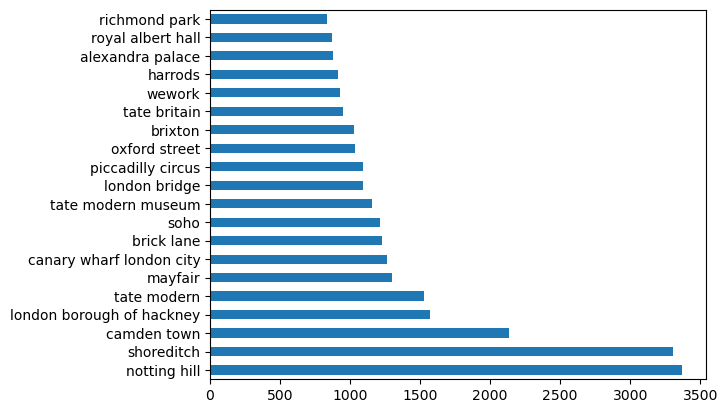

In [137]:
# Plot to show top 20 hidden gems
df_concat['name'].value_counts(ascending=0)[:20].plot(kind='barh');

- Above are the top 20 hidden gems of London.
- From the list of places above, there are quite a number of neighbourhoods. 
- So, the categories will be updated to include that since tourists might be interested in visiting neighbourhoods too.
- The updated categories are as follows:
1. boat tours and water sports
1. pubs and nightlife
1. sights and landmarks
1. spas and wellness
1. fun and games
1. museums
1. classes and workshops
1. nature and parks
1. markets
1. neighbourhoods

- We will now attempt to rename the highly-frequented places to standardise the naming convention.
- We will also remove places non-related to the project.

#### Examining of hidden gems (1-20)

In [138]:
# Check if the string contains a substring from the list
str51 = "notting"
res51 = [string for string in list(df_concat['name'].unique()) if str51 in string]

print(res51)

['notting hill carnival 2018', 'london nottinghill carnival', '280 westbourne park road notting hill', 'notting hill', 'notting hill harbour club', 'tabernacle, notting hill', "notting hill farmers' market", 'nottinghill', 'skin-matters notting hill', 'notting hill gate library', 'all saints notting hill', 'bubbleology - notting hill', 'polpo notting hill', 'negozio classica notting hill', 'the prince albert, notting hill', 'ottolenghi notting hill', 'notting hill gate', 'notting hill arts club', 'hostel one notting hill', '202 cafe/restaurant notting hill', "st peter's, notting hill", 'electric diner, notting hill', 'the notting hill bookshop', 'notting hill carnival', 'portobello market, notting hill', 'portobello road, notting hill, london.', 'electric cinema, notting hill', 'beach blanket babylon - notting hill', 'nottinghill carnival', 'notting hill community church', 'rainbow notting hill', 'life centre notting hill', 'pix notting hill', 'globe - notting hill', 'notting hill lond

In [139]:
# Remove specific locations
remove_list = ['202 cafe/restaurant notting hill', 'ottolenghi notting hill', 'nottinghill carnival', 'electric diner, notting hill', 'the notting hill bookshop', '280 westbourne park road notting hill', 'notting hill gate', 'notting hill gate library', 'all saints notting hill', 'negozio classica notting hill', 'notting hill carnival', 'rainbow notting hill', 'beach blanket babylon - notting hill', 'bubbleology - notting hill', 'polpo notting hill', 'notting hill carnival 2018', 'pix notting hill', 'london nottinghill carnival', 'hostel one notting hill', 'barclays eagle lab notting hill gate']
df_concat = df_concat[~df_concat['name'].isin(remove_list)]

In [140]:
# Check if the string contains a substring from the list
str51 = "notting"
res51 = [string for string in list(df_concat['name'].unique()) if str51 in string]

print(res51)

['notting hill', 'notting hill harbour club', 'tabernacle, notting hill', "notting hill farmers' market", 'nottinghill', 'skin-matters notting hill', 'the prince albert, notting hill', 'notting hill arts club', "st peter's, notting hill", 'portobello market, notting hill', 'portobello road, notting hill, london.', 'electric cinema, notting hill', 'notting hill community church', 'life centre notting hill', 'globe - notting hill', 'notting hill london uk', 'high definition beauty boutique notting hill']


In [141]:
# Rename location names
df_concat['name'] = df_concat['name'].replace({'nottinghill':'notting hill', 
                                               'notting hill london uk':'notting hill', 
                                               'portobello road, notting hill, london.':'notting hill'})

In [142]:
# Check if the string contains a substring from the list
str52 = "shoreditch"
res52 = [string for string in list(df_concat['name'].unique()) if str52 in string]

print(res52)

['browns shoreditch', 'rivington street, shoreditch', 'boundary creative market shoreditch', 'colourriotnails shoreditch', 'the curtain hotel, shoreditch', 'shoreditch', 'shoreditch nails', 'the owl and pussycat pub shoreditch', 'campfire shoreditch', 'nobu hotel shoreditch', 'the studio crossfit shoreditch', 'prince arthur shoreditch', 'cay tre shoreditch', 'pure gym shoreditch', 'boxpark shoreditch', 'joiners arms shoreditch', 'bounce ping pong shoreditch', 'shoreditch house', 'selfish shoreditch - nails, beauty, waxing', 'dolled up shoreditch', 'huckletree shoreditch', 'shoryu shoreditch', 'tapas brindisa shoreditch', 'courthouse hotel shoreditch', 'arnold circus, shoreditch', 'house of vintage uk - shoreditch', 'pitfield street, shoreditch', 'leroy shoreditch', "st leonard's, shoreditch", 'the bridge - shoreditch', 'rotate shoreditch', '3-10 shoreditch high street', 'the blues kitchen - shoreditch', 'nanashi shoreditch', 'flat iron steakhouse, curtain road shoreditch', 'shoreditch 

In [143]:
# Remove specific locations
remove_list = ['rivington mix shoreditch', 'dinerama / street feast shoreditch', "cecconi's shoreditch", 'boxpark shoreditch', 'nomadic community garden, shoreditch', 'shoreditch house', 'smoking goat shoreditch', 'leroy shoreditch', 'aida shoreditch', 'hoxton hotel, bar & grill-shoreditch', 'm by montcalm shoreditch london tech city', 'red rooster shoreditch', 'blacklock shoreditch', 'miranda at ace hotel london shoreditch', 'rivington street, shoreditch', '3-10 shoreditch high street', 'house of vintage uk - shoreditch', 'pitfield street, shoreditch', 'nanashi shoreditch', 'beach blanket babylon shoreditch', 'the yard shoreditch', 'ace hotel london shoreditch', 'courthouse hotel shoreditch', 'campfire shoreditch', 'nobu hotel shoreditch', 'dishoom shoreditch', 'shoryu shoreditch', 'flat iron steakhouse, curtain road shoreditch', 'the blues kitchen shoreditch', 'the curtain hotel, shoreditch', 'cay tre shoreditch', 'rotate shoreditch', 'shoreditch art wall', 'huckletree shoreditch', 'shoreditch studios', 'kestin hare,42-44 rivington st. shoreditch,london', 'iron bloom shoreditch', 'the blues kitchen - shoreditch', 'tapas brindisa shoreditch', 'shoreditch grind', 'the bridge - shoreditch', 'shoreditch high st overground', 'mindspace shoreditch', 'last days of shoreditch', 'lantana cafe - shoreditch', 'miranda at the ace hotel shoreditch london', 'nobu shoreditch', 'joiners arms shoreditch', 'bedroom bar, shoreditch']
df_concat = df_concat[~df_concat['name'].isin(remove_list)]

In [144]:
# Check if the string contains a substring from the list
str53 = "camden"
res53 = [string for string in list(df_concat['name'].unique()) if str53 in string]

print(res53)

['the blues kitchen - camden', 'camden town', 'londra camden town', 'brewdog camden', "belushi's camden", 'camden', 'the stables market, camden, london', 'the camden eye', 'borough londonien de camden', 'draft house camden road', 'camden arts centre', 'lan kwai fong camden', 'kukuriku camden', 'f45 training camden', 'fitness first camden', "nando's camden", "the world's end camden", 'stables market camden', 'guanabana camden london', 'v burger camden', "fiddler's elbow - camden", 'prince albert, camden', 'etcetera theatre camden', 'camden lock', 'camden road', 'urban outfitters camden', 'london - camden town', 'camden pizza', 'fields beneath camden', 'the camden assembly', 'seawise, camden - stables market', 'proud camden', 'byoc camden', 'laz camden', 'pret a manger 18 camden high street', 'the groom room camden', 'camden house', 'metal rooster camden', 'camden high st, london', 'elephants head camden high street', 'the unicorn camden live', 'camden high street', 'treatz camden', 'cam

In [145]:
# Remove specific locations
remove_list = ['camden bakery', 'the blues kitchen - camden', 'lan kwai fong camden', 'camden square', 'treatz camden', 'fest camden', '40zerocamden', 'stables camden', 'camden garden centre', 'kukuriku camden', 'seawise, camden - stables market', 'laz camden', 'guanabana camden london', 'camden house', 'camden pizza', 'camden road', 'mildreds camden', 'poppies fish and chips in camden', "nando's camden", 'pizzeria di camden', 'camden coffee shop', 'bird restaurant, camden', 'masala zone  camden town', 'asos - head office camden, london', 'pret a manger 18 camden high street', 'fields beneath camden', 'voodoo rays camden', 'urban outfitters camden', 'proud camden', 'metal rooster camden', 'the camden studio', 'v burger camden']
df_concat = df_concat[~df_concat['name'].isin(remove_list)]

In [146]:
# Check if the string contains a substring from the list
str53 = "camden"
res53 = [string for string in list(df_concat['name'].unique()) if str53 in string]

print(res53)

['camden town', 'londra camden town', 'brewdog camden', "belushi's camden", 'camden', 'the stables market, camden, london', 'the camden eye', 'borough londonien de camden', 'draft house camden road', 'camden arts centre', 'f45 training camden', 'fitness first camden', "the world's end camden", 'stables market camden', "fiddler's elbow - camden", 'prince albert, camden', 'etcetera theatre camden', 'camden lock', 'london - camden town', 'the camden assembly', 'byoc camden', 'the groom room camden', 'camden high st, london', 'elephants head camden high street', 'the unicorn camden live', 'camden high street', 'camden assembly', 'jazz cafe camden town', 'camden roundhouse', 'simmons bars – camden town', 'the hawley arms, camden', 'beatonecamden', 'the underworld camden', 'camden town jazz cafe', 'camden passage', 'camden town, london, uk', 'lockside camden', 'the camden head', 'camden centre', 'camden head', 'stables market, camden, london', 'camden electric ballroom', 'camden weatherspoon

In [147]:
# Rename location names
df_concat['name'] = df_concat['name'].replace({'camden town, london, uk':'camden town',
                                               'camden':'camden town',
                                               'camden high street':'camden town', 
                                               'london - camden town':'camden town', 
                                               'camden street':'camden town', 
                                               'londra camden town':'camden town',
                                               'borough londonien de camden':'camden town',
                                               'camden high st, london':'camden town',
                                               'camden assembly':'the camden assembly pub',
                                               'the camden assembly':'the camden assembly pub',
                                               'camden town jazz cafe':'jazz cafe camden town',
                                               'the camden head':'camden head'})

In [148]:
# Check if the string contains a substring from the list
str54 = "hackney"
res54 = [string for string in list(df_concat['name'].unique()) if str54 in string]

print(res54)

['the old ship inn hackney', 'hackney cypriot association', 'crate, hackney wick', 'temple of hackney', 'london borough of hackney', 'hackney wicked', 'london fields, hackney e8', 'pages of hackney', 'hackney council', 'stoke newington, hackney, london, n16', 'hackney wick', 'hackney downs, tennis courts', 'the hackney draper', 'the hackney shop', 'hackney canal', 'hackney empire', 'hackney showroom', 'travelodge hackney', 'made in hackney community cookery school', 'made in hackney', 'st pauls church west hackney', 'morito hackney road', 'hackney downs studios', 'hackney wetherspoons', 'hackney church brew co.', 'rehab hackney', 'hackney brewery', 'hackney walk', 'hackney', 'residence hackney road', "st augustine's tower hackney", 'vape and juice - hackney', 'hackney house uk', 'hackney town hall', 'hackney marshes', 'hackney central', 'the breakfast club, hackney wick', 'grow, hackney', 'bonds. hackney', 'earth (evolutionary arts hackney)', 'hackney  & east london', 'pearl hackney wi

In [149]:
# Remove specific locations
remove_list = ['hackney bureau', 'crate, hackney wick', 'temple of hackney', 'hackney road studios', 'hackney central', 'the breakfast club, hackney wick', 'bonds. hackney', 'pearl hackney wick', 'hackney wicked', 'pages of hackney', 'morito hackney road', 'hackney downs studios', 'hackney canal', 'residence hackney road', 'hackney wick boulder project', 'hackney council', 'travelodge hackney', 'house of hackney', 'hackney studios', 'hackney cypriot association', 'hackney walk', '4 broadway market mews, broadway market hackney', 'hackney showroom', 'move hackney', 'andrews road hackney', 'triangle store hackney', 'the hackney shop, 99 morning lane', 'the hackney shop', 'the hackney draper', 'vape and juice - hackney', 'hackney downs, tennis courts', 'hackney citizen', 'hackney house uk', 'made in hackney', 'rehab hackney', 'hackney rhythm']
df_concat = df_concat[~df_concat['name'].isin(remove_list)]

In [150]:
# Rename location names
df_concat['name'] = df_concat['name'].replace({'london borough of hackney':'hackney',
                                               'hackney  & east london':'hackney',
                                               'hackney road, shorditch, london.':'hackney', 
                                               'hackney, london':'hackney', 
                                               'hackney downs':'hackney', 
                                               })

In [151]:
# Check if the string contains a substring from the list
str55 = "tate modern"
res55 = [string for string in list(df_concat['name'].unique()) if str55 in string]

print(res55)

['tate modern', 'tate modern museum', 'blavatnik building @ tate modern', 'tate modern: rothko room', 'tate modern, bankside, london', 'imitate modern', 'tate modern switch house', 'sandwich and pastry kitchen-tate modern', 'tate modern, southbank']


In [152]:
# Remove specific locations
remove_list = ['sandwich and pastry kitchen-tate modern']
df_concat = df_concat[~df_concat['name'].isin(remove_list)]

In [153]:
# Rename location names
df_concat['name'] = df_concat['name'].replace({'tate modern switch house':'tate modern',
                                               'tate modern museum':'tate modern',
                                               'tate modern, bankside, london':'tate modern', 
                                               'blavatnik building @ tate modern':'tate modern', 
                                               'tate modern, southbank':'tate modern', 
                                               })

In [154]:
# Check if the string contains a substring from the list
str56 = "canary wharf"
res56 = [string for string in list(df_concat['name'].unique()) if str56 in string]

print(res56)

['jp morgan, canary wharf', 'scoff & banter canary wharf', 'cold harbour, canary wharf', 'boisdale of canary wharf', 'canary wharf london city', 'canary wharf', 'boisdale canary wharf', 'giant robot canary wharf', "smollensky's restaurant canary wharf", "nando's canary wharf jubilee place", 'carluccios canary wharf', 'canary wharf roof garden', 'ice rink canary wharf ice skating', 'wahaca mexican eating restaurant, canary wharf, london', 'hilton london canary wharf', 'everyman canary wharf', 'obicà canary wharf', 'pure gym canary wharf', 'south quay - towards canary wharf', "tom's kitchen canary wharf", 'fraser place canary wharf', 'brewdog canary wharf', 'reuters canary wharf', 'sports bar & grill - canary wharf', "smollensky's bar canary wharf", 'canary wharf pier', 'the ivy canary wharf', 'third space canary wharf', 'gaucho. canary wharf.', 'canary wharf wetherspoons', 'de vere canary wharf', 'roka canary wharf', 'psycle canary wharf', 'pret a manger canary wharf, the mall', 'marlin

In [155]:
# Remove specific locations
remove_list = ['reuters canary wharf', "nando's canary wharf jubilee place", 'canary wharf', 'obicà canary wharf', 'the ivy canary wharf', 'marlin apartments canary wharf', 'gaucho. canary wharf.', 'cold harbour, canary wharf', 'wahaca mexican eating restaurant, canary wharf, london', 'boisdale canary wharf', 'hilton london canary wharf', 'giant robot canary wharf', "smollensky's restaurant canary wharf", 'de vere canary wharf', 'le pain quotidien canary wharf', 'roka canary wharf', 'pret a manger canary wharf, the mall', 'doner and gyros canary wharf', 'tesla canary wharf supercharger', 'fraser place canary wharf', 'jp morgan, canary wharf', 'south quay - towards canary wharf', "tom's kitchen canary wharf", 'ice rink canary wharf ice skating', 'scoff & banter canary wharf', 'the merchant, canary wharf', 'boisdale of canary wharf', 'wiq apartment canary wharf', 'carluccios canary wharf']
df_concat = df_concat[~df_concat['name'].isin(remove_list)]

In [156]:
# Rename location names
df_concat['name'] = df_concat['name'].replace({'canary wharf london city':'canary wharf'})

In [157]:
# Check if the string contains a substring from the list
str57 = "mayfair"
res57 = [string for string in list(df_concat['name'].unique()) if str57 in string]

print(res57)

["london's mayfair.", 'paul smith no.9 albemarle street, mayfair, london', 'mayfair hotel', "annabel's mayfair", 'mayfair', '28-50 wine workshop & kitchen - mayfair', 'richoux - mayfair', "cecconi's mayfair", 'jovoy mayfair', 'duck & dry mayfair', 'hilton green park hotel mayfair', 'cardinals of mayfair', 'mayfair coaching lounge', 'bel air fine art london mayfair', 'dover street, mayfair, london', 'porsche centre mayfair', 'mews of mayfair', 'flemings mayfair hotel', 'bocconcino mayfair london', 'the mayfair berkley street', 'victoria miro mayfair', 'mount street mayfair', 'chesterfield mayfair hotel', 'mahiki bar, mayfair london', 'mahiki mayfair', 'the mayfair bar at the mayfair hotel', 'curzon, mayfair', 'davies street mayfair', 'curzon cinema mayfair', 'boisdale of mayfair', 'george private members club, mayfair', 'wetherell estate agents mayfair', 'ormer mayfair', 'little house mayfair', 'the westbury mayfair, a luxury collection hotel, london', 'isabel mayfair', 'roka mayfair', 

In [158]:
# Remove specific locations
remove_list = ["jak's mayfair", 'paul smith no.9 albemarle street, mayfair, london', 'mayfair hotel', 'the guinea grill - mayfair london', 'richoux - mayfair', 'jovoy mayfair', 'the washington mayfair hotel', 'porsche centre mayfair', 'davies street mayfair', 'little house mayfair', 'mews of mayfair', 'flemings mayfair hotel', 'isabel mayfair', 'roka mayfair', 'mamounia lounge mayfair', 'hakkasan, bruton street, mayfair, london', 'kai mayfair', "corrigan's mayfair", 'mayfair library', 'lalique mayfair', '28-50 wine workshop & kitchen - mayfair', 'mayfair kitchen', 'hakkasan mayfair', 'hilton green park hotel mayfair', 'bocconcino mayfair london', 'the westbury mayfair, a luxury collection hotel, london', 'browns brasserie & bar mayfair', 'boisdale of mayfair', "cecconi's mayfair", 'chesterfield mayfair hotel', 'bel air fine art london mayfair', 'thom sweeney, mayfair', 'hibiscus restaurant, mayfair', 'nathalie mayfair', 'ormer mayfair', 'wetherell estate agents mayfair', 'cardinals of mayfair', 'mayfair knights ltd', 'mayfair coaching lounge']
df_concat = df_concat[~df_concat['name'].isin(remove_list)]

In [159]:
# Rename location names
df_concat['name'] = df_concat['name'].replace({'curzon, mayfair':'curzon mayfair',
                                               'curzon cinema mayfair':'curzon mayfair',
                                               'mayfair, chelsea & south kensington':'curzon mayfair',
                                               'mayfair, london':'mayfair',
                                               })

In [160]:
# Check if the string contains a substring from the list
str58a = "bricklane"
res58a = [string for string in list(df_concat['name'].unique()) if str58a in string]

print(res58a)

['the archers bricklane', 'bricklane london']


In [161]:
# Check if the string contains a substring from the list
str58b = "brick lane"
res58b = [string for string in list(df_concat['name'].unique()) if str58b in string]

print(res58b)

["monty's bar brick lane", 'the monsoon at  brick lane', 'the brick lane vintage market', 'brick lane', 'old truman brewery, brick lane', 'brick lane vintage', 'brick lane market', 'brick lane park', 'all star lanes brick lane', 'brick lane, london', 'cinnamon brick lane', 'city spice london - the king of brick lane', 'efes brick lane limited', "monty's bar & lounge, brick lane", 'rough trade east, brick lane', 'blanchette brick lane', 'brick lane  bookshop', 'hookah lounge brick lane', 'aladin brick lane', 'the brick lane gallery', 'the boiler house, brick lane']


In [162]:
# Remove specific locations
remove_list = ['efes brick lane limited', 'aladin brick lane', 'brick lane vintage', 'blanchette brick lane', 'the monsoon at  brick lane', 'city spice london - the king of brick lane', 'cinnamon brick lane', 'rough trade east, brick lane', 'brick lane  bookshop']
df_concat = df_concat[~df_concat['name'].isin(remove_list)]

In [163]:
# Rename location names
df_concat['name'] = df_concat['name'].replace({'bricklane london':'brick lane'
                                               })

In [164]:
# Check if the string contains a substring from the list
str59 = "soho"
res59 = [string for string in list(df_concat['name'].unique()) if str59 in string]

print(res59)

['balans soho society clapham', 'dozo soho', 'soho square', 'barrio soho', 'the roxy club, soho', 'comptons of soho', 'soho works', "mimi's hotel soho", 'shibuya soho', 'zebrano soho', 'vapiano, soho, london', 'soho square studios', 'my place soho', 'the piano bar soho', 'masala zone soho', 'viet soho', 'simmons bar soho', 'curzon cinema soho', 'mediterranean cafe soho', 'soho wala', 'wacky barber soho', 'soho original books', 'shake shack soho', 'little italy soho', 'bar soho', 'circa soho', 'farm girl soho', 'the breakfast club - soho - london', 'soho', 'i love soho london', 'balans soho society ealing', "rosa's soho", 'choccywoccydoodah, fouberts place, soho', 'honest burgers - soho', 'comptoir libanais soho', 'thai tho soho', 'bone daddies, soho', 'ping pong soho', 'the box, soho', 'soho residence', 'the lyric - soho', 'hix soho', 'yeni soho', 'this is soho', 'soho zebrano, greek street, london', 'soho, london', 'third space soho', 'soho whisky club', 'soho public baths', 'soho cof

In [165]:
# Remove specific locations
remove_list = ['masala zone soho', 'balans soho society clapham', 'dozo soho', 'pompi soho uk', 'quo vadis soho', 'viet soho', 'jinjuu soho', 'yauatcha soho', 'soho recording studios', 'soho coffee co', 'soho wala', "soho's secret tea room", 'hix soho', 'mildreds soho', 'balans soho society', 'balans soho society stratford', 'yeni soho', 'this is soho', "l'eto 155 wardour st, soho, london.", 'soho farmhouse', 'gammagammasoho', 'six storeys on soho', 'red dog saloon - soho', 'rupert street, soho', 'soho live studios', 'absurd bird soho', 'the ivy soho brasserie', 'wright brothers soho', "dirty harry's soho", 'farm girl soho', 'the breakfast club - soho - london', 'soho works', 'shake shack soho', 'ping pong soho', 'balans soho society ealing', "rosa's soho", 'comptoir libanais soho', 'bone daddies, soho', 'soho residence', 'jamon jamon soho', 'karma sanctum soho london', 'paul smith soho, london', 'tapas brindisa, soho', 'foxlow soho', 'cay tre soho', 'honest, soho', "nando's soho london", 'bibimbap soho', 'soho house greek street', 'bonnie gull seafood shack - soho', 'soho joe', 'ghd studio dean street soho', 'c&r cafe restaurant, chinatown / soho, london', 'soho square studios', "sophie's soho", 'wahaca soho', 'my place soho', "tommi's burger joint, soho", 'so high soho', 'soho grind', 'little italy soho', 'gauthier soho', 'dirty bones soho', 'lush studio soho', 'soho hotel', 'la bodega negra - soho, london', 'trade soho', 'soho vegan market', 'pho soho', 'ceviche and pisco bar in soho london', 'honest burgers - soho', 'mediterranean cafe soho', 'lobos meat & tapas soho', 'soho coffee company', 'tongue & brisket soho', 'soho coffee', 'shoryu soho', 'soho original books', 'shibuya soho', 'choccywoccydoodah, fouberts place, soho', "mimi's hotel soho", 'vapiano, soho, london', 'thai tho soho', "sticks'n'sushi soho", 'sanctum soho hotel', 'sohostel london', 'soho coffee co.', 'refuel ~ soho hotel, london', 'fresh soho']
df_concat = df_concat[~df_concat['name'].isin(remove_list)]

In [166]:
# Rename location names
df_concat['name'] = df_concat['name'].replace({'soho, london':'soho',
                                               'i love soho london':'soho',
                                               'soho london':'soho'
                                               })

In [167]:
# Check if the string contains a substring from the list
str60 = "london bridge"
res60 = [string for string in list(df_concat['name'].unique()) if str60 in string]

print(res60)

['london bridge', 'creams cafe london bridge experience', "marco's new york italian london bridge", 'stazione di london bridge', 'london bridge hotel', 'residence inn by marriott london bridge', 'kerb london bridge', 'london bridge (metropolitana di londra)', 'london bridge hospital', 'starbuck, london bridge', 'tyron ash real estate - powered by keller williams london bridge', 'vapiano london bridge', "giuseppe's ristorante italiano, london bridge", 'mercure london bridge hotel', 'the salon hair and beauty, london bridge', 'gaucho london bridge', 'london bridge city pier', 'bikram yoga - london bridge', 'the london bridge experience & london tombs', 'hays galleria, london bridge', 'westminister london bridge', 'st olaf house, knee clinic, london bridge', 'mercure london bridge', 'f45 training london bridge', 'london bridge foot clinic']


In [168]:
# Remove specific locations
remove_list = ['hays galleria, london bridge', 'gaucho london bridge', 'creams cafe london bridge experience', 'kerb london bridge', 'stazione di london bridge', 'london bridge hospital', 'vapiano london bridge', 'starbuck, london bridge', 'london bridge hotel', 'london bridge (metropolitana di londra)', "marco's new york italian london bridge", "giuseppe's ristorante italiano, london bridge", 'st olaf house, knee clinic, london bridge', 'residence inn by marriott london bridge', 'mercure london bridge', 'mercure london bridge hotel', 'london bridge foot clinic']
df_concat = df_concat[~df_concat['name'].isin(remove_list)]

In [169]:
# Rename location names
df_concat['name'] = df_concat['name'].replace({'westminister london bridge':'london bridge'
                                               })

In [170]:
# Check if the string contains a substring from the list
str61 = "restaurant"
res61 = [string for string in list(df_concat['name'].unique()) if str61 in string]

print(res61)

['12:51 - restaurant', "mcdonald's restaurant", 'the cardinal peppe restaurant', 'maroush lebanese restaurant, edgware road, london', 'ganapati restaurant', 'city miyama restaurant', "banner's restaurant crouch end n8", 'himalaya restaurant', 'my old dutch restaurants', "scott's restaurant", 'domo94-italian restaurant', 'the park hotel and restaurant', 'a toca restaurant', 'india india restaurant', 'pizza hut restaurants uk', 'spice village restaurant tooting', 'mon plaisir restaurant', 'colony (restaurant)', 'memphis restaurant', 'st leonards restaurant', 'restaurant romanesc oasis', 'quirinale restaurant', 'anglo restaurant', 'babylon restaurant', 'ibérica restaurants', 'soor lebanese restaurant', 'arirang korean restaurant', 'vq 24 hour restaurant', 'the fishmarket restaurant and oyster bar', 'murano (restaurant)', "my restaurant by gino d'acampo", 'noizé restaurant', 'capital restaurant', 'babur restaurant', 'bodeans fulham restaurant', 'crispy dosa restaurant (100% pure vegetarian

In [171]:
# Remove specific locations
remove_list = res61
df_concat = df_concat[~df_concat['name'].isin(remove_list)]

In [172]:
# Check if the string contains a substring from the list
str62 = "bakery"
res62 = [string for string in list(df_concat['name'].unique()) if str62 in string]

print(res62)

['fabrique bakery london', "gail's bakery", 'richmond hill bakery', 'pavilion cafe & bakery', 'loven bakery', 'the hummingbird bakery - islington', 'margot bakery', 'b bakery afternoon tea bus tour', 'rinkoff bakery', 'miel bakery', 'common - we are common - cafe/bakery/shop', 'old bakery gin limited', 'rhodes bakery', 'the butter bakery', 'primrose bakery', 'blackbird bakery', 'rose bakery london', 'bread ahead bakery & school', 'benita bakery', 'euphorium bakery', 'the hummingbird bakery', "gail's bakery hampstead", 'chinatown bakery', 'beyond bread bakery', 'tokyo bakery', 'yummies deli and bakery', "gail's artisan bakery", 'signorelli bakery', 'the dusty knuckle bakery', 'seoul bakery london', 'flavourtown bakery', 'the lebanese bakery ldn', 'dominique ansel bakery london', 'yeast bakery', "romeo's bakery", 'luminary bakery', "brigit's bakery - london", 'paul rhodes bakery', "luca's kitchen and bakery", "nikki's bakery", 'happy sky japanese bakery', 'nordic bakery', 'z&z bakery', '

In [173]:
# Remove specific locations
remove_list = res62
df_concat = df_concat[~df_concat['name'].isin(remove_list)]

In [174]:
# Check if the string contains a substring from the list
str63 = "hospital"
res63 = [string for string in list(df_concat['name'].unique()) if str63 in string]

print(res63)

['highgate private hospital', 'homerton hospital', 'rhs chelsea flower show, royal hospital grounds, chelsea', "st mary's hospital medical school", 'great ormond street hospital for children nhs trust', 'royal masonic hospital', 'north middlesex university hospital nhs trust', 'the princess grace hospital', 'royal hospital chelsea', 'central middlesex hospital', 'hospital club 24, ended street', "great ormond street hospital and children's charity", "moorefield's eye hospital-children's unit", 'mount vernon hospital', 'royal london hospital', 'royal london hospital - whitechapel', 'national hospital for neurology and neurosurgery', 'eastman dental hospital', "st mary's hospital, london", 'grey coat hospital ce school', "st george's hospital", 'moorfields eye hospital', 'the whittington hospital', 'chase farm hospital', "st thomas' hospital", 'the portland hospital', 'the horse hospital', 'parkside hospital', "st bartholomew's hospital", "guy's hospital", 'guys & st. thomas hospital tru

In [175]:
# Remove specific locations
remove_list = ['the whittington hospital', 'north middlesex university hospital nhs trust', 'central middlesex hospital', 'hospital club 24, ended street', "king edward vii's hospital london", 'guys evelina hospital school', 'royal brompton & harefield hospitals specialist care', 'evolve hospitality', 'chase farm hospital', "great ormond street hospital and children's charity", "st thomas' hospital", 'charing cross hospital medical school', 'the portland hospital', 'the princess grace hospital', "moorefield's eye hospital-children's unit", 'royal london hospital', 'national hospital for neurology and neurosurgery', 'eastman dental hospital', "st george's hospital", 'moorfields eye hospital', "st bartholomew's hospital", "evelina london children's hospital", 'royal hospital chelsea', 'university hospital lewisham', 'homerton university hospital', 'bupa cromwell hospital', 'barnet general hospital', 'royal national throat, nose and ear hospital', "guy's hospital", 'st georges hospital nhs trust', 'highgate private hospital', "st mary's hospital, london", 'the horse hospital', 'ealing hospital', 'great ormond street hospital for children nhs trust', 'parkside hospital', 'charing cross hospital', 'royal masonic hospital', "st mary's hospital medical school", 'guys & st. thomas hospital trust', 'middlesex hospital', 'whipps cross university hospital', 'homerton hospital', 'mount vernon hospital', 'guy’s hospital', 'the hospitality company']
df_concat = df_concat[~df_concat['name'].isin(remove_list)]

In [176]:
# Check if the string contains a substring from the list
str64 = "clinic"
res64 = [string for string in list(df_concat['name'].unique()) if str64 in string]

print(res64)

['sol clinic', 'haylands beauty clinic', 'the helix clinic', 'city skin clinic', 'chelsea hair & skin clinic', 'aenea hair & beauty salon, spa & clinic', 'the london clinic', 'harley street healthcare clinic', 'skinglow clinic', 'laserlite aesthetic clinic', 'gemm beauty clinic', 'omniya london - health & beauty mediclinic', 'dr leah cosmetic skin clinic', 'viva skin clinics', 'one skin clinic', "windsor clinic for std's", 'nhc skin clinic', 'london smile clinic', 'avid clinic', 'skin medspa clinic', 'coolclinic', 'the hale clinic', 'gooseberry bush café/studio/clinic', 'cranley clinic', 'garry trainer clinic', 'bellezza clinic london', 'the stonehealth clinic', 'sheer laser clinic', 'the harley street dermatology clinic', 'ea clinic', 'dr joney de souza skin and laser clinic', 'dr rita rakus clinic', 'charterhouse clinic', 'la pelle skin clinic', 'acucare clinic harley street', 'health & aesthetic clinic', "dr monica's dental clinic", 'park veterinary clinic, abbots', 'chelsea dental 

In [177]:
# Remove specific locations
remove_list = res64
df_concat = df_concat[~df_concat['name'].isin(remove_list)]

In [178]:
# Check if the string contains a substring from the list
str65 = "apartment"
res65 = [string for string in list(df_concat['name'].unique()) if str65 in string]

print(res65)

['grand plaza serviced apartments', 'marlin apartments limehouse', 'stamford street apartments.', 'luxury high-street kensington apartment', 'lamington serviced apartments', 'highbury stadium square eaststand apartments concierge', 'london dockland apartments', 'chelsea bridge apartments', 'xy apartments', 'gloucester place apartments', 'fulham riverside apartments', 'basil street apartments', 'studios2let serviced apartments', 'brompton house- serviced apartments in london, united kingdom', 'circus apartments by bridgestreet', 'marlin apartments aldgate london']


In [179]:
# Remove specific locations
remove_list = res65
df_concat = df_concat[~df_concat['name'].isin(remove_list)]

In [180]:
# Check if the string contains a substring from the list
str66 = "hotel"
res66 = [string for string in list(df_concat['name'].unique()) if str66 in string]

print(res66)

["four season's hotel, hampshire", 'travelodge hotel - london central moorgate', 'franklin hotel london', 'hotel du vin & bistro, cannizaro house', 'ibis hotel. lillie road. west brompton.', 'st. pancras renaissance hotel london', 'the draycott hotel', 'millennium hotel london knightsbridge', 'winter garden at the landmark hotel', 'k+k hotel george', 'president hotel', 'the grange holborn hotel', 'hilton hotel london', 'icebar by icehotel', 'guomen hotel', 'the marleybone hotel', 'the ace hotel', 'claridges hotel', 'green bar at hotel cafe royal', 'premier inn london southwark (borough high st) hotel', 'courthouse hotel london', 'the garden room at the lanesborough hotel', 'ham yard hotel', 'hallmark hotel london chigwell prince regent', 'ambassadors bloomsbury hotel', 'the park hotel', 'the library lounge at the marriott county hall hotel', 'le chinois at millennium knightsbridge hotel', 'hard rock hotel london', "the bailey's hotel london", 'leonardo hotel', 'new road hotel', 'the ma

In [181]:
# Remove specific locations
remove_list = ['hallmark hotel prince regent', 'sunborn london hotel', 'travelodge hotel - london central moorgate', 'st. pancras renaissance hotel london', 'millennium hotel london knightsbridge', 'four seasons hotel london at park lane', 'k+k hotel george', 'president hotel', 'the pelham hotel', 'the royal horseguards hotel', 'the academy (hotel)', 'courthouse hotel london', 'the athenaeum hotel and residences', 'thistle city barbican hotel', 'kew gardens hotel', 'westbury hotel', 'ham yard hotel', 'best western london peckham hotel', 'the northall at corinthia hotel', 'la dame de pic london at four seasons hotel london at ten trinity square', 'hotel cafe royal', 'the mandarin hotel', 'the may fair hotel', 'henrietta hotel', 'baglioni hotel london', 'the lounge at the bulgari hotel & residences', 'the heartbreak hotel', 'the capital hotel - london', 'millennium gloucester hotel', 'montague on the gardens hotel', "st james's hotel and club, london", 'south place hotel', 'london marriott hotel park lane', 'the park tower knightsbridge hotel', 'the grange holborn hotel', 'courthouse hotel', 'radisson blu edwardian new providence wharf hotel', 'tulse hill hotel', 'dockside hotel', 'the goring hotel', 'ace hotel london', 'grosvenor hotel', 'london marriott hotel county hall', 'four seasons hotel london at ten trinity square', 'blakes hotel', 'the park tower knightsbridge, a luxury collection hotel', 'w london hotel', 'the harlingford hotel', 'the mandrake hotel', 'leman locke hotel', 'sunborn yacht hotel', 'club quarters hotel gracechurch', 'the warrington hotel', 'selfridge hotel  london', 'clayton hotel chiswick', 'haymarket hotel', 'the orange public house & hotel', 'connaught hotel bar', 'the kensigton hotel', 'the franklin london - starhotels collezione', 'knightsbridge hotel', 'town hall hotel', 'charlotte street hotel', 'hilton hotel london', 'hallmark hotel london chigwell prince regent', 'one star hotel', 'corner house hotel london', 'great northern hotel', 'savoy hotel', 'the milestone hotel & residences', 'bulgari hotel', 'four seasons hotel- hampshire', 'stk at me hotel london', 'west lodge park hotel', 'travelodge hotel - london battersea', 'best western palm hotel', 'hotel rafayel', 'intercontinental hotel, park lane', 'the park lane mews hotel', 'clayton crown hotel', 'living rooms · the hotel alternative', 'jumeirah lowndes hotel', 'holmes hotel london', 'green rooms hotel', 'grovsner hotel', 'langham hotel london', 'amba hotel charing cross', 'bankside hotel', 'corinthia hotel london', 'cafe forty one at la suite west hotel', 'good hotel london', 'mei ume at four seasons hotel london at ten trinity square', 'grange city hotel', 'icebar by icehotel', 'radisson blu edwardian heathrow hotel', 'london house hotel', 'the chelsea harbour hotel', "brown's hotel, a rocco forte hotel", 'le chinois at millennium knightsbridge hotel', 'hard rock hotel london', 'leonardo hotel', 'new road hotel', 'ritz hotel', 'the berkeley hotel rooftop pool', "st. james' court, a taj hotel, london", 'mv sunborn yacht hotel', 'euston square hotel', 'the egerton house hotel', 'hotel elephant workspace', 'baglioni hotel', 'chessington safari hotel', 'the bermondsey square hotel', 'k+k hotel george kensington', 'hotel xenia autograph collection london', 'hotel chocolat', 'no ten manchester street hotel', 'the marleybone hotel', 'the ace hotel', 'landmark london hotel', 'claridges hotel', "four season's hotel, hampshire", 'ibis hotel. lillie road. west brompton.', 'premier inn london southwark (borough high st) hotel', 'hotel chocolate', 'royal garden hotel', 'cannizaro house hotel', "benihana at grange st paul's hotel", 'durrants hotel', 'ambassadors bloomsbury hotel', '41 hotel', 'the gore hotel', 'columbia hotel', 'w hotel', 'imperial london hotels', 'academy hotel', 'roomzzz aparthotel', 'the sanderson hotel', 'britannia international hotel, london', 'the east london hotel', 'henley house hotel', 'georgian house hotel', 'travelodge hotel - london kingston upon thames central', 'mad hatter hotel', 'travelodge hotel - hatfield central', 'amba charing cross hotel', 'the hammersmith hotel', 'sloane square hotel', 'me hotel', 'royal eagle hotel. paddington', "st. paul's hotel", 'the exhibitionist hotel by the keycollections', 'amba hotel marble arch', 'copthorne tara hotel', 'the library lounge at the marriott county hall hotel', "duke's head hotel", 'pasha hotel', 'the beaver hotel', 'prince william hotel', 'millennium & copthorne hotels at chelsea football club', 'the tower hotel', 'me london hotel', 'the park hotel', "the bailey's hotel london", 'the leonard hotel', 'the airways hotel victoria, london', 'the rib room, jumeirah carlton hotel', 'grafton hotel', 'st giles london - a st giles hotel', 'hilton hotel canary warf', 'hotel savoy', 'the portobello hotel', "grange hotels, st paul's", 'the midland hotel', 'landmark hotel', 'london millennium hotel', 'the marylebone hotel, london', 'dorset square hotel', "clubten at grange st.paul's hotel", 'dorsett london hotel limited (****)', 'the wesley euston hotel & conference venue', 'the grange city hotel', 'multiplex the old selfridges hotel', 'guomen hotel', 'harlingford hotel, bloomsbury', 'jumeirah carlton tower hotel (*****)', 'elmtree luxury pet hotel', 'london city airport hotel', 'assembly hotels', 'adria boutique hotel', 'hotel du vin & bistro, cannizaro house', 'victory house hotel', 'the cleveland hotel london', 'the wellington hotel', 'the mandeville hotel', 'bedford hotel', 'travelodge hotel - london central euston', 'the jesmond dene hotel', 'seraphine kensington olympia hotel', 'dartford hilton hotel', 'grange bracknell hotel', "st. david's hotels", 'dudley hotel', 'astor court hotel london', 'franklin hotel london', 'the draycott hotel', 'the club lounge at the langham hotel london']
df_concat = df_concat[~df_concat['name'].isin(remove_list)]

In [182]:
# Check if the string contains a substring from the list
str67 = "hostel"
res67 = [string for string in list(df_concat['name'].unique()) if str67 in string]

print(res67)

['smart russel square hostel', 'generator hostel london', 'the generator hostel', 'rest up hostel', "wombat's city hostel london", 'the walrus bar & hostel', 'clink hostels', 'astor hostels']


In [183]:
# Remove specific locations
remove_list = res67
df_concat = df_concat[~df_concat['name'].isin(remove_list)]

In [184]:
# Check if the string contains a substring from the list
str71a = "piccadilly"
res71a = [string for string in list(df_concat['name'].unique()) if str71a in string]

print(res71a)

['piccadilly institutee', 'piccadilly market', "tgi friday's piccadilly", 'piccadilly line to cockfosters', 'regent street, piccadilly, london', 'hard rock cafe piccadilly circus', 'piccadilly circus', 'department of coffee and social affairs - piccadilly', 'piccadilly institute', "o'neils piccadilly", 'piccadilly london', 'piccadilly line train heathrow t5 - cockfosters', "henry's piccadilly", 'waterstones piccadilly', 'rumba piccadilly club', 'piccadilly theatre', 'le méridien piccadilly', 'best western premier shaftesbury piccadilly', 'jewel bar piccadilly w1b 5 dq', 'virgin train to manchester piccadilly.', 'london @ oxford street and piccadilly circus', 'caviar house & prunier piccadilly', 'st. james tavern. piccadilly circus', 'the piccadilly london west end', "st james's church, piccadilly", 'piccadilly line', 'pret a manger piccadilly, 81', 'tiger tiger piccadilly london', 'crosstown piccadilly - doughnuts & coffee', "the queen's head piccadilly"]


In [185]:
# Check if the string contains a substring from the list
str71b = "picadilly"
res71b = [string for string in list(df_concat['name'].unique()) if str71b in string]

print(res71b)

['picadilly', 'london - picadilly circus', 'picadilly circus & oxford street', "mc donald's @ picadilly circus london", 'zoo bar picadilly circus']


In [186]:
# Remove specific locations
remove_list = ['virgin train to manchester piccadilly.', 'caviar house & prunier piccadilly', 'piccadilly institute', 'the piccadilly london west end', 'waterstones piccadilly', 'piccadilly line to cockfosters', 'le méridien piccadilly', 'department of coffee and social affairs - piccadilly', 'piccadilly line', 'jewel bar piccadilly w1b 5 dq', 'pret a manger piccadilly, 81', 'hard rock cafe piccadilly circus', "tgi friday's piccadilly", 'tiger tiger piccadilly london', 'crosstown piccadilly - doughnuts & coffee', 'best western premier shaftesbury piccadilly', 'piccadilly line train heathrow t5 - cockfosters', 'piccadilly institutee', "o'neils piccadilly", "mc donald's @ picadilly circus london"]
df_concat = df_concat[~df_concat['name'].isin(remove_list)]

In [187]:
# Rename location names
df_concat['name'] = df_concat['name'].replace({'picadilly circus & oxford street':'piccadilly circus',
                                               'picadilly':'piccadilly circus',
                                               'london - picadilly circus':'piccadilly circus',
                                               'london @ oxford street and piccadilly circus':'piccadilly circus',
                                               'piccadilly london':'piccadilly circus',
                                               'regent street, piccadilly, london':'regent street'
                                               })

In [188]:
# Check if the string contains a substring from the list
str72 = "oxford"
res72 = [string for string in list(df_concat['name'].unique()) if str72 in string]

print(res72)

['london oxford street', 'oxford street', 'wasabi 293 oxford street.', 'marble arch, oxford street, london, united kingdom', 'f45 training oxford circus', 'london,oxford street', 'holiday inn london - oxford circus', 'margaret street oxford circus', 'oxford and cambridge club', 'new oxford street', 'oxford international education group', 'oxford street (272-274)', 'starbucks, oxford circus', 'sally beauty uk - new oxford street', 'urban outfitters, oxford street, london', 'coppa club oxford circus', 'selfridges, oxford circus london', 'oxford circus', 'fitness first oxford circus', 'london - oxford street mega', 'oxford street central london', 'oxford caddesi', 'oxford arms', 'nandos, oxford street', 'oxford university', 'john lewis oxford street', 'roof top garden john lewis oxford street', 'oxford street - central london', 'oxford university press', 'starbucks coffee - oxford st, london', 'topshop (oxford circus)', 'pho oxford circus', 'the oxford tavern', 'the tea terrace at house o

In [189]:
# Remove specific locations
remove_list = ['starbucks coffee - oxford st, london', 'topshop (oxford circus)', 'pho oxford circus', 'oxford international education group', 'next london - oxford circus', 'g-star raw store london oxford street', 'selfridges oxford street', 'oxford street - central london', 'wilderness festval, cornbury park, oxfordshire', 'john lewis oxford street', 'selfridges, oxford circus london', 'nandos, oxford street', 'the tea terrace at house of fraser, oxford street, london', 'shoryu new oxford street', 'new oxford street', 'john lewis oxford street roof garden', 'wahaca oxford circus', 'joe & the juice - new oxford street', 'angus steakhouse oxford circus', 'holiday inn london - oxford circus', 'urban outfitters, oxford street, london', 'coppa club oxford circus', 'illy caffè oxford circus', 'oxford street (272-274)', 'london - oxford street mega', 'oxford university', 'wasabi 293 oxford street.', 'cafe nero, 48 oxford street', 'starbucks, oxford circus', 'hard rock cafe oxford street', 'oxford circus (metropolitana di londra)', 'sally beauty uk - new oxford street', 'oxford caddesi']
df_concat = df_concat[~df_concat['name'].isin(remove_list)]

In [190]:
# Rename location names
df_concat['name'] = df_concat['name'].replace({'picadilly circus & oxford street':'oxford street',
                                               'oxford circus':'oxford street',
                                               'london - picadilly circus':'oxford street',
                                               'london @ oxford street and piccadilly circus':'oxford street',
                                               'london oxford street':'oxford street',
                                               'regent street, piccadilly, london':'oxford street', 
                                               'marble arch, oxford street, london, united kingdom':'oxford street', 
                                               'london,oxford street':'oxford street',
                                               'oxford street central london':'oxford street'
                                               })

In [191]:
# Check if the string contains a substring from the list
str72 = "brixton"
res72 = [string for string in list(df_concat['name'].unique()) if str72 in string]

print(res72)

['mass club, brixton', 'brixton library', 'brixton cycles bike shop', 'blank brixton', 'wahaca brixton', 'windmill brixton', 'paramount lebanese kitchen brixton', 'the hand in hand, brixton', 'universal roots records - brixton', 'pop brixton', 'the queens head pub - brixton', 'brixton electric', 'electric brixton', 'the prince albert, brixton', 'brixton brewery', 'f45 training brixton', 'trinity arms, brixton', 'brixton', 'brixton cornercopia ltd', 'brixton recreation centre', 'brixton wholefoods', 'fitness first brixton', 'stir coffee brixton', 'eat of eden (brixton) limited', 'brixton skate park', 'impact brixton', 'brixton rooftop', 'brixton, south london', 'fierce grace brixton', 'brixton top cats', 'victoria line train brixton - walthamstow central', 'brixton hill studios', 'dip & flip brixton', 'brixton village', 'the duke of edinburgh, brixton', 'brixton windmill', 'mamma dough - brixton', 'hootananny brixton', 'brixton market', '02 academy brixton', 'market house. brixton.', 't

In [192]:
# Remove specific locations
remove_list = ['dip & flip brixton', 'brixton library', 'blank brixton', 'wahaca brixton', 'hm prison brixton', 'mamma dough - brixton', 'hootananny brixton', '02 academy brixton', 'paramount lebanese kitchen brixton', 'victoria line train brixton - walthamstow central', 'brixton hill studios', 'the brixton pound', 'san marino brixton', 'the beast of brixton', 'stir coffee brixton', 'impact brixton', 'universal roots records - brixton', 'morleys brixton', 'brixton cycles bike shop', 'brixton wholefoods', 'mothercare brixton', 'brixton cornercopia ltd', 'bleach brixton', 'starbucks at brixton stn', 'eat of eden (brixton) limited']
df_concat = df_concat[~df_concat['name'].isin(remove_list)]

In [193]:
# Rename location names
df_concat['name'] = df_concat['name'].replace({'brixton, south london':'brixton'
                                               })

In [194]:
# Check if the string contains a substring from the list
str73 = "harrods"
res73 = [string for string in list(df_concat['name'].unique()) if str73 in string]

print(res73)

['urban retreat spa at harrods', 'the tea room, harrods', 'harrods rooftop', 'harrods', 'godiva cafe at harrods', "morelli's, harrods ice cream bar", 'harrods london, 87-135 brompton road , london-united kingdom', 'laduree harrods', 'dior exhibition @ harrods', 'harrods champagne lounge', 'harrods cafe & creperie', 'harrods head office', 'givenchy - fragrance&cosmetics - harrods', 'harrods oyster bar, knightsbridge', 'harrods, london']


In [195]:
# Rename location names
df_concat['name'] = df_concat['name'].replace({'givenchy - fragrance&cosmetics - harrods':'harrods',
                                               'laduree harrods':'harrods',
                                               'harrods champagne lounge':'harrods',
                                               'harrods cafe & creperie':'harrods',
                                               'harrods oyster bar, knightsbridge':'harrods',
                                               'harrods rooftop':'harrods',
                                               'godiva cafe at harrods':'harrods',
                                               "morelli's, harrods ice cream bar":'harrods',
                                               'harrods, london':'harrods',
                                               'dior exhibition @ harrods':'harrods',
                                               'harrods london, 87-135 brompton road , london-united kingdom':'harrods',
                                               'the tea room, harrods':'harrods',
                                               'harrods head office':'harrods',
                                               'urban retreat spa at harrods':'harrods'
                                               })

In [196]:
# Check if the string contains a substring from the list
str74 = "tate britain"
res74 = [string for string in list(df_concat['name'].unique()) if str74 in string]

print(res74)

['tate britain gallery, london', 'tate britain', 'pre-raphaelites at tate britain']


In [197]:
# Rename location names
df_concat['name'] = df_concat['name'].replace({'pre-raphaelites at tate britain':'tate britain',
                                               'tate britain gallery, london':'tate britain'
                                               })

In [198]:
# Check if the string contains a substring from the list
str75 = "alexandra palace"
res75 = [string for string in list(df_concat['name'].unique()) if str75 in string]

print(res75)

['alexandra palace garden centre', 'alexandra palace ice rink', 'alexandra palace', "alexandra palace farmers' market", 'go ape alexandra palace', 'alexandra palace streatlife festival', 'fireworks festival alexandra palace']


In [199]:
# Remove specific locations
remove_list = ['alexandra palace garden centre', 'alexandra palace streatlife festival', 'alexandra palace ice rink', 'fireworks festival alexandra palace']
df_concat = df_concat[~df_concat['name'].isin(remove_list)]

In [200]:
# Check if the string contains a substring from the list
str76 = "south bank"
res76 = [string for string in list(df_concat['name'].unique()) if str76 in string]

print(res76)

['wework south bank', 'south bank of the river', '1rebel south bank', 'south bank tower', 'underbelly festival south bank', 'ping pong south bank', 'south bank london', 'starbucks - south bank - hopton street', 'south bank christmas market', 'beer hawk south bank', 'london south bank university', 'ibm south bank', 'oasis academy south bank']


In [201]:
# Remove specific locations
remove_list = ['south bank christmas market', 'london south bank university', 'ping pong south bank', 'starbucks - south bank - hopton street', 'underbelly festival south bank', 'oasis academy south bank', 'ibm south bank', 'south bank tower', 'wework south bank']
df_concat = df_concat[~df_concat['name'].isin(remove_list)]

In [202]:
# Rename location names
df_concat['name'] = df_concat['name'].replace({'south bank london':'south bank',
                                               'tate britain gallery, london':'south bank',
                                               'south bank of the river':'south bank'
                                               })

In [203]:
# Check if the string contains a substring from the list
str77 = "royal albert"
res77 = [string for string in list(df_concat['name'].unique()) if str77 in string]

print(res77)

['royal albert dock', 'royal albert hall', 'the royal albert', 'elgar room @ royal albert hall', 'royal albert wharf studios', 'royal albert hall ᴿᴾ']


In [204]:
# Remove specific locations
remove_list = ['royal albert wharf studios']
df_concat = df_concat[~df_concat['name'].isin(remove_list)]

In [205]:
# Rename location names
df_concat['name'] = df_concat['name'].replace({'elgar room @ royal albert hall':'royal albert hall',
                                               'royal albert hall ᴿᴾ':'royal albert hall',
                                               'south bank of the river':'royal albert hall'
                                               })

In [206]:
# Check if the string contains a substring from the list
str78 = "richmond park"
res78 = [string for string in list(df_concat['name'].unique()) if str78 in string]

print(res78)

['richmond park', 'richmond park golf course', 'richmond park, robin hood gate']


In [207]:
# Rename location names
df_concat['name'] = df_concat['name'].replace({'richmond park, robin hood gate':'richmond park'
                                               })

In [208]:
# Check updated number of location names
df_concat['name'].nunique()

15483

The following locations have been removed:
- '202 cafe/restaurant notting hill', 'ottolenghi notting hill', 'nottinghill carnival', 'electric diner, notting hill', 'the notting hill bookshop', '280 westbourne park road notting hill', 'notting hill gate', 'notting hill gate library', 'all saints notting hill', 'negozio classica notting hill', 'notting hill carnival', 'rainbow notting hill', 'beach blanket babylon - notting hill', 'bubbleology - notting hill', 'polpo notting hill', 'notting hill carnival 2018', 'pix notting hill', 'london nottinghill carnival', 'hostel one notting hill', 'barclays eagle lab notting hill gate'
- 'rivington mix shoreditch', 'dinerama / street feast shoreditch', "cecconi's shoreditch", 'boxpark shoreditch', 'nomadic community garden, shoreditch', 'shoreditch house', 'smoking goat shoreditch', 'leroy shoreditch', 'aida shoreditch', 'hoxton hotel, bar & grill-shoreditch', 'm by montcalm shoreditch london tech city', 'red rooster shoreditch', 'blacklock shoreditch', 'miranda at ace hotel london shoreditch', 'rivington street, shoreditch', '3-10 shoreditch high street', 'house of vintage uk - shoreditch', 'pitfield street, shoreditch', 'nanashi shoreditch', 'beach blanket babylon shoreditch', 'the yard shoreditch', 'ace hotel london shoreditch', 'courthouse hotel shoreditch', 'campfire shoreditch', 'nobu hotel shoreditch', 'dishoom shoreditch', 'shoryu shoreditch', 'flat iron steakhouse, curtain road shoreditch', 'the blues kitchen shoreditch', 'the curtain hotel, shoreditch', 'cay tre shoreditch', 'rotate shoreditch', 'shoreditch art wall', 'huckletree shoreditch', 'shoreditch studios', 'kestin hare,42-44 rivington st. shoreditch,london', 'iron bloom shoreditch', 'the blues kitchen - shoreditch', 'tapas brindisa shoreditch', 'shoreditch grind', 'the bridge - shoreditch', 'shoreditch high st overground', 'mindspace shoreditch', 'last days of shoreditch', 'lantana cafe - shoreditch', 'miranda at the ace hotel shoreditch london', 'nobu shoreditch', 'joiners arms shoreditch', 'bedroom bar, shoreditch'
- 'camden bakery', 'the blues kitchen - camden', 'lan kwai fong camden', 'camden square', 'treatz camden', 'fest camden', '40zerocamden', 'stables camden', 'camden garden centre', 'kukuriku camden', 'seawise, camden - stables market', 'laz camden', 'guanabana camden london', 'camden house', 'camden pizza', 'camden road', 'mildreds camden', 'poppies fish and chips in camden', "nando's camden", 'pizzeria di camden', 'camden coffee shop', 'bird restaurant, camden', 'masala zone  camden town', 'asos - head office camden, london', 'pret a manger 18 camden high street', 'fields beneath camden', 'voodoo rays camden', 'urban outfitters camden', 'proud camden', 'metal rooster camden', 'the camden studio', 'v burger camden'
- 'hackney bureau', 'crate, hackney wick', 'temple of hackney', 'hackney road studios', 'hackney central', 'the breakfast club, hackney wick', 'bonds. hackney', 'pearl hackney wick', 'hackney wicked', 'pages of hackney', 'morito hackney road', 'hackney downs studios', 'hackney canal', 'residence hackney road', 'hackney wick boulder project', 'hackney council', 'travelodge hackney', 'house of hackney', 'hackney studios', 'hackney cypriot association', 'hackney walk', '4 broadway market mews, broadway market hackney', 'hackney showroom', 'move hackney', 'andrews road hackney', 'triangle store hackney', 'the hackney shop, 99 morning lane', 'the hackney shop', 'the hackney draper', 'vape and juice - hackney', 'hackney downs, tennis courts', 'hackney citizen', 'hackney house uk', 'made in hackney', 'rehab hackney', 'hackney rhythm'
- 'sandwich and pastry kitchen-tate modern'
- 'reuters canary wharf', "nando's canary wharf jubilee place", 'canary wharf', 'obicà canary wharf', 'the ivy canary wharf', 'marlin apartments canary wharf', 'gaucho. canary wharf.', 'cold harbour, canary wharf', 'wahaca mexican eating restaurant, canary wharf, london', 'boisdale canary wharf', 'hilton london canary wharf', 'giant robot canary wharf', "smollensky's restaurant canary wharf", 'de vere canary wharf', 'le pain quotidien canary wharf', 'roka canary wharf', 'pret a manger canary wharf, the mall', 'doner and gyros canary wharf', 'tesla canary wharf supercharger', 'fraser place canary wharf', 'jp morgan, canary wharf', 'south quay - towards canary wharf', "tom's kitchen canary wharf", 'ice rink canary wharf ice skating', 'scoff & banter canary wharf', 'the merchant, canary wharf', 'boisdale of canary wharf', 'wiq apartment canary wharf', 'carluccios canary wharf'
- "jak's mayfair", 'paul smith no.9 albemarle street, mayfair, london', 'mayfair hotel', 'the guinea grill - mayfair london', 'richoux - mayfair', 'jovoy mayfair', 'the washington mayfair hotel', 'porsche centre mayfair', 'davies street mayfair', 'little house mayfair', 'mews of mayfair', 'flemings mayfair hotel', 'isabel mayfair', 'roka mayfair', 'mamounia lounge mayfair', 'hakkasan, bruton street, mayfair, london', 'kai mayfair', "corrigan's mayfair", 'mayfair library', 'lalique mayfair', '28-50 wine workshop & kitchen - mayfair', 'mayfair kitchen', 'hakkasan mayfair', 'hilton green park hotel mayfair', 'bocconcino mayfair london', 'the westbury mayfair, a luxury collection hotel, london', 'browns brasserie & bar mayfair', 'boisdale of mayfair', "cecconi's mayfair", 'chesterfield mayfair hotel', 'bel air fine art london mayfair', 'thom sweeney, mayfair', 'hibiscus restaurant, mayfair', 'nathalie mayfair', 'ormer mayfair', 'wetherell estate agents mayfair', 'cardinals of mayfair', 'mayfair knights ltd', 'mayfair coaching lounge'
- 'efes brick lane limited', 'aladin brick lane', 'brick lane vintage', 'blanchette brick lane', 'the monsoon at  brick lane', 'city spice london - the king of brick lane', 'cinnamon brick lane', 'rough trade east, brick lane', 'brick lane  bookshop'
- 'masala zone soho', 'balans soho society clapham', 'dozo soho', 'pompi soho uk', 'quo vadis soho', 'viet soho', 'jinjuu soho', 'yauatcha soho', 'soho recording studios', 'soho coffee co', 'soho wala', "soho's secret tea room", 'hix soho', 'mildreds soho', 'balans soho society', 'balans soho society stratford', 'yeni soho', 'this is soho', "l'eto 155 wardour st, soho, london.", 'soho farmhouse', 'gammagammasoho', 'six storeys on soho', 'red dog saloon - soho', 'rupert street, soho', 'soho live studios', 'absurd bird soho', 'the ivy soho brasserie', 'wright brothers soho', "dirty harry's soho", 'farm girl soho', 'the breakfast club - soho - london', 'soho works', 'shake shack soho', 'ping pong soho', 'balans soho society ealing', "rosa's soho", 'comptoir libanais soho', 'bone daddies, soho', 'soho residence', 'jamon jamon soho', 'karma sanctum soho london', 'paul smith soho, london', 'tapas brindisa, soho', 'foxlow soho', 'cay tre soho', 'honest, soho', "nando's soho london", 'bibimbap soho', 'soho house greek street', 'bonnie gull seafood shack - soho', 'soho joe', 'ghd studio dean street soho', 'c&r cafe restaurant, chinatown / soho, london', 'soho square studios', "sophie's soho", 'wahaca soho', 'my place soho', "tommi's burger joint, soho", 'so high soho', 'soho grind', 'little italy soho', 'gauthier soho', 'dirty bones soho', 'lush studio soho', 'soho hotel', 'la bodega negra - soho, london', 'trade soho', 'soho vegan market', 'pho soho', 'ceviche and pisco bar in soho london', 'honest burgers - soho', 'mediterranean cafe soho', 'lobos meat & tapas soho', 'soho coffee company', 'tongue & brisket soho', 'soho coffee', 'shoryu soho', 'soho original books', 'shibuya soho', 'choccywoccydoodah, fouberts place, soho', "mimi's hotel soho", 'vapiano, soho, london', 'thai tho soho', "sticks'n'sushi soho", 'sanctum soho hotel', 'sohostel london', 'soho coffee co.', 'refuel ~ soho hotel, london', 'fresh soho'
- 'hays galleria, london bridge', 'gaucho london bridge', 'creams cafe london bridge experience', 'kerb london bridge', 'stazione di london bridge', 'london bridge hospital', 'vapiano london bridge', 'starbuck, london bridge', 'london bridge hotel', 'london bridge (metropolitana di londra)', "marco's new york italian london bridge", "giuseppe's ristorante italiano, london bridge", 'st olaf house, knee clinic, london bridge', 'residence inn by marriott london bridge', 'mercure london bridge', 'mercure london bridge hotel', 'london bridge foot clinic'
- all restaurants
- all bakeries
- all hospitals
- all clinics
- all apartments
- all hotels
- all hostels
- 'virgin train to manchester piccadilly.', 'caviar house & prunier piccadilly', 'piccadilly institute', 'the piccadilly london west end', 'waterstones piccadilly', 'piccadilly line to cockfosters', 'le méridien piccadilly', 'department of coffee and social affairs - piccadilly', 'piccadilly line', 'jewel bar piccadilly w1b 5 dq', 'pret a manger piccadilly, 81', 'hard rock cafe piccadilly circus', "tgi friday's piccadilly", 'tiger tiger piccadilly london', 'crosstown piccadilly - doughnuts & coffee', 'best western premier shaftesbury piccadilly', 'piccadilly line train heathrow t5 - cockfosters', 'piccadilly institutee', "o'neils piccadilly", "mc donald's @ picadilly circus london"
- 'starbucks coffee - oxford st, london', 'topshop (oxford circus)', 'pho oxford circus', 'oxford international education group', 'next london - oxford circus', 'g-star raw store london oxford street', 'selfridges oxford street', 'oxford street - central london', 'wilderness festval, cornbury park, oxfordshire', 'john lewis oxford street', 'selfridges, oxford circus london', 'nandos, oxford street', 'the tea terrace at house of fraser, oxford street, london', 'shoryu new oxford street', 'new oxford street', 'john lewis oxford street roof garden', 'wahaca oxford circus', 'joe & the juice - new oxford street', 'angus steakhouse oxford circus', 'holiday inn london - oxford circus', 'urban outfitters, oxford street, london', 'coppa club oxford circus', 'illy caffè oxford circus', 'oxford street (272-274)', 'london - oxford street mega', 'oxford university', 'wasabi 293 oxford street.', 'cafe nero, 48 oxford street', 'starbucks, oxford circus', 'hard rock cafe oxford street', 'oxford circus (metropolitana di londra)', 'sally beauty uk - new oxford street', 'oxford caddesi'
- 'dip & flip brixton', 'brixton library', 'blank brixton', 'wahaca brixton', 'hm prison brixton', 'mamma dough - brixton', 'hootananny brixton', '02 academy brixton', 'paramount lebanese kitchen brixton', 'victoria line train brixton - walthamstow central', 'brixton hill studios', 'the brixton pound', 'san marino brixton', 'the beast of brixton', 'stir coffee brixton', 'impact brixton', 'universal roots records - brixton', 'morleys brixton', 'brixton cycles bike shop', 'brixton wholefoods', 'mothercare brixton', 'brixton cornercopia ltd', 'bleach brixton', 'starbucks at brixton stn', 'eat of eden (brixton) limited'
- 'alexandra palace garden centre', 'alexandra palace streatlife festival', 'alexandra palace ice rink', 'fireworks festival alexandra palace'
- 'royal albert wharf studios'

#### Examining of hidden gems (21-40)

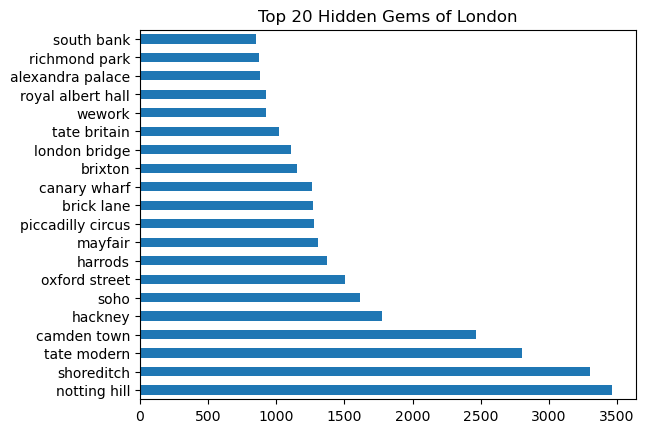

In [209]:
# Plot to show updated top 20 hidden gems
df_concat['name'].value_counts(ascending=0)[:20].plot(kind='barh', title='Top 20 Hidden Gems of London');

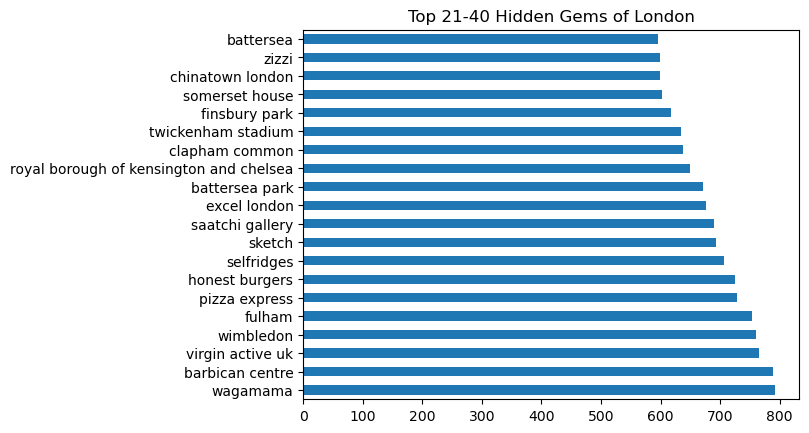

In [210]:
# Plot to show updated top 20 hidden gems
df_concat['name'].value_counts(ascending=0)[20:40].plot(kind='barh', title='Top 21-40 Hidden Gems of London');

In [211]:
# Check if the string contains a substring from the list
str79 = "wimbledon"
res79 = [string for string in list(df_concat['name'].unique()) if str79 in string]

print(res79)

['wimbledon, london', 'wimbledon centre court', 'wimbledon rugby football club', 'odeon wimbledon', 'the ivy café wimbledon village', 'wimbledon high school', 'south park gardens, wimbledon', 'wimbledon hill park', 'wimbledon and putney commons', "wimbledon farmers' market", 'the all england lawn tennis club, wimbledon, london sw19', 'starbucks, wimbledon, london.', 'wimbledon art studios', 'touro steakhouse wimbledon', 'wimbledon - court no. 1', 'southfields/wimbledon', 'south wimbledon', 'wimbledon tennis club centre court', 'the swan, wimbledon', 'the fox and grapes wimbledon common', 'wimbledon chase primary school', 'wimbledon village', 'smash wimbledon', 'greater wimbledon, london', 'wimbledon windmill museum', 'alexandra wimbledon', 'wimbledon common southside', 'wimbledon park', 'made in italy wimbledon', 'wimbledon', 'roxie steak wimbledon', 'the ivy cafe wimbledon village', 'wimbledon common golf club', 'wimbledon lawn tennis club', 'wimbledon chase school', 'gym 1971 - cross

In [212]:
# Remove specific locations
remove_list = ['smash wimbledon', 'wimbledon chase', 'wimbledon common southside', 'touro steakhouse wimbledon', 'wimbledon common half marathon', 'roxie steak wimbledon', 'the ivy cafe wimbledon village', 'san lorenzo - wimbledon', 'elys of wimbledon', 'the fox and grapes wimbledon common', 'wimbledon chase primary school', 'west wimbledon primary school', 'starbucks, wimbledon, london.', 'made in italy wimbledon', '2016 wimbledon championships', 'the ivy café wimbledon village', 'wimbledon chase school']
df_concat = df_concat[~df_concat['name'].isin(remove_list)]

In [213]:
# Rename location names
df_concat['name'] = df_concat['name'].replace({'wimbledon village':'wimbledon',
                                               'greater wimbledon, london':'wimbledon',
                                               'south wimbledon':'wimbledon',
                                               'southfields/wimbledon':'wimbledon',
                                               'wimbledon common,':'wimbledon',
                                               'wimbledon in london':'wimbledon',
                                               'wimbledon, london':'wimbledon'
                                               })

In [214]:
# Check if the string contains a substring from the list
str80 = "barbican"
res80 = [string for string in list(df_concat['name'].unique()) if str80 in string]

print(res80)

['barbican concert hall', 'lauderdale tower, barbican', 'barbican cinema 1', 'st giles, barbican', 'barbican theater', 'neo bar barbican', 'cct venues-barbican', 'barbican estate', 'barbican centre', 'barbican kitchen', 'barbican laundrette', 'barbican conservatory', 'citadines barbican london']


In [215]:
# Remove specific locations
remove_list = ['barbican kitchen', 'barbican estate', 'barbican laundrette', 'lauderdale tower, barbican', 'citadines barbican london', 'st giles, barbican']
df_concat = df_concat[~df_concat['name'].isin(remove_list)]

In [216]:
# Rename location names
df_concat['name'] = df_concat['name'].replace({'barbican concert hall':'barbican centre',
                                               'barbican theater':'barbican centre'
                                               })

In [217]:
# Check if the string contains a substring from the list
str81 = "fulham"
res81 = [string for string in list(df_concat['name'].unique()) if str81 in string]

print(res81)

['fulham pools', 'fulham fc training ground', 'fulham fc official', 'os barbers - 258a fulham road', 'market hall fulham', 'nuffield health fulham fitness & wellbeing gym', 'fulham road', 'cineworld fulham road', 'fulham riverside', 'fulham high street', 'fulham palace garden centre', 'south park, fulham, sw6', 'the atlas - fulham', 'fulham', 'the fulham house', 'the malt house fulham', 'london borough of hammersmith and fulham', 'london - fulham road', 'bishops park, fulham, sw6', 'zippos circus fulham', 'pizzeria da mariano -fulham-hammersmith', 'fulham tattoo', 'the gym fulham', 'royal china fulham', "roxie's steak & wine bar, fulham road", 'the beach at fulham', 'fulham reach boat club', 'fulham fc foundation', 'fulham market', 'locale fulham', 'chelsea and fulham', 'the rose fulham', 'fulham reach, london', 'sweaty betty fulham', 'the kings arms, fulham', 'cock tavern fulham', 'prince of wales fulham', 'fulham reach, w6', 'manuka kitchen fulham road', 'fulham osteopaths', 'fulham 

In [218]:
# Remove specific locations
remove_list = ['market hall fulham', 'royal china fulham', 'fulham reach, london', "roxie's steak & wine bar, fulham road", 'pizzeria da mariano -fulham-hammersmith', 'sweaty betty fulham', 'the beach at fulham', 'fulham palace garden centre', 'fulham reach, w6', 'manuka kitchen fulham road', 'fulham osteopaths', 'fulham pools', 'fulham tattoo', 'fulham broadway', 'the fulham house']
df_concat = df_concat[~df_concat['name'].isin(remove_list)]

In [219]:
# Rename location names
df_concat['name'] = df_concat['name'].replace({'chelsea and fulham':'fulham',
                                               'fulham road':'fulham',
                                               'london borough of hammersmith and fulham':'fulham',
                                               'london - fulham road':'fulham',
                                               'fulham riverside':'fulham',
                                               'fulham high street':'fulham'
                                               })

In [220]:
# Check if the string contains a substring from the list
str82 = "sketch"
res82 = [string for string in list(df_concat['name'].unique()) if str82 in string]

print(res82)

['sketch', 'dr. sketchy london', 'sketch lecture room and library', 'sketch-lecture room and library', 'sketch - gallery - weekend afternoon tea']


In [221]:
# Remove specific locations
remove_list = res82
df_concat = df_concat[~df_concat['name'].isin(remove_list)]

In [222]:
# Check if the string contains a substring from the list
str83 = "selfridges"
res83 = [string for string in list(df_concat['name'].unique()) if str83 in string]

print(res83)

['dior - london selfridges', 'selfridges', 'selfridges london', 'roof deck at selfridges', 'élan café selfridges london', 'selfridges food hall', 'aubaine selfridges', 'the fount champagne bar at selfridges', "dolly's cafe selfridges"]


In [223]:
# Rename location names
df_concat['name'] = df_concat['name'].replace({'selfridges food hall':'selfridges',
                                               'aubaine selfridges':'selfridges',
                                               'élan café selfridges london':'selfridges',
                                               'roof deck at selfridges':'selfridges',
                                               'the fount champagne bar at selfridges':'selfridges',
                                               'selfridges london':'selfridges', 
                                               "dolly's cafe selfridges":'selfridges',
                                               'dior - london selfridges':'selfridges' 
                                               })

In [224]:
# Check if the string contains a substring from the list
str84 = "excel"
res84 = [string for string in list(df_concat['name'].unique()) if str84 in string]

print(res84)

['excel london', 'tony robbins unleash the power within - london excel', 'london excel international exhibition centre', 'ibis styles london excel', 'holiday inn express london - excel', 'moxy london excel', 'london excel exhibition', 'excel london exhibition and convention centre', 'doubletree by hilton london excel', 'novotel london excel', 'aloft london excel', 'professional beauty, london excel', 'the fox excel']


In [225]:
# Remove specific locations
remove_list = ['doubletree by hilton london excel', 'holiday inn express london - excel', 'ibis styles london excel', 'tony robbins unleash the power within - london excel', 'aloft london excel', 'moxy london excel', 'novotel london excel', 'professional beauty, london excel']
df_concat = df_concat[~df_concat['name'].isin(remove_list)]

In [226]:
# Rename location names
df_concat['name'] = df_concat['name'].replace({'london excel exhibition':'excel london',
                                               'excel london exhibition and convention centre':'excel london',
                                               'london excel international exhibition centre':'excel london' 
                                               })

In [227]:
# Check if the string contains a substring from the list
str85 = "kensington and chelsea"
res85 = [string for string in list(df_concat['name'].unique()) if str85 in string]

print(res85)

['royal borough of kensington and chelsea', 'kensington and chelsea', 'the royal borough of kensington and chelsea', "world's end, kensington and chelsea", 'kensington and chelsea register office', 'royal borough of kensington and chelsea cemetery, hanwell']


In [228]:
# Remove specific locations
remove_list = ['kensington and chelsea register office', 'royal borough of kensington and chelsea cemetery, hanwell']
df_concat = df_concat[~df_concat['name'].isin(remove_list)]

In [229]:
# Rename location names
df_concat['name'] = df_concat['name'].replace({'the royal borough of kensington and chelsea':'royal borough of kensington and chelsea',
                                               "world's end, kensington and chelsea":'royal borough of kensington and chelsea',
                                               'kensington and chelsea':'royal borough of kensington and chelsea' 
                                               })

In [230]:
# Check if the string contains a substring from the list
str86 = "virgin active"
res86 = [string for string in list(df_concat['name'].unique()) if str86 in string]

print(res86)

['virgin active uk', 'the broadgate club by virgin active classic', 'virgin active', 'virgin active wallbrook']


In [231]:
# Remove specific locations
remove_list = ['the broadgate club by virgin active classic']
df_concat = df_concat[~df_concat['name'].isin(remove_list)]

In [232]:
# Rename location names
df_concat['name'] = df_concat['name'].replace({'virgin active':'virgin active uk',
                                               'virgin active wallbrook':'virgin active uk'
                                               })

In [233]:
# Check if the string contains a substring from the list
str87 = "battersea park"
res87 = [string for string in list(df_concat['name'].unique()) if str87 in string]

print(res87)

['battersea park', 'battersea park adventure playground', 'putt in the park "battersea park"', 'battersea park-albert gate', 'battersea park boating lake', 'affordable art fair battersea park', 'battersea park millennium arena', 'f45 training battersea park']


In [234]:
# Rename location names
df_concat['name'] = df_concat['name'].replace({'battersea park-albert gate':'battersea park'
                                               })

In [235]:
# Check if the string contains a substring from the list
str88 = "carnaby"
res88 = [string for string in list(df_concat['name'].unique()) if str88 in string]

print(res88)

['carnaby street', 'puma carnaby street', 'mac cosmetics, carnaby st', 'cheap monday carnaby street', 'carnaby street london', 'carnaby court', 'carnaby zebrano', 'irregular choice carnaby', 'shoryu ramen carnaby', "rosa's thai cafe carnaby", "o'neill's - carnaby street", 'carnaby street, soho', 'carnaby london', 'dishoom carnaby', 'kingly court - carnaby street, london']


In [236]:
# Remove specific locations
remove_list = ['puma carnaby street', 'irregular choice carnaby', 'dishoom carnaby', 'cheap monday carnaby street', 'mac cosmetics, carnaby st', "rosa's thai cafe carnaby", 'carnaby zebrano', 'shoryu ramen carnaby']
df_concat = df_concat[~df_concat['name'].isin(remove_list)]

In [237]:
# Rename location names
df_concat['name'] = df_concat['name'].replace({'carnaby street, soho':'carnaby london', 
                                               'carnaby court':'carnaby london',
                                               'kingly court - carnaby street, london':'carnaby london',
                                               'carnaby street':'carnaby london',
                                               'carnaby street london':'carnaby london'
                                               })

In [238]:
# Check if the string contains a substring from the list
str89 = "somerset house"
res89 = [string for string in list(df_concat['name'].unique()) if str89 in string]

print(res89)

['somerset house studios', 'somerset house', 'skate at somerset house']


In [239]:
# Remove specific locations
remove_list = ['skate at somerset house', 'somerset house studios']
df_concat = df_concat[~df_concat['name'].isin(remove_list)]

In [240]:
# Check if the string contains a substring from the list
str90 = "clapham common"
res90 = [string for string in list(df_concat['name'].unique()) if str90 in string]

print(res90)

['be at one clapham common', 'clapham common', 'clapham common old town', 'clapham common northside', 'the rookery, clapham common', 'oncore - clapham common', 'the alexandra, clapham common', 'starbucks clapham common north side', 'clapham common tennis courts']


In [241]:
# Remove specific locations
remove_list = ['starbucks clapham common north side', 'clapham common old town']
df_concat = df_concat[~df_concat['name'].isin(remove_list)]

In [242]:
# Rename location names
df_concat['name'] = df_concat['name'].replace({'clapham common northside':'clapham common'
                                               })

In [243]:
# Check if the string contains a substring from the list
str91 = "saatchi"
res91 = [string for string in list(df_concat['name'].unique()) if str91 in string]

print(res91)

['saatchi gallery', 'm&c saatchi merlin', 'm&c saatchi london', 'saatchi gallery kings road']


In [244]:
# Remove specific locations
remove_list = ['m&c saatchi london']
df_concat = df_concat[~df_concat['name'].isin(remove_list)]

In [245]:
# Rename location names
df_concat['name'] = df_concat['name'].replace({'saatchi gallery kings road':'saatchi gallery'
                                               })

In [246]:
# Check if the string contains a substring from the list
str92 = "twickenham"
res92 = [string for string in list(df_concat['name'].unique()) if str92 in string]

print(res92)

['twickenham stadium', 'york house, twickenham', 'twickenham stoop', 'harlequins twickenham stoop', 'twickenham rowing club', 'twickenham studios', "st mary's university, twickenham", 'twickenham and st. margarets, london', 'twickenham bridge', 'currie motors toyota twickenham']


In [247]:
# Remove specific locations
remove_list = ["st mary's university, twickenham", 'twickenham studios', 'currie motors toyota twickenham']
df_concat = df_concat[~df_concat['name'].isin(remove_list)]

In [248]:
# Rename location names
df_concat['name'] = df_concat['name'].replace({'twickenham stoop':'twickenham stadium',
                                               'harlequins twickenham stoop':'twickenham stadium'
                                               })

In [249]:
# Check if the string contains a substring from the list
str93 = "wework"
res93 = [string for string in list(df_concat['name'].unique()) if str93 in string]

print(res93)

['wework']


In [250]:
# Remove specific locations
remove_list = res93
df_concat = df_concat[~df_concat['name'].isin(remove_list)]

In [251]:
# Check if the string contains a substring from the list
str94 = "peckham"
res94 = [string for string in list(df_concat['name'].unique()) if str94 in string]

print(res94)

['peckham liberal club', 'peckham rye common', 'the gym group, peckham', 'peckham', 'peckham and nunhead', 'peckham bmx', 'level 6, peckham levels', 'queens road peckham overground', 'space studios peckham', 'peckham library', 'peckhamplex', 'the rye | peckham', 'rye lane, peckham', 'theatre peckham', 'peckham craft show', 'copeland gallery, peckham, london', 'the peckham pelican', 'peckham levels', 'market peckham', 'kudu peckham', 'prince of peckham', 'the white horse peckham rye', 'honest burger peckham', "canavan's peckham pool club", 'peckham rye', 'f45 peckham rye', 'franks rooftop bar - peckham', 'peckham south east london', 'kerb x peckham', 'sonsoles print studio in peckham', 'peckham rye park', 'the yard peckham', 'peckham market', 'peckham palms', 'the duke of sussex at peckham', 'near & far peckham', 'yogarise peckham', 'the hope - peckham', 'peckham manor', 'the peckham pulse']


In [252]:
# Remove specific locations
remove_list = ['kerb x peckham', 'peckham levels', 'kudu peckham', 'peckham library', 'level 6, peckham levels', 'honest burger peckham', "canavan's peckham pool club", 'peckham palms', 'near & far peckham', 'the hope - peckham', 'peckham manor']
df_concat = df_concat[~df_concat['name'].isin(remove_list)]

In [253]:
# Rename location names
df_concat['name'] = df_concat['name'].replace({'twickenham stoop':'peckham',
                                               'the rye | peckham':'peckham',
                                               'rye lane, peckham':'peckham',
                                               'peckham south east london':'peckham',
                                               'peckham rye':'peckham'
                                               })

In [254]:
# Check if the string contains a substring from the list
str95a = "china town"
res95a = [string for string in list(df_concat['name'].unique()) if str95a in string]

print(res95a)

['china town', 'china town london', 'yifang taiwan fruit tea - china town']


In [255]:
# Check if the string contains a substring from the list
str95b = "chinatown"
res95b = [string for string in list(df_concat['name'].unique()) if str95b in string]

print(res95b)

['chinatown', 'chinatown london', 'chinatown, london', 'london chinatown', 'london chinatown chinese association']


In [256]:
# Remove specific locations
remove_list = ['yifang taiwan fruit tea - china town', 'london chinatown chinese association']
df_concat = df_concat[~df_concat['name'].isin(remove_list)]

In [257]:
# Rename location names
df_concat['name'] = df_concat['name'].replace({'china town':'chinatown',
                                               'china town london':'chinatown',
                                               'chinatown london':'chinatown',
                                               'chinatown, london':'chinatown',
                                               'london chinatown':'chinatown'
                                               })

In [258]:
# Check if the string contains a substring from the list
str96 = "academy of arts"
res96 = [string for string in list(df_concat['name'].unique()) if str96 in string]

print(res96)

['royal academy of arts', 'senate room at royal academy of arts']


In [259]:
# Rename location names
df_concat['name'] = df_concat['name'].replace({'senate room at royal academy of arts':'royal academy of arts'
                                               })

In [260]:
# Check if the string contains a substring from the list
str97 = "regent street"
res97 = [string for string in list(df_concat['name'].unique()) if str97 in string]

print(res97)

['the burlington arms | regent street', 'apple store, regent street', "kiehl's since 1851 regent street london flagship store", 'regent street', 'london - regent street', 'aqua bar, regent street', 'caffee concerto regent street', "san carlo regent street, st james's", 'espressamente illy regent street', 'regent street cinema', "thomas's at burberry regent street", 'apple regent street', 'tommy hilfiger store, 134-136 regent street, london']


In [261]:
# Remove specific locations
remove_list = ['apple store, regent street', "kiehl's since 1851 regent street london flagship store", 'tommy hilfiger store, 134-136 regent street, london', "san carlo regent street, st james's", "thomas's at burberry regent street", 'apple regent street', 'caffee concerto regent street', 'espressamente illy regent street']
df_concat = df_concat[~df_concat['name'].isin(remove_list)]

In [262]:
# Rename location names
df_concat['name'] = df_concat['name'].replace({'london - regent street':'regent street'
                                               })

In [263]:
# Check if the string contains a substring from the list
str98 = "battersea"
res98 = [string for string in list(df_concat['name'].unique()) if str98 in string]

print(res98)

['battersea bridge/hester road bus stop bl', "st. mary's cemetery, battersea", 'battersea arts centre - bac', 'tigi academy battersea', 'battersea riverside', 'battersea studios', 'bangkok bay battersea', 'nuffield health battersea fitness & wellbeing gym', 'battersea', "st mary's church, battersea", "gail's battersea square", 'go ape battersea', 'battersea reach', 'battersea place', 'pho battersea rise', 'northern line extension to battersea', 'mien tay battersea ltd', 'duchess battersea', "arlo's battersea", 'pont de battersea', 'battersea park', 'battersea ironsides sports club', 'battersea park adventure playground', 'bunga bunga battersea', 'battersea dogs and cats home', 'battersea flower station', 'putt in the park "battersea park"', 'battersea bridge', 'lost society battersea', 'crowne plaza london - battersea', 'battersea park boating lake', 'battersea market 巴特西 - local café & brunch club', 'waterfront bar battersea reach', 'the merchant of battersea', 'the fox at battersea',

In [264]:
# Remove specific locations
remove_list = ['battersea bridge/hester road bus stop bl', 'the source bulk foods battersea', 'bangkok bay battersea', 'battersea dogs and cats home', "gail's battersea square", 'tigi academy battersea', 'mien tay battersea ltd', 'battersea reach', 'lost society battersea', 'crowne plaza london - battersea', 'bunga bunga battersea', "arlo's battersea", 'northern line extension to battersea', 'bmw park lane battersea service centre', 'nine elms, battersea', 'battersea studios', "st. mary's cemetery, battersea", 'battersea smiles', 'battersea place', 'pho battersea rise']
df_concat = df_concat[~df_concat['name'].isin(remove_list)]

In [265]:
# Rename location names
df_concat['name'] = df_concat['name'].replace({'battersea market 巴特西 - local café & brunch club':'battersea market', 
                                               'pont de battersea':'battersea bridge',
                                               'puente de battersea':'battersea bridge'
                                               })

In [266]:
# Check if the string contains a substring from the list
str99 = "wagamama"
res99 = [string for string in list(df_concat['name'].unique()) if str99 in string]

print(res99)

['wagamama', 'wagamama ba terminal five', 'wagamama north greenwich', 'wagamama clink street', 'wagamama gms, 42 great marlborough st', 'wagamama putney']


In [267]:
# Remove specific locations
remove_list = res99
df_concat = df_concat[~df_concat['name'].isin(remove_list)]

In [268]:
# Check if the string contains a substring from the list
str100 = "bus stop"
res100 = [string for string in list(df_concat['name'].unique()) if str100 in string]

print(res100)

['west green road bus stop z', 'kingsland road / waterson street bus stop', 'bus stop j wharfdale road', 'lochnagar street bus stop', 'bus stop e', 'harbour exchange square bus stop s']


In [269]:
# Remove specific locations
remove_list = res100
df_concat = df_concat[~df_concat['name'].isin(remove_list)]

In [270]:
# Check if the string contains a substring from the list
str101 = "cemetry"
res101 = [string for string in list(df_concat['name'].unique()) if str101 in string]

print(res101)

['kemnal park cemetry', 'streatheam cemetry']


In [271]:
# Remove specific locations
remove_list = res101
df_concat = df_concat[~df_concat['name'].isin(remove_list)]

The following locations have been removed:
- 'smash wimbledon', 'wimbledon chase', 'wimbledon common southside', 'touro steakhouse wimbledon', 'wimbledon common half marathon', 'roxie steak wimbledon', 'the ivy cafe wimbledon village', 'san lorenzo - wimbledon', 'elys of wimbledon', 'the fox and grapes wimbledon common', 'wimbledon chase primary school', 'west wimbledon primary school', 'starbucks, wimbledon, london.', 'made in italy wimbledon', '2016 wimbledon championships', 'the ivy café wimbledon village', 'wimbledon chase school'
- 'barbican kitchen', 'barbican estate', 'barbican laundrette', 'lauderdale tower, barbican', 'citadines barbican london', 'st giles, barbican'
- 'market hall fulham', 'royal china fulham', 'fulham reach, london', "roxie's steak & wine bar, fulham road", 'pizzeria da mariano -fulham-hammersmith', 'sweaty betty fulham', 'the beach at fulham', 'fulham palace garden centre', 'fulham reach, w6', 'manuka kitchen fulham road', 'fulham osteopaths', 'fulham pools', 'fulham tattoo', 'fulham broadway', 'the fulham house'
- 'sketch - gallery - weekend afternoon tea', 'sketch lecture room and library', 'sketch', 'dr. sketchy london', 'sketch-lecture room and library'
- 'doubletree by hilton london excel', 'holiday inn express london - excel', 'ibis styles london excel', 'tony robbins unleash the power within - london excel', 'aloft london excel', 'moxy london excel', 'novotel london excel', 'professional beauty, london excel'
- 'kensington and chelsea register office', 'royal borough of kensington and chelsea cemetery, hanwell'
- 'the broadgate club by virgin active classic'
- 'puma carnaby street', 'irregular choice carnaby', 'dishoom carnaby', 'cheap monday carnaby street', 'mac cosmetics, carnaby st', "rosa's thai cafe carnaby", 'carnaby zebrano', 'shoryu ramen carnaby'
- 'skate at somerset house', 'somerset house studios'
- 'starbucks clapham common north side', 'clapham common old town'
- 'm&c saatchi london'
- "st mary's university, twickenham", 'twickenham studios', 'currie motors toyota twickenham'
- 'wework'
- 'kerb x peckham', 'peckham levels', 'kudu peckham', 'peckham library', 'level 6, peckham levels', 'honest burger peckham', "canavan's peckham pool club", 'peckham palms', 'near & far peckham', 'the hope - peckham', 'peckham manor'
- 'yifang taiwan fruit tea - china town', 'london chinatown chinese association'
- 'apple store, regent street', "kiehl's since 1851 regent street london flagship store", 'tommy hilfiger store, 134-136 regent street, london', "san carlo regent street, st james's", "thomas's at burberry regent street", 'apple regent street', 'caffee concerto regent street', 'espressamente illy regent street'
- 'battersea bridge/hester road bus stop bl', 'the source bulk foods battersea', 'bangkok bay battersea', 'battersea dogs and cats home', "gail's battersea square", 'tigi academy battersea', 'mien tay battersea ltd', 'battersea reach', 'lost society battersea', 'crowne plaza london - battersea', 'bunga bunga battersea', "arlo's battersea", 'northern line extension to battersea', 'bmw park lane battersea service centre', 'nine elms, battersea', 'battersea studios', "st. mary's cemetery, battersea", 'battersea smiles', 'battersea place', 'pho battersea rise'
- 'wagamama', 'wagamama ba terminal five', 'wagamama north greenwich', 'wagamama gms, 42 great marlborough st', 'wagamama putney', 'wagamama clink street'
- 'bus stop e', 'harbour exchange square bus stop s', 'kingsland road / waterson street bus stop'
- 'streatheam cemetry'

#### Examining of hidden gems (41-50)

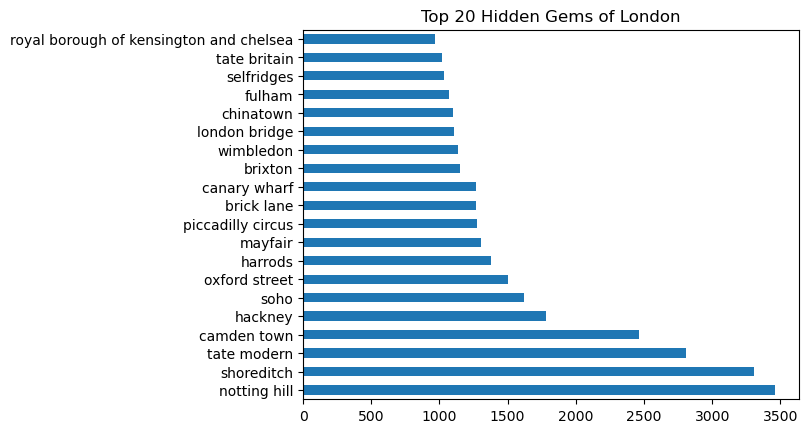

In [272]:
# Plot to show updated top 20 hidden gems
df_concat['name'].value_counts(ascending=0)[:20].plot(kind='barh', title='Top 20 Hidden Gems of London');

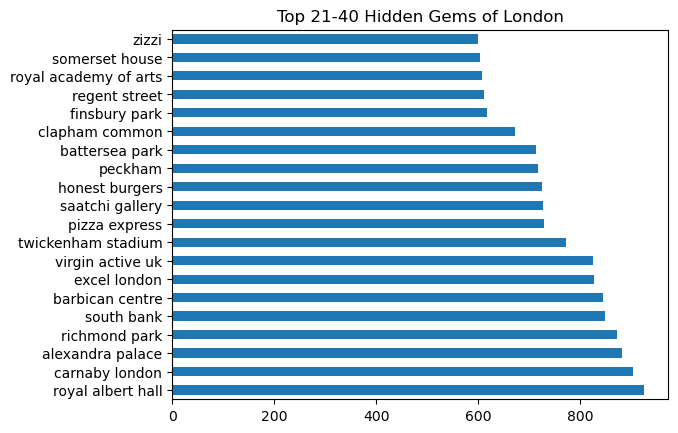

In [273]:
# Plot to show updated top 20 hidden gems
df_concat['name'].value_counts(ascending=0)[20:40].plot(kind='barh', title='Top 21-40 Hidden Gems of London');

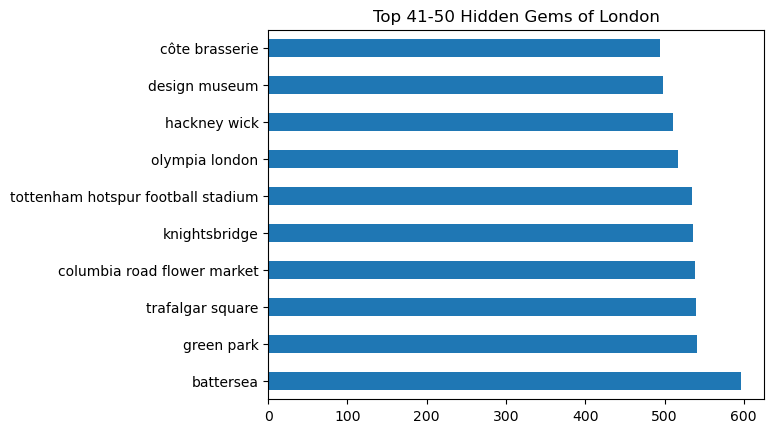

In [274]:
# Plot to show updated top 20 hidden gems
df_concat['name'].value_counts(ascending=0)[40:50].plot(kind='barh', title='Top 41-50 Hidden Gems of London');

In [275]:
# Check if the string contains a substring from the list
str102 = "finsbury"
res102 = [string for string in list(df_concat['name'].unique()) if str102 in string]

print(res102)

["world's end finsbury park", 'finsbury park community hub', 'finsbury square garden', 'finsbury park', '2 finsbury avenue', 'finsbury park athletics track', 'the old finsbury town hall', 'finsbury park, london', 'finsbury', 'finsbury leisure center', 'yak & yeti - finsbury park', 'the finsbury pub', 'finsbury square', 'finsbury health centre', 'creams cafe finsbury park', 'finsbury leisure centre', 'puregym finsbury', 'finsbury circus', 'save our post office in finsbury park', 'the finsbury', 'quality fish bar - finsbury park london']


In [276]:
# Remove specific locations
remove_list = ['yak & yeti - finsbury park', '2 finsbury avenue', 'finsbury circus', 'creams cafe finsbury park', 'save our post office in finsbury park', 'quality fish bar - finsbury park london']
df_concat = df_concat[~df_concat['name'].isin(remove_list)]

In [277]:
# Rename location names
df_concat['name'] = df_concat['name'].replace({'finsbury':'finsbury park', 
                                               'finsbury square':'finsbury square garden',
                                               'finsbury park, london':'finsbury park',
                                               'finsbury leisure center':'finsbury leisure centre'
                                               })

In [278]:
# Check if the string contains a substring from the list
str103 = "tottenham"
res103 = [string for string in list(df_concat['name'].unique()) if str103 in string]

print(res103)

['tottenham marshes', 'fitness first - tottenham court rd', 'ikea tottenham', 'tottenham court road', 'saco fitzrovia - tottenham street', 'tottenham green leisure centre', 'tottenham green pools & fitness', 'tottenham green leisure centre 1 philip lane tottenham n15 4ja', 'no.8 at tottenham', 'st benet fink church, tottenham', 'tottenham seven sisters', 'tottenham green market', 'odeon tottenham court rd', 'tottenham lock', 'tottenham', 'tottenham green, london', 'haringey irish centre tottenham page', 'df/mexico tottenham court road', 'river lea canal, tottenham hale', 'seven sisters market, tottenham', 'the gym tottenham hale', 'tottenham hotspur football stadium', 'tottenham hale', 'white hart lane tottenham london', 'tottenham high road', 'south tottenham', 'tottenham town hall', 'waterstones tottenham court road', 'tottenham hale,nort london', 'tottenham community sports centre', 'grow tottenham', 'bruce grove park, tottenham', 'high road tottenham', 'blighty tottenham', 'the gym

In [279]:
# Remove specific locations
remove_list = ['tottenham court road', 'grow tottenham', 'haringey irish centre tottenham page', 'df/mexico tottenham court road', 'odeon tottenham court rd', 'white hart lane tottenham london', 'waterstones tottenham court road', 'high road tottenham', 'saco fitzrovia - tottenham street', 'tottenham high road', 'blighty tottenham', 'ikea tottenham']
df_concat = df_concat[~df_concat['name'].isin(remove_list)]

In [280]:
# Check if the string contains a substring from the list
str104 = "knightsbridge"
res104 = [string for string in list(df_concat['name'].unique()) if str104 in string]

print(res104)

['hb health of knightsbridge', 'beauchamp bar knightsbridge', 'knightsbridge', 'gloucester pub knightsbridge', "ciro's pizza pomodoro - knightsbridge", 'searcys knightsbridge', 'starbucks knightsbridge', 'mamounia lounge knightsbridge', 'hans place, knightsbridge', 'topshop (knightsbridge)', 'paxtons head knightsbridge', 'knightsbridge tattersalls']


In [281]:
# Remove specific locations
remove_list = ["ciro's pizza pomodoro - knightsbridge", 'searcys knightsbridge', 'starbucks knightsbridge', 'beauchamp bar knightsbridge', 'topshop (knightsbridge)', 'mamounia lounge knightsbridge', 'hb health of knightsbridge']
df_concat = df_concat[~df_concat['name'].isin(remove_list)]

In [282]:
# Check if the string contains a substring from the list
str105 = "trafalgar square"
res105 = [string for string in list(df_concat['name'].unique()) if str105 in string]

print(res105)

['pret a manger trafalgar square north', 'trafalgar square, london', 'trafalgar square', "waterstone's trafalgar square", 'pall mall barbers trafalgar square', 'fourth plinth trafalgar square', 'thistle trafalgar square', 'the grand at trafalgar square']


In [283]:
# Remove specific locations
remove_list = ['pret a manger trafalgar square north', 'thistle trafalgar square', "waterstone's trafalgar square", 'the grand at trafalgar square']
df_concat = df_concat[~df_concat['name'].isin(remove_list)]

In [284]:
# Rename location names
df_concat['name'] = df_concat['name'].replace({'trafalgar square, london':'trafalgar square'
                                               })

In [285]:
# Check if the string contains a substring from the list
str106 = "olympia"
res106 = [string for string in list(df_concat['name'].unique()) if str106 in string]

print(res106)

['olympia london', 'earls court and olympia', 'spirit of christmas, olympia', 'olympia exhibition hall complex', 'pergola olympia london', 'kensington olympia', 'london kensington olympia', 'hilton london olympia kensington high street', 'olympia exhibition halls', 'national hall, olympia', 'top drawer at olympia', 'olympia, the london international horse show', 'vegfest @ olympia', 'olympia conference centre']


In [286]:
# Remove specific locations
remove_list = ['top drawer at olympia', 'pergola olympia london', 'kensington olympia', 'london kensington olympia', 'hilton london olympia kensington high street']
df_concat = df_concat[~df_concat['name'].isin(remove_list)]

In [287]:
# Rename location names
df_concat['name'] = df_concat['name'].replace({'olympia, the london international horse show':'olympia london',
                                               'earls court and olympia':'olympia london',
                                               'national hall, olympia':'olympia london',
                                               'vegfest @ olympia':'olympia london',
                                               'olympia conference centre':'olympia london',
                                               'spirit of christmas, olympia':'olympia london', 
                                               'olympia exhibition halls':'olympia london',
                                               'olympia exhibition hall complex':'olympia london'
                                              })

In [288]:
# Check if the string contains a substring from the list
str107 = "design museum"
res107 = [string for string in list(df_concat['name'].unique()) if str107 in string]

print(res107)

['design museum', 'the design museum']


In [289]:
# Rename location names
df_concat['name'] = df_concat['name'].replace({'the design museum':'design museum'
                                              })

In [290]:
# Check if the string contains a substring from the list
str108 = "pizza"
res108 = [string for string in list(df_concat['name'].unique()) if str108 in string]

print(res108)

['paradise slice pizza shop', 'pizza express', 'nenno pizza', 'franco manca sourdough pizza', 'starlane pizza bar', 'pizza union', 'jose pizzaro', 'pizza express baker street', 'pizza express ealing', 'yard sale pizza', 'pi pizza', "blooms pizza cafe'", 'pizza pilgrims', 'lost boys pizza', 'street pizza', 'well street pizza', 'mod pizza uk', 'homeslice pizza bbc television centre', 'pizza sophia', 'happy face pizza', 'pizzarte', 'thoroughbread pizza', 'the pheasantry pizza express', 'homeslice pizza', 'pizza east', 'gourmet pizza co', 'crazy pizza london', 'pizzaexpress live', 'pizza metro', 'rust bucket pizza co', 'pizza union leman street', 'pizza da vinci', 'pizza slut', 'homeslice pizza fitzrovia', 'laboratorio pizza', 'the pizza room london', '1n1 fashion n pizza', 'pizza warehouse ltd', 'pizzafiend', 'pizza pickup', "domino's pizza london - finchley road"]


In [291]:
# Remove specific locations
remove_list = res108
df_concat = df_concat[~df_concat['name'].isin(remove_list)]

In [292]:
# Check if the string contains a substring from the list
str109 = "winter wonderland"
res109 = [string for string in list(df_concat['name'].unique()) if str109 in string]

print(res109)

['winter wonderland']


In [293]:
# Remove specific locations
remove_list = res109
df_concat = df_concat[~df_concat['name'].isin(remove_list)]

In [294]:
# Check if the string contains a substring from the list
str110 = "burger"
res110 = [string for string in list(df_concat['name'].unique()) if str110 in string]

print(res110)

['byron hamburgers', 'honest burgers', "tommi's burger joint", 'gourmet burger kitchen', 'rodeos burgers & shakes', 'burger king leicester square', 'dip & flip burger, tooting high street', 'fatburger uk', 'band of burgers', 'boom bap burger', 'brioche burger', 'chicken shop & dirtyburger, whitechapel', 'chuck burgers at big chill kings cross', 'haché burgers', 'spielburger, hampstead', 'byron hamburgers islington', "chico's burgers", 'bao burger beer', 'cut & grind burgers', 'burger king', 'byron burger, wandsworth, london', 'bite me burger co.', 'oasi burger', 'wahlburgers uk', 'black bear burger', 'burger & lobster', 'vegan burgers by mooshies', 'halo burger', "amigo's burgers & shakes", 'burger and beyond', 'byron burgers,', 'burger uk', 'dirty burger', 'boom burger', 'joe & co. burgers', 'proper burgers', 'prime burger', 'byron burger earls court rd', 'yen burger', 'byron burger kensington', 'burger king stratford', 'byron burger, london', 'beer + burger']


In [295]:
# Remove specific locations
remove_list = res110
df_concat = df_concat[~df_concat['name'].isin(remove_list)]

In [296]:
# Check if the string contains a substring from the list
str111 = "columbia road flower market"
res111 = [string for string in list(df_concat['name'].unique()) if str111 in string]

print(res111)

['columbia road flower market']


In [297]:
# Check if the string contains a substring from the list
str111 = "old spitalfields market"
res111 = [string for string in list(df_concat['name'].unique()) if str111 in string]

print(res111)

['old spitalfields market', 'shoredish, old spitalfields market']


In [298]:
# Rename location names
df_concat['name'] = df_concat['name'].replace({'shoredish, old spitalfields market':'old spitalfields market'
                                              })

In [299]:
# Check if the string contains a substring from the list
str112 = "èlan cafe"
res112 = [string for string in list(df_concat['name'].unique()) if str112 in string]

print(res112)

['èlan cafe']


In [300]:
# Remove specific locations
remove_list = res112
df_concat = df_concat[~df_concat['name'].isin(remove_list)]

The following locations have been removed:
- 'yak & yeti - finsbury park', '2 finsbury avenue', 'finsbury circus', 'creams cafe finsbury park', 'save our post office in finsbury park', 'quality fish bar - finsbury park london'
- 'tottenham court road', 'grow tottenham', 'haringey irish centre tottenham page', 'df/mexico tottenham court road', 'odeon tottenham court rd', 'white hart lane tottenham london', 'waterstones tottenham court road', 'high road tottenham', 'saco fitzrovia - tottenham street', 'tottenham high road', 'blighty tottenham', 'ikea tottenham'
- "ciro's pizza pomodoro - knightsbridge", 'searcys knightsbridge', 'starbucks knightsbridge', 'beauchamp bar knightsbridge', 'topshop (knightsbridge)', 'mamounia lounge knightsbridge', 'hb health of knightsbridge'
- 'pret a manger trafalgar square north', 'thistle trafalgar square', "waterstone's trafalgar square", 'the grand at trafalgar square'
- 'top drawer at olympia', 'pergola olympia london', 'kensington olympia', 'london kensington olympia', 'hilton london olympia kensington high street'
- 'happy face pizza', 'homeslice pizza', 'pizza express', 'pizza east', 'nenno pizza', 'franco manca sourdough pizza', 'rust bucket pizza co', 'pizza union', 'pi pizza', 'pizza union leman street', 'pizza da vinci', 'pizza slut', "blooms pizza cafe'", 'homeslice pizza bbc television centre', 'well street pizza', 'mod pizza uk', 'yard sale pizza', 'gourmet pizza co', 'pizza express ealing', 'homeslice pizza fitzrovia', 'crazy pizza london', 'laboratorio pizza', 'lost boys pizza', 'pizza pilgrims', 'pizzaexpress live', 'pizza metro', 'starlane pizza bar', 'pizzarte', 'pizza sophia', 'the pheasantry pizza express', 'street pizza', 'jose pizzaro', 'the pizza room london', 'pizza express baker street', '1n1 fashion n pizza', 'pizza warehouse ltd', 'paradise slice pizza shop', 'pizzafiend', 'pizza pickup', "domino's pizza london - finchley road"
- 'winter wonderland'
- 'byron hamburgers', 'honest burgers', 'gourmet burger kitchen', 'boom bap burger', 'brioche burger', 'dirty burger', 'burger & lobster', 'boom burger', 'joe & co. burgers', 'vegan burgers by mooshies', 'halo burger', 'chicken shop & dirtyburger, whitechapel', 'haché burgers', 'band of burgers', "tommi's burger joint", 'proper burgers', 'dip & flip burger, tooting high street', 'fatburger uk', 'burger and beyond', "chico's burgers", 'byron burgers,', 'prime burger', 'byron burger earls court rd', 'burger uk', 'oasi burger', 'rodeos burgers & shakes', 'byron hamburgers islington', 'bao burger beer', 'cut & grind burgers', 'yen burger', 'black bear burger', 'byron burger, wandsworth, london', 'byron burger kensington', 'wahlburgers uk', "amigo's burgers & shakes", 'burger king', 'burger king stratford', 'byron burger, london', 'spielburger, hampstead', 'beer + burger'
- 'èlan cafe'

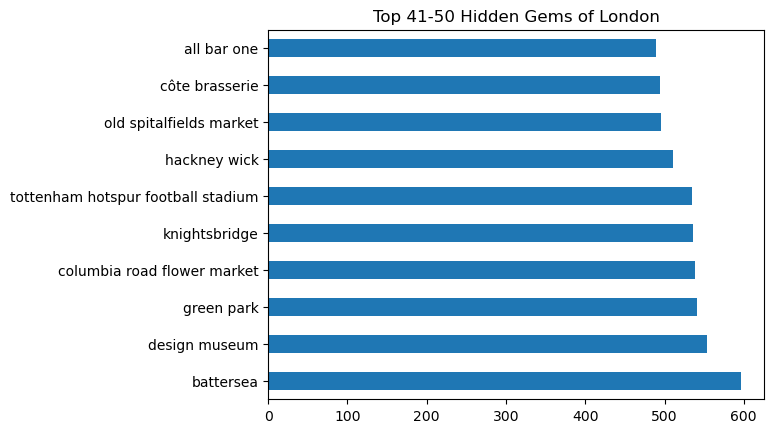

In [301]:
# Plot to show updated top 41-50 hidden gems
df_concat['name'].value_counts(ascending=0)[40:50].plot(kind='barh', title='Top 41-50 Hidden Gems of London');

In [302]:
# Check if the string contains a substring from the list
str113 = "wandsworth"
res113 = [string for string in list(df_concat['name'].unique()) if str113 in string]

print(res113)

['wandsworth common', 'the church of jesus christ of latter day saints, wandsworth chapel, london.', 'spencer park, wandsworth common', 'wandsworth park', 'wandsworth park- (putney bridge road)', 'nuffield health wandsworth fitness & wellbeing gym', '575 wandsworth road', 'wandsworth', 'crossfit wandsworth', 'wandsworth bridge road', 'wandsworth civic suite', 'flip out wandsworth', 'puregym london wandsworth', 'the ship, wandsworth.', 'f45 training wandsworth', 'ram quarter wandsworth', 'london borough of wandsworth', 'queen adelaide wandsworth', 'the alma wandsworth', 'southside wandsworth', 'wandsworth town hall', 'wandsworth road', 'the hope, wandsworth common']


In [303]:
# Remove specific locations
remove_list = ['wandsworth road', 'southside wandsworth', 'flip out wandsworth', 'wandsworth civic suite', 'ram quarter wandsworth', '575 wandsworth road', 'wandsworth bridge road']
df_concat = df_concat[~df_concat['name'].isin(remove_list)]

In [304]:
# Rename location names
df_concat['name'] = df_concat['name'].replace({'london borough of wandsworth':'wandsworth'
                                              })

In [305]:
# Check if the string contains a substring from the list
str114 = "the ned"
res114 = [string for string in list(df_concat['name'].unique()) if str114 in string]

print(res114)

['the ned london', 'malibu kitchen at the ned']


In [306]:
# Remove specific locations
remove_list = res114
df_concat = df_concat[~df_concat['name'].isin(remove_list)]

In [307]:
# Check if the string contains a substring from the list
str115 = "coal drops"
res115 = [string for string in list(df_concat['name'].unique()) if str115 in string]

print(res115)

['coal drops yard', '97 coal drops yard', 'fred perry coal drops yard', 'barrafina coal drops yard']


In [308]:
# Remove specific locations
remove_list = res115
df_concat = df_concat[~df_concat['name'].isin(remove_list)]

The following locations have been removed:
- 'wandsworth road', 'southside wandsworth', 'flip out wandsworth', 'wandsworth civic suite', 'ram quarter wandsworth', '575 wandsworth road', 'wandsworth bridge road'
- 'the ned london', 'malibu kitchen at the ned'
- 'barrafina coal drops yard', 'coal drops yard', '97 coal drops yard', 'fred perry coal drops yard'

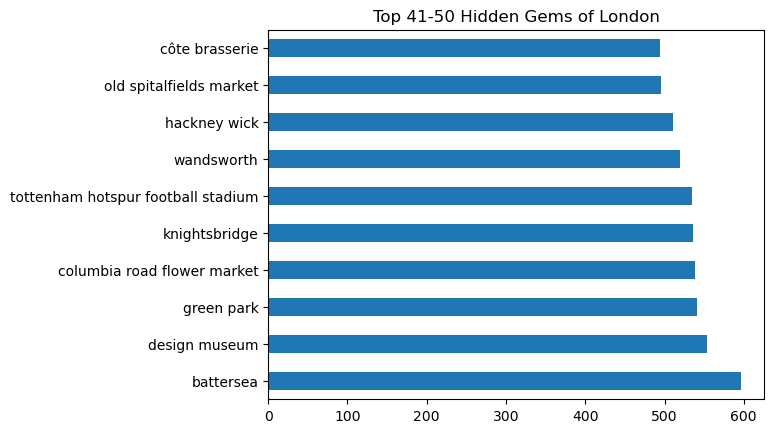

In [309]:
# Plot to show updated top 41-50 hidden gems
df_concat['name'].value_counts(ascending=0)[40:50].plot(kind='barh', title='Top 41-50 Hidden Gems of London');

In [310]:
# Check if the string contains a substring from the list
str116 = "little venice"
res116 = [string for string in list(df_concat['name'].unique()) if str116 in string]

print(res116)

['little venice, london', 'little venice', 'the waterside cafe - little venice, london', 'canalway cavalcade, little venice', 'little venice canalway cavalcade']


In [311]:
# Remove specific locations
remove_list = ['the waterside cafe - little venice, london']
df_concat = df_concat[~df_concat['name'].isin(remove_list)]

In [312]:
# Rename location names
df_concat['name'] = df_concat['name'].replace({'little venice, london':'little venice',
                                               'canalway cavalcade, little venice':'little venice',
                                               'little venice canalway cavalcade':'little venice'
                                              })

In [313]:
# Check if the string contains a substring from the list
str117 = "truman brewery"
res117 = [string for string in list(df_concat['name'].unique()) if str117 in string]

print(res117)

['the truman brewery', 'old truman brewery', 'old truman brewery, brick lane', 'the london coffee festival, truman brewery', 'truman brewery', 'old truman brewery, dray walk']


In [314]:
# Remove specific locations
remove_list = ['the london coffee festival, truman brewery']
df_concat = df_concat[~df_concat['name'].isin(remove_list)]

In [315]:
# Rename location names
df_concat['name'] = df_concat['name'].replace({'old truman brewery, dray walk':'old truman brewery',
                                               'truman brewery':'the truman brewery',
                                               'old truman brewery, brick lane':'old truman brewery'
                                              })

The following locations have been removed:
- 'the waterside cafe - little venice, london'
- 'the london coffee festival, truman brewery'

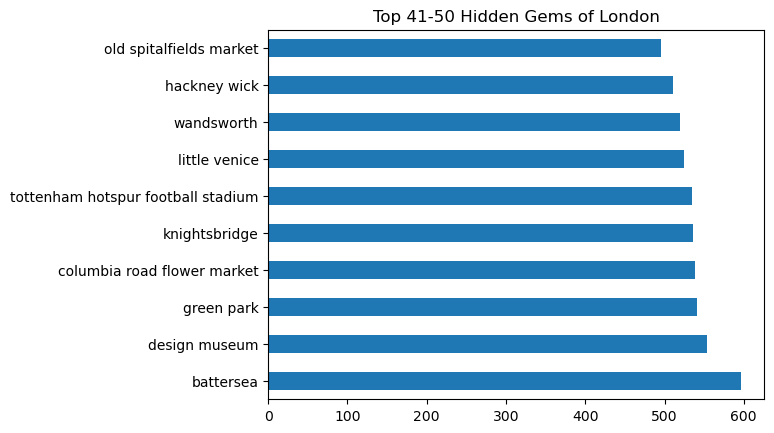

In [316]:
# Plot to show updated top 41-50 hidden gems
df_concat['name'].value_counts(ascending=0)[40:50].plot(kind='barh', title='Top 41-50 Hidden Gems of London');

In [317]:
df_concat['name'].nunique()

15146

- We have have 14442 location names.
- We will attempt to do a quick clean of the next 50 by removing places non-related to the project.

#### Examining of hidden gems (51-100)

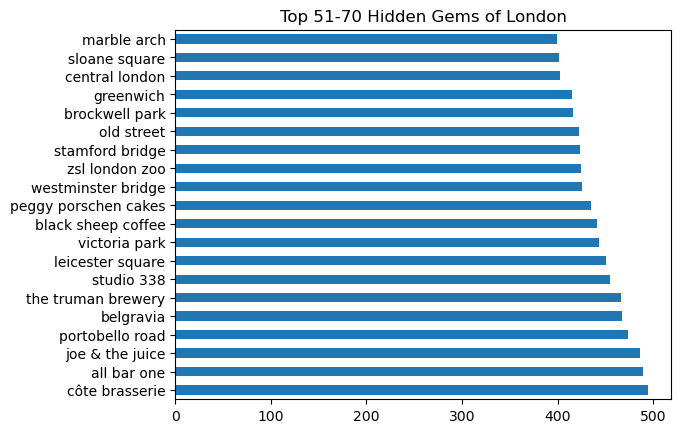

In [318]:
# Plot to show updated top 51-70 hidden gems
df_concat['name'].value_counts(ascending=0)[50:70].plot(kind='barh', title='Top 51-70 Hidden Gems of London');

In [319]:
# Check if the string contains a substring from the list
str118 = "peggy porschen"
res118 = [string for string in list(df_concat['name'].unique()) if str118 in string]

print(res118)

['peggy porschen cakes']


In [320]:
# Remove specific locations
remove_list = res118
df_concat = df_concat[~df_concat['name'].isin(remove_list)]

In [321]:
# Check if the string contains a substring from the list
str119 = "airport"
res119 = [string for string in list(df_concat['name'].unique()) if str119 in string]

print(res119)

['hitrow airport', 'terminal 3 london heathrow airport (lhr)', 'hithrow airport', 'heathrow airport business class lounge', 'holiday inn express london - luton airport', 'premier inn heathrow airport bath road', 'singapore airlines silverkris lounge, london heathrow airport', 'nnamdi azikiwe international airport', 'doubletree by hilton london heathrow airport', 'ibis london heathrow airport', "huxley's bar and kitchen heathrow airport", "smokers' shelter - london city airport", 'huxleys heathrow airport', 'gatwick airport north terminal', 'london heartrow airport', 'london city airport', 'stansed airport', 'london gatwick airport south terminal', 'ldn city airport', 'heathrow airport', 'la salle resturant and bar. terminal 2 heathrow airport', 'heatrow airport london', 'london city airport jet centre', 'stansted airport', 'london heathrow airport (lhr)', 'hyatt place london heathrow airport', 'concorde lounge and spa at heathrow airport', 'caviar house heathrow airport']


In [322]:
# Remove specific locations
remove_list = res119
df_concat = df_concat[~df_concat['name'].isin(remove_list)]

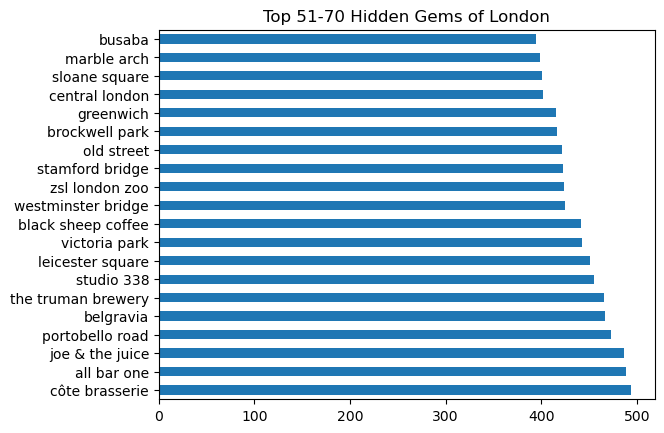

In [323]:
# Plot to show updated top 51-70 hidden gems
df_concat['name'].value_counts(ascending=0)[50:70].plot(kind='barh', title='Top 51-70 Hidden Gems of London');

In [324]:
# Check if the string contains a substring from the list
str120 = "central saint martins"
res120 = [string for string in list(df_concat['name'].unique()) if str120 in string]

print(res120)

['central saint martins']


In [325]:
# Remove specific locations
remove_list = res120
df_concat = df_concat[~df_concat['name'].isin(remove_list)]

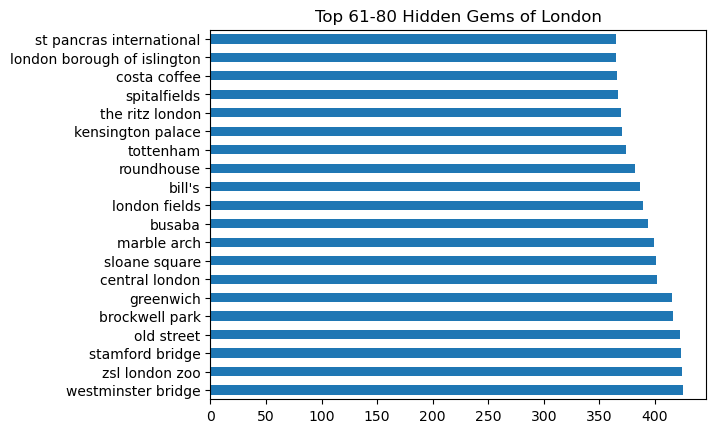

In [326]:
# Plot to show updated top 61-80 hidden gems
df_concat['name'].value_counts(ascending=0)[60:80].plot(kind='barh', title='Top 61-80 Hidden Gems of London');

In [327]:
# Check if the string contains a substring from the list
str121 = "the ritz"
res121 = [string for string in list(df_concat['name'].unique()) if str121 in string]

print(res121)

['the ritz - the rivoli bar', 'the ritz london', 'upstairs at the ritzy', 'the rivoli bar at the ritz']


In [328]:
# Remove specific locations
remove_list = ['the ritz london']
df_concat = df_concat[~df_concat['name'].isin(remove_list)]

In [329]:
# Rename location names
df_concat['name'] = df_concat['name'].replace({'the rivoli bar at the ritz':'the rivoli bar ', 
                                               'the ritz - the rivoli bar':'the rivoli bar '
                                               })

In [330]:
# Check if the string contains a substring from the list
str122 = "st pancras"
res122 = [string for string in list(df_concat['name'].unique()) if str122 in string]

print(res122)

['searcys st pancras', 'st pancras', 'st pancras brasserie champagne bar', 'businesspremier lounge, eurostar @ st pancras international', "regent's canal towpath (st pancras)", 'st pancras international', 'st pancras, london', 'pullman london st pancras', 'st pancras old church', 'st pancras lock', 'st pancras square', 'st pancras and islington cemetery', 'the crypt gallery (st pancras)']


In [331]:
# Remove specific locations
remove_list = ['searcys st pancras', 'st pancras, london', 'pullman london st pancras', 'st pancras square', "regent's canal towpath (st pancras)", 'st pancras international', 'st pancras and islington cemetery', 'st pancras brasserie champagne bar']
df_concat = df_concat[~df_concat['name'].isin(remove_list)]

In [332]:
# Check if the string contains a substring from the list
str123a = "bills"
res123a = [string for string in list(df_concat['name'].unique()) if str123a in string]

print(res123a)

['bills angel', 'bills at hoxton square']


In [333]:
# Remove specific locations
remove_list = res123a
df_concat = df_concat[~df_concat['name'].isin(remove_list)]

In [334]:
# Check if the string contains a substring from the list
str123b = "bill's"
res123b = [string for string in list(df_concat['name'].unique()) if str123b in string]

print(res123b)

["bill's, islington", "bill's", "bill's cafe", "nanny bill's", "bill's, baker street"]


In [335]:
# Remove specific locations
remove_list = res123b
df_concat = df_concat[~df_concat['name'].isin(remove_list)]

In [336]:
# Check if the string contains a substring from the list
str124 = "fortnum & mason"
res124 = [string for string in list(df_concat['name'].unique()) if str124 in string]

print(res124)

['fortnum & mason terminal 5', 'fortnum & mason', 'diamond jubilee tea salon at fortnum & mason', 'fortnum & mason bar']


In [337]:
# Remove specific locations
remove_list = res124
df_concat = df_concat[~df_concat['name'].isin(remove_list)]

In [338]:
# Check if the string contains a substring from the list
str125 = "terminal"
res125 = [string for string in list(df_concat['name'].unique()) if str125 in string]

print(res125)

['wondertree terminal 2', 'etihad airways terminal 4', 'heathrow terminal 3 the three bells pub & kitchen', 'heathrow terminal 3', 'heathrow terminal 2', 'emirates air line royal docks terminal', 'club aspire lounge, heathrow terminal 3', 'london heathrow-terminal 4 arrivals', 'heathrow terminal 5', 'london heathrow terminal 5 - british airways club lounge', 'heathrow terminal 4', 'eurostar, st. pancras international terminal', 'cafe nero terminal 3 heathro', 'terminal 5']


In [339]:
# Remove specific locations
remove_list = res125
df_concat = df_concat[~df_concat['name'].isin(remove_list)]

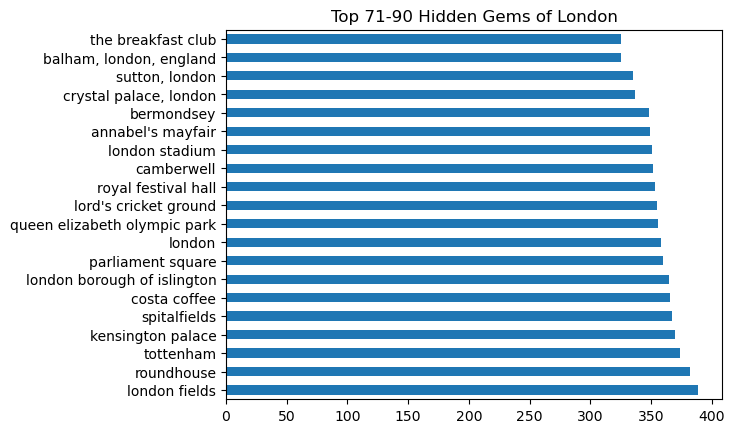

In [340]:
# Plot to show updated top 71-90 hidden gems
df_concat['name'].value_counts(ascending=0)[70:90].plot(kind='barh', title='Top 71-90 Hidden Gems of London');

In [341]:
# Check if the string contains a substring from the list
str126 = "duck & waffle"
res126 = [string for string in list(df_concat['name'].unique()) if str126 in string]

print(res126)

['duck & waffle', 'duck & waffle local']


In [342]:
# Remove specific locations
remove_list = res126
df_concat = df_concat[~df_concat['name'].isin(remove_list)]

In [343]:
# Check if the string contains a substring from the list
str127 = "zizzi"
res127 = [string for string in list(df_concat['name'].unique()) if str127 in string]

print(res127)

['zizzi restarant greenwich', 'zizzi', 'zizzi 02']


In [344]:
# Remove specific locations
remove_list = res127
df_concat = df_concat[~df_concat['name'].isin(remove_list)]

In [345]:
# Check if the string contains a substring from the list
str128 = "joe"
res128 = [string for string in list(df_concat['name'].unique()) if str128 in string]

print(res128)

["joe's brasserie", 'joe public sw4', "joe's cafe - sloane street", 'joel and son fabrics', 'joe & the juice', "texas joe's", "joe's bar", "l'atelier de joel robuchon london", 'joe public', 'joe macari performance cars', 'joe and co', "joe's kitchen", 'joe lounge london', "joe's chicken", 'paul & joe', 'joelson']


In [346]:
# Remove specific locations
remove_list = res128
df_concat = df_concat[~df_concat['name'].isin(remove_list)]

In [347]:
# Check if the string contains a substring from the list
str129 = "ivy"
res129 = [string for string in list(df_concat['name'].unique()) if str129 in string]

print(res129)

['the ivy club', 'the ivy chelsea garden', 'the ivy house', 'the ivy cafe blackheath', 'the ivy market grill', "the ivy st john's wood", 'the ivy city garden', 'the ivy kensington brasserie', 'the ivy cafe marylebone', 'the ivy, west street', 'the club, at the ivy']


In [348]:
# Remove specific locations
remove_list = res129
df_concat = df_concat[~df_concat['name'].isin(remove_list)]

In [349]:
# Check if the string contains a substring from the list
str130 = "central london"
res130 = [string for string in list(df_concat['name'].unique()) if str130 in string]

print(res130)

['central london', 'seventh-day adventist church - central london', 'south central london', 'central london reflexology', "st james' park, central london", 'central london civil justice centre county court']


In [350]:
# Remove specific locations
remove_list = ['central london', 'central london civil justice centre county court', 'south central london']
df_concat = df_concat[~df_concat['name'].isin(remove_list)]

In [351]:
# Check if the string contains a substring from the list
str131 = "sushisamba"
res131 = [string for string in list(df_concat['name'].unique()) if str131 in string]

print(res131)

['sushisamba']


In [352]:
# Remove specific locations
remove_list = res131
df_concat = df_concat[~df_concat['name'].isin(remove_list)]

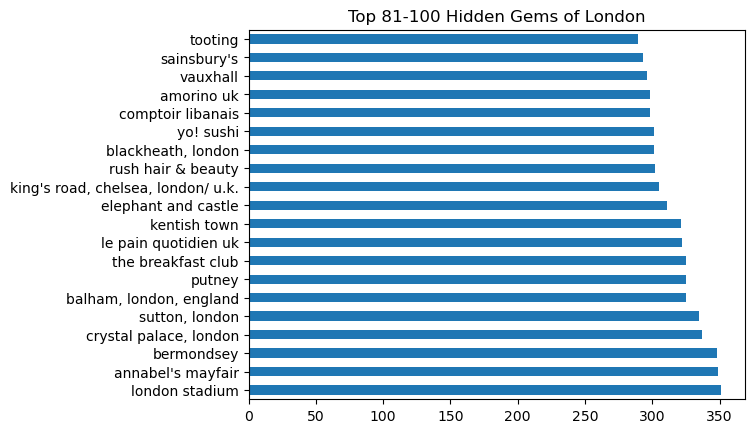

In [353]:
# Plot to show updated top 81-100 hidden gems
df_concat['name'].value_counts(ascending=0)[80:100].plot(kind='barh', title='Top 81-100 Hidden Gems of London');

In [354]:
# Check if the string contains a substring from the list
str132 = "élan cafe"
res132 = [string for string in list(df_concat['name'].unique()) if str132 in string]

print(res132)

['élan cafe']


In [355]:
# Remove specific locations
remove_list = res132
df_concat = df_concat[~df_concat['name'].isin(remove_list)]

In [356]:
# Remove specific locations
remove_list = ['london']
df_concat = df_concat[~df_concat['name'].isin(remove_list)]

In [357]:
# Check if the string contains a substring from the list
str133 = "brasserie"
res133 = [string for string in list(df_concat['name'].unique()) if str133 in string]

print(res133)

['brasserie max', 'côte brasserie', "olio's brasserie", 'mont martre brasserie', 'brasserie blanc charlotte street london', 'london street brasserie', 'boulevard brasserie', 'acoustic brasserie', 'brasserie of light', 'oxo tower brasserie', 'oriel grande brasserie', 'bombay brasserie', 'maya italian brasserie', 'brasserie zédel', 'la brasserie', 'brasserie blanc southbank', 'brasserie blanc chancery lane', 'mem and laz brasserie', '84 west brasserie & grill', 'granary square brasserie', 'chelsea riverside brasserie', 'high road brasserie', 'bugis street brasserie @ millennium', 'palm court brasserie', 'brasserie vacherin', "langan's brasserie", 'darwin brasserie', 'the brasserie @ the tower', 'mala indian brasserie']


In [358]:
# Remove specific locations
remove_list = res133
df_concat = df_concat[~df_concat['name'].isin(remove_list)]

In [359]:
# Check if the string contains a substring from the list
str134 = "coffee"
res134 = [string for string in list(df_concat['name'].unique()) if str134 in string]

print(res134)

['coffee island', 'costa coffee', 'notes coffee, food & wine', 'artisan coffee', 'crosstown - doughnuts & coffee', 'fcb coffee', 'the coffee traveller', 'workshop coffee', 'lion coffee + records', 'drury tea & coffee', 'origin coffee roasters - the aircraft factory', 'paws for coffee', 'the coffee house', 'curators coffee', 'black sheep coffee', '26 tap coffee', '11 coffee & co ealing', 'claud w. dennis coffee', 'prufrock coffee', 'craving coffee', 'ko coffee', 'coffee zee', 'starbucks coffee', 'back on track coffee', 'the coffee works project', 'scarlett coffee roastery', 'beany green coffee', 'abuelo coffee house & kitchen', 'aldgate coffee house', 'giddy up coffee', 'coffee is my cup of tea', 'caravan coffee roasters', 'trade coffee', "chi chi's coffee & waffle house", 'di stefano coffee', 'coffee & crayons café', 'amoret specality coffee', 'chairs and coffee', 'tap coffee', 'estate office coffee', 'carter lane coffee house', '39 steps coffee', 'v69 coffee', 'fragola genuine italian

In [360]:
# Remove specific locations
remove_list = res134
df_concat = df_concat[~df_concat['name'].isin(remove_list)]

In [361]:
# Check if the string contains a substring from the list
str135 = "le pain"
res135 = [string for string in list(df_concat['name'].unique()) if str135 in string]

print(res135)

['le pain quotidien, kensington', 'le pain quotidien uk']


In [362]:
# Remove specific locations
remove_list = res135
df_concat = df_concat[~df_concat['name'].isin(remove_list)]

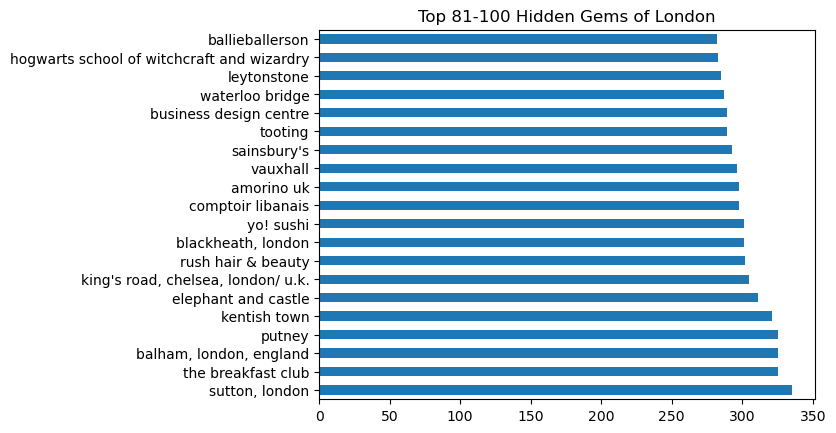

In [363]:
# Plot to show updated top 81-100 hidden gems
df_concat['name'].value_counts(ascending=0)[80:100].plot(kind='barh', title='Top 81-100 Hidden Gems of London');

In [364]:
# Check if the string contains a substring from the list
str136 = "london marathon"
res136 = [string for string in list(df_concat['name'].unique()) if str136 in string]

print(res136)

['london marathon community track', 'virgin london marathon', 'virgin money london marathon', 'virgin money london marathon - green start', 'the london marathon mile 21', 'london marathon 2019 live', 'london marathon 2019', 'virgin money london marathon start line', 'london marathon 2019 online', 'london marathon', 'the london marathon finishing line', 'london marathon 2018', 'london marathon finnish line']


In [365]:
# Remove specific locations
remove_list = res136
df_concat = df_concat[~df_concat['name'].isin(remove_list)]

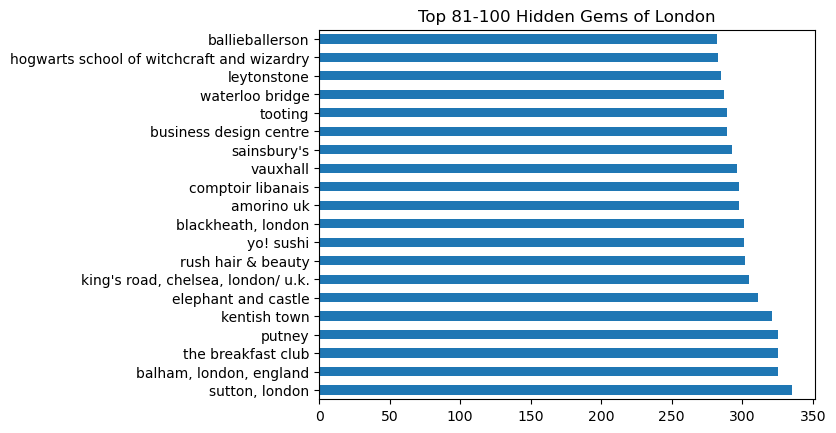

In [366]:
# Plot to show updated top 81-100 hidden gems
df_concat['name'].value_counts(ascending=0)[80:100].plot(kind='barh', title='Top 81-100 Hidden Gems of London');

In [367]:
# Check if the string contains a substring from the list
str137 = "starbucks"
res137 = [string for string in list(df_concat['name'].unique()) if str137 in string]

print(res137)

['starbucks london', 'starbucks - london knigtbridge', 'starbucks, golders green', 'starbucks', 'starbucks, kings cross', 'angel islington starbucks upper street', 'starbucks, chancery lane', 'starbucks towerbridge', 'starbucks @ westfields', 'starbucks ealing broadway', 'starbucks head office', 'starbucks clapham junction', 'starbucks - baker street', 'starbucks - highbury corner', 'starbucks princes street', 'starbucks sun street']


In [368]:
# Remove specific locations
remove_list = res137
df_concat = df_concat[~df_concat['name'].isin(remove_list)]

In [369]:
# Check if the string contains a substring from the list
str138 = "costa"
res138 = [string for string in list(df_concat['name'].unique()) if str138 in string]

print(res138)

['costa', 'macellaio roberto costa']


In [370]:
# Remove specific locations
remove_list = res138
df_concat = df_concat[~df_concat['name'].isin(remove_list)]

In [371]:
# Check if the string contains a substring from the list
str139 = "macd"
res139 = [string for string in list(df_concat['name'].unique()) if str139 in string]

print(res139)

['macdonalds']


In [372]:
# Remove specific locations
remove_list = res139
df_concat = df_concat[~df_concat['name'].isin(remove_list)]

In [373]:
# Check if the string contains a substring from the list
str140 = "kfc"
res140 = [string for string in list(df_concat['name'].unique()) if str140 in string]

print(res140)

['kfc (kentucky fried chicken)', 'kfc']


In [374]:
# Remove specific locations
remove_list = res140
df_concat = df_concat[~df_concat['name'].isin(remove_list)]

In [375]:
# Check if the string contains a substring from the list
str141 = "kebab"
res141 = [string for string in list(df_concat['name'].unique()) if str141 in string]

print(res141)

['kebab queen', 'the best kebab & fish bar', "fanny's kebabs", 'lahore kebab house', 'bapitta - pocket kebab', 'kebab 49']


In [376]:
# Remove specific locations
remove_list = res141
df_concat = df_concat[~df_concat['name'].isin(remove_list)]

In [377]:
# Check if the string contains a substring from the list
str142 = "the breakfast club"
res142 = [string for string in list(df_concat['name'].unique()) if str142 in string]

print(res142)

['the breakfast club', 'the breakfast club, spitalfields']


In [378]:
# Remove specific locations
remove_list = res142
df_concat = df_concat[~df_concat['name'].isin(remove_list)]

In [379]:
# Check if the string contains a substring from the list
str143 = "sushi"
res143 = [string for string in list(df_concat['name'].unique()) if str143 in string]

print(res143)

['sushi samba, floor 39 heron tower', 'yo! sushi', 'oki oki sushi\u3000沖壽司', 'sakana sushi', 'michiko sushino', 'sushi cafe', 'hana sushi seven sisters', 'sushi tetsu', 'sushi waka 寿司若', 'wasabi sushi & bento', "sticks'n'sushi", 'sushi dog', 'sushi hiroba', 'ichi-riki sushi house', 'feng sushi', 'yashin sushi&bar', 'sushi show 翔', 'wasabi sushi and bento', 'sushi samba', 'sushiheads', 'sushi bento', 'genji sushi london (kensington)', 'sushi salsa', 'kampai japanese sushi  bar', 'taro sushi noodle bar - brewer street', "sticks'n'sushi chelsea", 'sushinoen', 'sushi bar atariya', 'sushi show', 'sambasushi', 'sasa sushi', 'sushi masa', 'yaya sushi', 'sushi daily to go', 'sake sushi']


In [380]:
# Remove specific locations
remove_list = res143
df_concat = df_concat[~df_concat['name'].isin(remove_list)]

In [381]:
# Check if the string contains a substring from the list
str144 = "amorino"
res144 = [string for string in list(df_concat['name'].unique()) if str144 in string]

print(res144)

['amorino uk', 'amorino', 'amorino uk - ealing broadway']


In [382]:
# Remove specific locations
remove_list = res144
df_concat = df_concat[~df_concat['name'].isin(remove_list)]

In [383]:
# Check if the string contains a substring from the list
str145 = "comptoir libanais"
res145 = [string for string in list(df_concat['name'].unique()) if str145 in string]

print(res145)

['comptoir libanais', 'comptoir libanais at wigmore street w1', 'comptoir libanais at south kensington (sw7)']


In [384]:
# Remove specific locations
remove_list = res145
df_concat = df_concat[~df_concat['name'].isin(remove_list)]

In [385]:
# Check if the string contains a substring from the list
str146 = "sainsbury"
res146 = [string for string in list(df_concat['name'].unique()) if str146 in string]

print(res146)

["sainsbury's", "sainsbury's digital lab", "sainsbury's head office. holborn circus.", 'sainsburys corporate director limited']


In [386]:
# Remove specific locations
remove_list = res146
df_concat = df_concat[~df_concat['name'].isin(remove_list)]

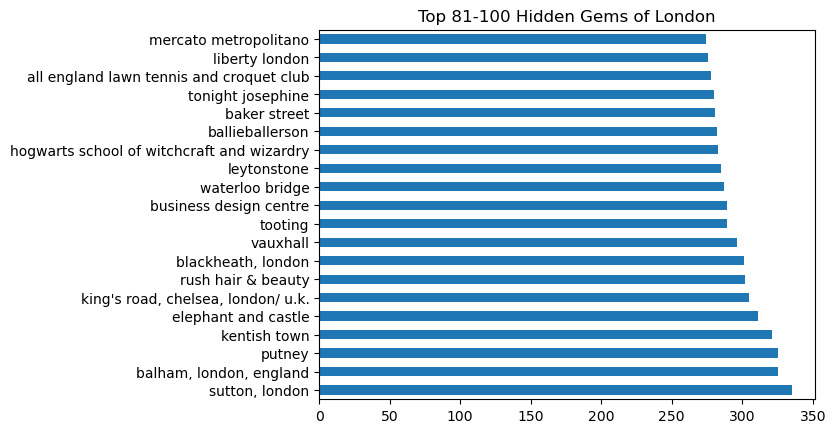

In [387]:
# Plot to show updated top 81-100 hidden gems
df_concat['name'].value_counts(ascending=0)[80:100].plot(kind='barh', title='Top 81-100 Hidden Gems of London');

The following locations have been removed:
- 'peggy porschen cakes'
- 'la salle resturant and bar. terminal 2 heathrow airport', 'singapore airlines silverkris lounge, london heathrow airport', 'london heathrow airport (lhr)', 'hyatt place london heathrow airport', 'concorde lounge and spa at heathrow airport', 'terminal 3 london heathrow airport (lhr)', 'doubletree by hilton london heathrow airport', 'heathrow airport', 'premier inn heathrow airport bath road', 'ibis london heathrow airport', 'caviar house heathrow airport', 'huxleys heathrow airport', "huxley's bar and kitchen heathrow airport", 'hitrow airport', 'heatrow airport london', 'london city airport', 'hithrow airport', 'nnamdi azikiwe international airport', 'stansted airport', 'london gatwick airport south terminal', 'holiday inn express london - luton airport', 'london city airport jet centre', 'stansed airport', 'london heartrow airport', 'gatwick airport north terminal', 'ldn city airport'
- 'central saint martins'
- 'the ritz london'
- 'searcys st pancras', 'st pancras, london', 'pullman london st pancras', 'st pancras square', "regent's canal towpath (st pancras)", 'st pancras international', 'st pancras and islington cemetery', 'st pancras brasserie champagne bar'
- 'bills angel', 'bills at hoxton square', "bill's", "nanny bill's", "bill's cafe", "bill's, islington", "bill's, baker street"
- 'fortnum & mason bar', 'fortnum & mason', 'diamond jubilee tea salon at fortnum & mason', 'fortnum & mason terminal 5'
- 'wondertree terminal 2', 'heathrow terminal 5', 'eurostar, st. pancras international terminal', 'heathrow terminal 3', 'heathrow terminal 2', 'cafe nero terminal 3 heathro', 'emirates air line royal docks terminal', 'london heathrow-terminal 4 arrivals', 'heathrow terminal 4', 'etihad airways terminal 4', 'club aspire lounge, heathrow terminal 3', 'london heathrow terminal 5 - british airways club lounge', 'terminal 5', 'heathrow terminal 3 the three bells pub & kitchen'
- 'duck & waffle', 'duck & waffle local'
- 'zizzi', 'zizzi restarant greenwich'
- "joe's brasserie", 'joe public sw4', "texas joe's", 'joe & the juice', "joe's cafe - sloane street", 'joe public', 'joe macari performance cars', "joe's kitchen", 'joe and co', 'joe lounge london', "l'atelier de joel robuchon london", 'joel and son fabrics', "joe's bar", "joe's chicken", 'paul & joe', 'joelson'
- 'the ivy club', "the ivy st john's wood", 'the ivy chelsea garden', 'the ivy city garden', 'the ivy kensington brasserie', 'the ivy cafe marylebone', 'the ivy house', 'the ivy cafe blackheath', 'the ivy market grill', 'the ivy, west street', 'the club, at the ivy'
- 'central london', 'central london civil justice centre county court', 'south central london'
- 'sushisamba'
- élan cafe
- london
- 'mem and laz brasserie', 'brasserie max', 'côte brasserie', 'brasserie blanc charlotte street london', '84 west brasserie & grill', 'brasserie zédel', 'granary square brasserie', 'chelsea riverside brasserie', 'brasserie blanc southbank', 'high road brasserie', "langan's brasserie", 'brasserie of light', 'maya italian brasserie', 'oxo tower brasserie', 'oriel grande brasserie', 'bombay brasserie', 'boulevard brasserie', 'palm court brasserie', 'brasserie blanc chancery lane', 'london street brasserie', 'acoustic brasserie', 'brasserie vacherin', 'bugis street brasserie @ millennium', 'mont martre brasserie', 'la brasserie', 'darwin brasserie', 'the brasserie @ the tower', 'mala indian brasserie'
- 'workshop coffee co. (marylebone)', 'caffè vergnano coffee shop 1882 london "charing cross".', 'illy coffee', 'notes coffee, food & wine', 'artisan coffee', 'crosstown - doughnuts & coffee', 'the coffee traveller', 'but first, coffee', '11 coffee & co ealing', 'claud w. dennis coffee', 'bloomsbury coffee house', 'prufrock coffee', 'alchemy coffee, london', 'arro coffee - the temple of coffee', 'caravan coffee roasters', 'costa coffee', 'swallow coffee shop', 'trade coffee', "ralph's coffee & bar at polo ralph lauren", 'federation coffee', 'association coffee', 'monmouth coffee the borough - london', 'dark arts coffee', 'press coffee & co.', 'the black cab coffee co', 'd1 coffee', 'kiss the hippo coffee', 'starfish loves coffee', 'brickwood coffee & bread', 'algerian coffee stores ltd.', 'ozone coffee roasters london', 'rosslyn coffee', 'the london coffee festival', 'chairs and coffee', 'st david coffee house', 'origin coffee roasters - euston road', 'black sheep coffee', 'the coffee works project', "chi chi's coffee & waffle house", 'origin coffee roasters - the aircraft factory', 'tap coffee', 'carter lane coffee house', 'coffee zee', 'starbucks coffee', 'di stefano coffee', 'flying horse coffee', 'goswell street coffee', 'h r higgins (coffee-man) ltd', 'pamban chai & coffee house', 'three wheels coffee', 'mughead coffee', 'workshop coffee', 'v69 coffee', 'fragola genuine italian gelato and coffee', 'caffè vergnano coffee shop 1882 london "staple inn".', 'the black lab coffee house', 'paws for coffee', 'cinnamon coffee shop', 'back on track coffee', 'wild & wood coffee', 'the ground coffee society', 'origin coffee roasters', 'department of coffee and social affairs', 'good boy coffee', 'story coffee', 'coffeeology london', 'curators coffee', 'dropshot coffee', 'notes coffee roaster & wine bar', '39 steps coffee', 'beany green coffee', 'amoret specality coffee', 'aldgate coffee house', 'coffee island uk', 'hej coffee house', 'artisan coffee east sheen', 'coffee at 412', 'wood street coffee', 'somers town coffee house', 'second shot coffee', 'the wren coffee', 'alex coffee', 'coffee island', 'lumberjack coffee', 'exmouth coffee company', 'zealand road coffee shop', 'manoj coffee and cuts', 'curators coffee studio', 'abuelo coffee house & kitchen', 'giddy up coffee', 'coleman coffee roasters', 'tempesta coffee', 'the coffee house', 'arabica coffee house', 'grind coffee bar', 'lomond coffee', 'canary coffee', 'glasshouse coffee', 'husk coffee & creative space', 'craving coffee', 'lion coffee + records', 'sala coffee london', 'ground coffee shop', 'brooklyn coffee', 'estate office coffee', 'ko coffee', 'coffee geek and friends', 'quaker street coffee & bubble tea', 'one shot coffee', 'peponita shoes & coffee', 'charlie’s coffee', 'coffeeafrique', 'coffee is my cup of tea', 'millfields coffee', 'scarlett coffee roastery', 'fcb coffee', 'coffee & crayons café', 'coffee at 27', 'tintocoffee', 'sydney rocks artisan coffee', 'urban social coffee', 'coffee republic'
- 'le pain quotidien uk', 'le pain quotidien, kensington'
- virgin money london marathon', 'london marathon 2019', 'london marathon 2019 live', 'virgin money london marathon start line', 'london marathon', 'london marathon 2018', 'virgin london marathon', 'the london marathon finishing line', 'london marathon finnish line', 'the london marathon mile 21', 'london marathon 2019 online', 'london marathon community track', 'virgin money london marathon - green start'
- Starbucks
- 'macellaio roberto costa', 'costa'
- 'macdonalds'
- 'kfc', 'kfc (kentucky fried chicken)'
- 'kebab queen', 'lahore kebab house', 'bapitta - pocket kebab', "fanny's kebabs", 'kebab 49'
- 'the breakfast club', 'the breakfast club, spitalfields'
- 'sushi samba, floor 39 heron tower', 'yo! sushi', 'oki oki sushi\u3000沖壽司', 'sakana sushi', 'michiko sushino', 'sushi cafe', 'hana sushi seven sisters', 'sushi tetsu', 'sushi waka 寿司若', 'wasabi sushi & bento', "sticks'n'sushi", 'sushi dog', 'sushi hiroba', 'ichi-riki sushi house', 'feng sushi', 'yashin sushi&bar', 'sushi show 翔', 'wasabi sushi and bento', 'sushi samba', 'sushiheads', 'sushi bento', 'genji sushi london (kensington)', 'sushi salsa', 'kampai japanese sushi  bar', 'taro sushi noodle bar - brewer street', "sticks'n'sushi chelsea", 'sushinoen', 'sushi bar atariya', 'sushi show', 'sambasushi', 'sasa sushi', 'sushi masa', 'yaya sushi', 'sushi daily to go', 'sake sushi'
- 'amorino uk', 'amorino', 'amorino uk - ealing broadway'
- 'comptoir libanais', 'comptoir libanais at wigmore street w1', 'comptoir libanais at south kensington (sw7)'
- "sainsbury's", "sainsbury's digital lab", "sainsbury's head office. holborn circus.", 'sainsburys corporate director limited'
- 

#### Final dataset

In [388]:
#Check number of unique location names
df_concat['name'].nunique()

14797

In [389]:
print(df_concat.shape)
df_concat.head()

(630751, 6)


,name,city,cd,profile_id,location_id,cts
0,la famiglia,"London, United Kingdom",GB,4.519805e+06,1178180.0,2016-06-09 22:13:32.000
1,la famiglia,"London, United Kingdom",GB,2.594847e+08,1178180.0,2019-05-30 23:17:22.000
2,la famiglia,"London, United Kingdom",GB,6.364797e+09,1178180.0,2019-05-26 15:27:27.000
8,green park,"London, United Kingdom",GB,2.213894e+08,857670431.0,2019-05-30 21:41:15.000
9,green park,"London, United Kingdom",GB,6.243066e+08,857670431.0,2019-05-30 07:56:50.000


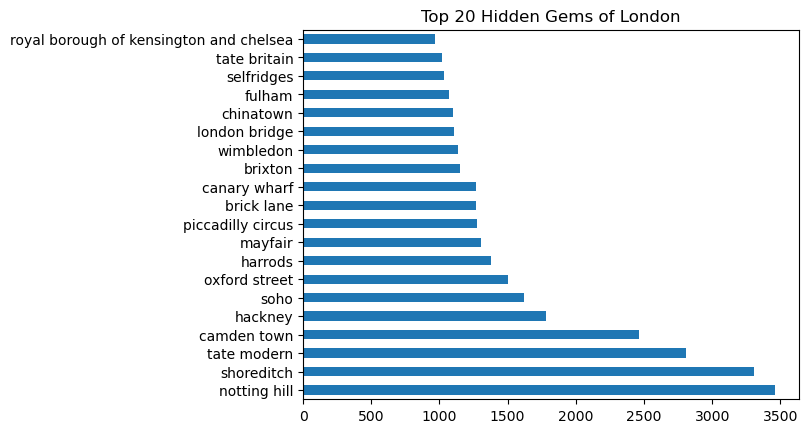

In [390]:
# Plot to show updated top 20 hidden gems
df_concat['name'].value_counts(ascending=0)[:20].plot(kind='barh', title='Top 20 Hidden Gems of London');

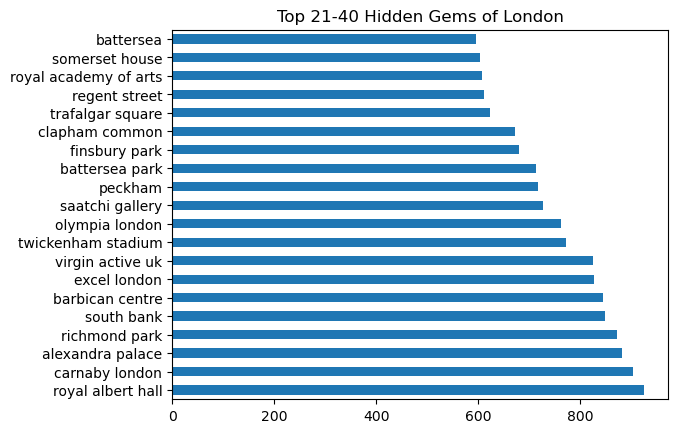

In [391]:
# Plot to show updated top 21-40 hidden gems
df_concat['name'].value_counts(ascending=0)[20:40].plot(kind='barh', title='Top 21-40 Hidden Gems of London');

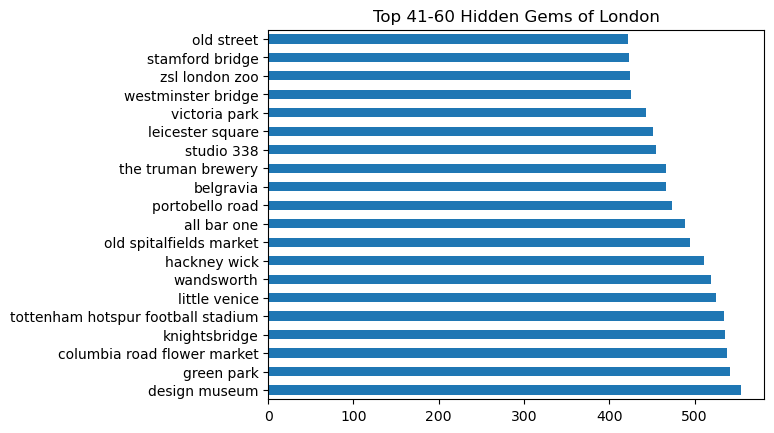

In [392]:
# Plot to show updated top 41-60 hidden gems
df_concat['name'].value_counts(ascending=0)[40:60].plot(kind='barh', title='Top 41-60 Hidden Gems of London');

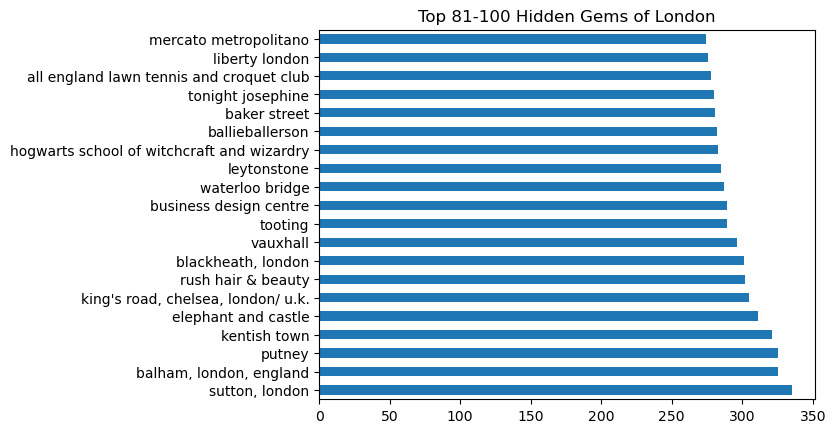

In [393]:
# Plot to show updated top 61-80 hidden gems
df_concat['name'].value_counts(ascending=0)[80:100].plot(kind='barh', title='Top 81-100 Hidden Gems of London');

In [394]:
# Save and export
df_concat.to_csv('./output/london_profile_updated.csv', index=False)

In [395]:
# Find number of rows removed
812126 - 630751

181375

- 181375 rows have been removed due to removal of locations non-related to our project and standardisation of location names.
- We will now move on to preprocess the captions of the posts to feature engineer the ratings column.